In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# คลิป 50 การใช้ query ในการกรองข้อมูลใน pandas DataFrame ************************************************************
* ห้ามมีช่องว่า ห้ามมีตัวอักษรพิเศษษ  
* query data ใน df

In [2]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/mpg30.csv'
df=pd.read_csv(url)
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [3]:
df[df.manufacturer == 'audi']

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


In [4]:
df.query('manufacturer == "audi"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


In [5]:
df[df.manufacturer != 'audi'].head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize


In [6]:
df.query('manufacturer != "audi"').head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize


In [7]:
df[df.cty > 25]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


In [8]:
df.query('cty > 25')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


In [9]:
df[(df.cty > 20) & (df.cty < 25)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
24,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact


In [10]:
df.query('20<cty<25')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
24,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact


In [11]:
df[(df.manufacturer == 'toyota') & (df.cty>10)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [12]:
df.query('manufacturer == "toyota" and cty>10')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [13]:
df[df.manufacturer.isin(['toyota', 'nissan'])]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
21,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [14]:
df.query('manufacturer in ["toyota", "nissan"]') # ***********************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
21,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [15]:
df[~df.manufacturer.isin(['toyota', 'nissan'])].sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
10,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan


In [16]:
df.query('manufacturer not in ["toyota", "nissan"]').sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
12,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
8,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
18,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact


In [17]:
df[(df.cty > 20) & (df.cty < 30) & (df.drv.isin(['f', '4']))]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
24,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact


In [18]:
df.query('20<cty<30 and drv in ["f", "4"]') # ********************************************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
24,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact


In [19]:
df.drv.unique()

array(['4', 'f', 'r'], dtype=object)

In [20]:
df[df.drv.str.contains('4')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
5,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
6,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
12,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
14,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
19,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv
20,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
21,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv


In [21]:
df.query('drv.str.contains("4")')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
5,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
6,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
12,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
14,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
19,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv
20,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
21,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv


In [22]:
df[df.manufacturer.str.match('[af]')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
12,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
13,ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact
14,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
15,ford,mustang,4.6,2008,8,manual(m5),r,15,23,r,subcompact


In [23]:
df.query("manufacturer.str.match('[af]')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv
12,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
13,ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact
14,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
15,ford,mustang,4.6,2008,8,manual(m5),r,15,23,r,subcompact


In [24]:
df[['drv']].head(1) # ถ้ามันรู้ว่าเป็น str มันจะเป็น columns ให้เลย

,drv
0,4


In [25]:
df[df.manufacturer.str.match('[ad]')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
5,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
6,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
7,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
8,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
9,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv
10,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan


In [26]:
df.query("manufacturer.str.match('[ad]')") # ขึ้นต้นด้วย a, b **********************************************************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
5,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
6,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
7,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
8,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
9,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv
10,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan


In [27]:
df[df.manufacturer.str.match('[^ad]')].head(4) # ไม่ได้ขึ้นต้นด้วย a,d

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
4,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv


In [28]:
df.query("manufacturer.str.match('[^ad]')").head(4) # ไม่ได้ขึ้นต้นด้วย a,d *************************************************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
4,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
11,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv


In [29]:
df[df.manufacturer.str.match('[a-f]')].head(4) # ขั้นต้นด้วย a, b, c, d, e, f

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize


In [30]:
df.query("manufacturer.str.match('[a-f]')").head(4) # ขั้นต้นด้วย a, b, c, d, e, f **************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize


In [31]:
df[df.model.str.match('a\d')] # ขึ้นต้นด้วย a ตามด้วย ตัวเลข ****************************************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


In [32]:
df.query("model.str.match('a\d')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


In [33]:
df[df.manufacturer.str.contains('audi|honda')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


In [34]:
df.query("manufacturer.str.contains('audi|honda')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


In [35]:
df[df.model.str.match('\d')] # ขึ้นต้นด้วย ตัวลข
# df[df.model.str.match('[0-9]')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [36]:
df.query("model.str.match('\d')") # ขึ้นต้นด้วย ตัวลข

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [37]:
df[df.manufacturer.str.match('..y')] # 2ตัวเเรกเป็นอะไรก็ได้ ตัวที่3เป็น y *************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [38]:
df.query("manufacturer.str.match('..y')") # 2ตัวเเรกเป็นอะไรก็ได้ ตัวที่3เป็น y

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


# คลิป 51 การใช้ any() และ all() ในการตรวจสอบ True/False

In [39]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df.head(2)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.00
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.48


In [40]:
df.sleep_total > 10

0     True
1     True
2     True
3     True
4    False
5     True
6    False
7    False
8     True
9    False
Name: sleep_total, dtype: bool

In [41]:
df[df.sleep_total > 10]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000


In [42]:
(df.sleep_total > 10).any()

True

In [43]:
(df.sleep_total > 10).all()

False

In [44]:
(df.sleep_total > 10).sum()

6

In [45]:
df.sleep_total.value_counts()

14.4    2
12.1    1
17.0    1
14.9    1
4.0     1
8.7     1
7.0     1
10.1    1
3.0     1
Name: sleep_total, dtype: int64

In [46]:
(df.sleep_total>df.awake)

0     True
1     True
2     True
3     True
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [47]:
(df.sleep_total>df.awake).any()

True

In [48]:
(df.sleep_total>df.awake).all()

False

In [49]:
(df.sleep_total>df.awake).sum()

5

## notna
- notna  ตรงข้ามกับ  isnull

In [50]:
df

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


In [51]:
df.notna() # ตรงข้ามกับ isnull ***********************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,True,True,True,True,True,True,False,False,True,False,True
1,True,True,True,True,False,True,True,False,True,True,True
2,True,True,True,True,True,True,True,False,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,False,True,True,True,True,False,True
6,True,True,True,True,True,True,True,True,True,False,True
7,True,True,False,True,False,True,False,False,True,False,True
8,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,False,False,True,True,True


In [52]:
df.isnull() # ***********************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,True,False,True,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,False,False,False


In [53]:
df.isna()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,True,False,True,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,False,False,False


In [54]:
df.isnull().any() # เเต่ละ columns มีค่าว่างไหม ***********************************************************************************

name            False
genus           False
vore             True
order           False
conservation     True
sleep_total     False
sleep_rem        True
sleep_cycle      True
awake           False
brainwt          True
bodywt          False
dtype: bool

In [55]:
df.isnull().sum() # เเต่ละ columns มีค่าว่าว่างทั้งหมดเท่าไร *********************************************************************************

name            0
genus           0
vore            1
order           0
conservation    3
sleep_total     0
sleep_rem       3
sleep_cycle     5
awake           0
brainwt         5
bodywt          0
dtype: int64

In [56]:
df.isnull().sum().sum()

17

In [57]:
df[['name', 'genus']].notna().sum()

name     10
genus    10
dtype: int64

In [58]:
df[['name', 'genus']].isnull().sum()

name     0
genus    0
dtype: int64

In [59]:
df.isnull()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,True,False,True,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,False,False,False


In [60]:
df.isnull().any(axis='columns') # เช็คทีละ index ว่า index ไหนว่างบ้าง *********************************************************************************

0     True
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
dtype: bool

In [61]:
df[df.isnull().any(axis='columns')]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.0982,14.800


In [62]:
df.notna().all()

name             True
genus            True
vore            False
order            True
conservation    False
sleep_total      True
sleep_rem       False
sleep_cycle     False
awake            True
brainwt         False
bodywt           True
dtype: bool

In [63]:
df.columns[df.notna().all()]

Index(['name', 'genus', 'order', 'sleep_total', 'awake', 'bodywt'], dtype='object')

# คลิป 52 pandas IndexSlice เพื่อดึงข้อมูล multi-level index ตอนที่ 1

In [64]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/gapminder.csv'
df = pd.read_csv(url, index_col=['country', 'year'])
df.head()

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106

In [65]:
df.loc['Thailand']

,continent,lifeExp,pop,gdpPercap
year,,,,
1952,Asia,50.848,21289402,757.797418
1957,Asia,53.630,25041917,793.577415
1962,Asia,56.061,29263397,1002.199172
1967,Asia,58.285,34024249,1295.460660
1972,Asia,60.405,39276153,1524.358936
1977,Asia,62.494,44148285,1961.224635
1982,Asia,64.597,48827160,2393.219781
1987,Asia,66.084,52910342,2982.653773
1992,Asia,67.298,56667095,4616.896545


In [66]:
df.loc[[('Thailand', 1977)]]

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Thailand,1977,Asia,62.494,44148285,1961.224635


In [67]:
pd.IndexSlice[:,1977]

(slice(None, None, None), 1977)

In [68]:
df.loc[pd.IndexSlice[:,1977], :].head(3) # :,1977 => index0 เอาหมดเลย  index1 เอา 1977    เเต่ว่าต้องเลือก columns ทั้งหมดด้วย ******************************************************************************************************************

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Afghanistan,1977,Asia,38.438,14880372,786.113360
Albania,1977,Europe,68.930,2509048,3533.003910
Algeria,1977,Africa,58.014,17152804,4910.416756


In [69]:
idx = pd.IndexSlice
df.loc[idx[:,1977],:].head(3)

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Afghanistan,1977,Asia,38.438,14880372,786.113360
Albania,1977,Europe,68.930,2509048,3533.003910
Algeria,1977,Africa,58.014,17152804,4910.416756


In [70]:
df.loc[pd.IndexSlice['Thailand'],:].head(3)

,continent,lifeExp,pop,gdpPercap
year,,,,
1952,Asia,50.848,21289402,757.797418
1957,Asia,53.630,25041917,793.577415
1962,Asia,56.061,29263397,1002.199172


In [71]:
df.loc[pd.IndexSlice['Thailand', 1977:],:]

continent  lifeExp       pop    gdpPercap
country  year                                          
Thailand 1977      Asia   62.494  44148285  1961.224635
         1982      Asia   64.597  48827160  2393.219781
         1987      Asia   66.084  52910342  2982.653773
         1992      Asia   67.298  56667095  4616.896545
         1997      Asia   67.521  60216677  5852.625497
         2002      Asia   68.564  62806748  5913.187529
         2007      Asia   70.616  65068149  7458.396327

In [72]:
df.loc[pd.IndexSlice[['Thailand', 'Albania'], 1977::2],:] # จะเป็นเเบบ index0, index1 เเละก็ทำเหมือน list, slice ได้เลย    เเละต้องเลือก columns ทั้งหมดด้วย*************************************************************************************************

continent  lifeExp       pop    gdpPercap
country  year                                          
Thailand 1977      Asia   62.494  44148285  1961.224635
         1987      Asia   66.084  52910342  2982.653773
         1997      Asia   67.521  60216677  5852.625497
         2007      Asia   70.616  65068149  7458.396327
Albania  1977    Europe   68.930   2509048  3533.003910
         1987    Europe   72.000   3075321  3738.932735
         1997    Europe   72.950   3428038  3193.054604
         2007    Europe   76.423   3600523  5937.029526

In [73]:
df.loc[pd.IndexSlice['Taiwan':'Thailand', [1977, 2007]],:]

continent  lifeExp       pop     gdpPercap
country  year                                           
Taiwan   1977      Asia   70.590  16785196   5596.519826
         2007      Asia   78.400  23174294  28718.276840
Tanzania 1977    Africa   49.919  17129565    962.492293
         2007    Africa   52.517  38139640   1107.482182
Thailand 1977      Asia   62.494  44148285   1961.224635
         2007      Asia   70.616  65068149   7458.396327

In [74]:
df.loc[pd.IndexSlice['T':'U', 2007],['lifeExp', 'pop']] # index0 ขึ้นต้นด้วยตัว T เพราะเเบบ Exclusive***********************************************************************************

,,lifeExp,pop
country,year,,
Taiwan,2007,78.400,23174294
Tanzania,2007,52.517,38139640
Thailand,2007,70.616,65068149
Togo,2007,58.420,5701579
Trinidad and Tobago,2007,69.819,1056608
Tunisia,2007,73.923,10276158
Turkey,2007,71.777,71158647


# คลิป 53 การใช้ pandas IndexSlice เพื่อดึงข้อมูล multi-level index ตอนที่ 2 *****************************************************************************
* df.loc[pd.IndexSlice[index0, index1, index2], :]

In [75]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/gapminder.csv'
df = pd.read_csv(url, index_col=['continent', 'country', 'year'])
df.head(3)

lifeExp       pop   gdpPercap
continent country     year                               
Asia      Afghanistan 1952   28.801   8425333  779.445314
                      1957   30.332   9240934  820.853030
                      1962   31.997  10267083  853.100710

In [76]:
df.sort_index(inplace=True)

In [77]:
df.loc[pd.IndexSlice[:,:,1952], :]

lifeExp       pop     gdpPercap
continent country        year                                 
Africa    Algeria        1952   43.077   9279525   2449.008185
          Angola         1952   30.015   4232095   3520.610273
          Benin          1952   38.223   1738315   1062.752200
          Botswana       1952   47.622    442308    851.241141
          Burkina Faso   1952   31.975   4469979    543.255241
...                                ...       ...           ...
Europe    Switzerland    1952   69.620   4815000  14734.232750
          Turkey         1952   43.585  22235677   1969.100980
          United Kingdom 1952   69.180  50430000   9979.508487
Oceania   Australia      1952   69.120   8691212  10039.595640
          New Zealand    1952   69.390   1994794  10556.575660

[142 rows x 3 columns]

In [78]:
df.loc[pd.IndexSlice['Asia','Thailand',[1952]]]

,,,lifeExp,pop,gdpPercap
continent,country,year,,,
Asia,Thailand,1952,50.848,21289402,757.797418


In [79]:
df.loc[pd.IndexSlice['Asia':'Europe',:,2007]]

lifeExp         pop     gdpPercap
continent country        year                                   
Asia      Afghanistan    2007   43.828    31889923    974.580338
          Bahrain        2007   75.635      708573  29796.048340
          Bangladesh     2007   64.062   150448339   1391.253792
          Cambodia       2007   59.723    14131858   1713.778686
          China          2007   72.961  1318683096   4959.114854
...                                ...         ...           ...
Europe    Spain          2007   80.941    40448191  28821.063700
          Sweden         2007   80.884     9031088  33859.748350
          Switzerland    2007   81.701     7554661  37506.419070
          Turkey         2007   71.777    71158647   8458.276384
          United Kingdom 2007   79.425    60776238  33203.261280

[63 rows x 3 columns]

In [80]:
df.loc[pd.IndexSlice[:,'Thailand',:], :]

lifeExp       pop    gdpPercap
continent country  year                                
Asia      Thailand 1952   50.848  21289402   757.797418
                   1957   53.630  25041917   793.577415
                   1962   56.061  29263397  1002.199172
                   1967   58.285  34024249  1295.460660
                   1972   60.405  39276153  1524.358936
                   1977   62.494  44148285  1961.224635
                   1982   64.597  48827160  2393.219781
                   1987   66.084  52910342  2982.653773
                   1992   67.298  56667095  4616.896545
                   1997   67.521  60216677  5852.625497
                   2002   68.564  62806748  5913.187529
                   2007   70.616  65068149  7458.396327

In [81]:
df.loc[pd.IndexSlice[:, ['Thailand', 'Vietnam'],:],:]

lifeExp       pop    gdpPercap
continent country  year                                
Asia      Thailand 1952   50.848  21289402   757.797418
                   1957   53.630  25041917   793.577415
                   1962   56.061  29263397  1002.199172
                   1967   58.285  34024249  1295.460660
                   1972   60.405  39276153  1524.358936
                   1977   62.494  44148285  1961.224635
                   1982   64.597  48827160  2393.219781
                   1987   66.084  52910342  2982.653773
                   1992   67.298  56667095  4616.896545
                   1997   67.521  60216677  5852.625497
                   2002   68.564  62806748  5913.187529
                   2007   70.616  65068149  7458.396327
          Vietnam  1952   40.412  26246839   605.066492
                   1957   42.887  28998543   676.285448
                   1962   45.363  33796140   772.049160
                   1967   47.838  39463910   637.123289
                   1972   50.254  44655014   699.501644
                   1977   55.764  50533506   713.537120
                   1982   58.816  56142181   707.235786
                   1987   62.820  62826491   820.799445
                   1992   67.662  69940728   989.023149
                   1997   70.672  76048996  1385.896769
                   2002   73.017  80908147  1764.456677
                   2007   74.249  85262356  2441.576404

In [82]:
df.loc[pd.IndexSlice[:, 'A':'B', 2007], :] # จะได้เเค่ประเทศที่ขึ้นต้นด้วยตัว A เพราะเป็นเเบบ exclusive

lifeExp       pop     gdpPercap
continent country     year                                 
Africa    Algeria     2007   72.301  33333216   6223.367465
          Angola      2007   42.731  12420476   4797.231267
Americas  Argentina   2007   75.320  40301927  12779.379640
Asia      Afghanistan 2007   43.828  31889923    974.580338
Europe    Albania     2007   76.423   3600523   5937.029526
          Austria     2007   79.829   8199783  36126.492700
Oceania   Australia   2007   81.235  20434176  34435.367440

### ขึ้นอยู่กับว่ามีกี่ lavel

In [83]:
df.index.get_level_values(0) # index0 ********************************************************************************************************************************************

Index(['Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa',
       ...
       'Oceania', 'Oceania', 'Oceania', 'Oceania', 'Oceania', 'Oceania',
       'Oceania', 'Oceania', 'Oceania', 'Oceania'],
      dtype='object', name='continent', length=1704)

In [84]:
df.index.get_level_values(1) # index1

Index(['Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria',
       'Algeria', 'Algeria', 'Algeria', 'Algeria',
       ...
       'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand',
       'New Zealand', 'New Zealand', 'New Zealand', 'New Zealand',
       'New Zealand', 'New Zealand'],
      dtype='object', name='country', length=1704)

In [85]:
df.index.get_level_values(1).str.match('T') # ********************************************************************************

array([False, False, False, ..., False, False, False])

In [86]:
df.loc[pd.IndexSlice[:,df.index.get_level_values(1).str.match('T'), 2007],:] # **************************************************************************************

lifeExp       pop     gdpPercap
continent country             year                                 
Africa    Tanzania            2007   52.517  38139640   1107.482182
          Togo                2007   58.420   5701579    882.969944
          Tunisia             2007   73.923  10276158   7092.923025
Americas  Trinidad and Tobago 2007   69.819   1056608  18008.509240
Asia      Taiwan              2007   78.400  23174294  28718.276840
          Thailand            2007   70.616  65068149   7458.396327
Europe    Turkey              2007   71.777  71158647   8458.276384

# คลิป 54 การทำงานกับข้อมูลวันและเวลาใน pandas ********************************************************************************************************************

In [87]:
df = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv')
df.head(2)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,28/11/16,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,7/8/16,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [88]:
df.info() # เช็ค dtype ก่อน

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_stamp   10 non-null     object
 1   date_stamp2  10 non-null     object
 2   date_stamp3  10 non-null     object
 3   iso_date     10 non-null     object
 4   fmt1         10 non-null     object
 5   fmt2         10 non-null     object
 6   ym           10 non-null     object
 7   ymd          10 non-null     int64 
 8   ymdhm        10 non-null     int64 
 9   tm           10 non-null     object
 10  y            10 non-null     int64 
 11  m            10 non-null     int64 
 12  d            10 non-null     int64 
 13  gender       10 non-null     object
 14  menu         10 non-null     object
 15  price        10 non-null     int64 
 16  member       10 non-null     bool  
dtypes: bool(1), int64(6), object(10)
memory usage: 1.4+ KB


In [89]:
df.date_stamp = pd.to_datetime(df.date_stamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   10 non-null     datetime64[ns]
 1   date_stamp2  10 non-null     object        
 2   date_stamp3  10 non-null     object        
 3   iso_date     10 non-null     object        
 4   fmt1         10 non-null     object        
 5   fmt2         10 non-null     object        
 6   ym           10 non-null     object        
 7   ymd          10 non-null     int64         
 8   ymdhm        10 non-null     int64         
 9   tm           10 non-null     object        
 10  y            10 non-null     int64         
 11  m            10 non-null     int64         
 12  d            10 non-null     int64         
 13  gender       10 non-null     object        
 14  menu         10 non-null     object        
 15  price        10 non-null     int64         
 16  member     

In [90]:
df.head(1)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True


https://strftime.org/

In [91]:
df.date_stamp2 = pd.to_datetime(df.date_stamp2, format='%d-%m-%y')
df.head(2)                          # อันเเรกเป็นวันนะ อันที่2เดือนนะ อันที่3ปีนะ  date_stamp2 มันเป็น'-'เลยต้อง'-'ตาม    **************************************************************************************************************************
                                    # เเละต้องตัวเล็กตัวใหญ่ให้ถูกต้องด้วยนะ

                                    # ตรง format เราต้องเอามาตาม dataframe นะ ว่ามันจัดมาลักษณะเเบบไหน ตรงไหนเป็นอะไร เครื่องจะได้รู้ว่าตรงนี้เป็นวันนะ 4ตัว, 2ตัว  ตรงนี้เป็นเดือนนะ *************************************************************************

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,2016-11-28,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,2016-08-07,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [92]:
df.date_stamp3 = pd.to_datetime(df.date_stamp3, format='%m/%d/%y')
df.head(2)                             # อันเเรกเป็นเดือนนะ  อันที่2วันนะ  อันที่3ปีนะ  date_stamp3 มันเป็น'/'เลยต้อง'/'ตาม
                                       # เเละต้องตัวเล็กตัวใหญ่ให้ถูกต้องด้วยนะ

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,2016-11-28,2016-11-28,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,2016-08-07,2016-08-07,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [93]:
df.ymd = pd.to_datetime(df.ymd, format='%Y%m%d')
df.head(2)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,2016-11-28,2016-11-28,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,2016-11-28,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,2016-08-07,2016-08-07,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,2016-08-07,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_stamp   10 non-null     datetime64[ns]
 1   date_stamp2  10 non-null     datetime64[ns]
 2   date_stamp3  10 non-null     datetime64[ns]
 3   iso_date     10 non-null     object        
 4   fmt1         10 non-null     object        
 5   fmt2         10 non-null     object        
 6   ym           10 non-null     object        
 7   ymd          10 non-null     datetime64[ns]
 8   ymdhm        10 non-null     int64         
 9   tm           10 non-null     object        
 10  y            10 non-null     int64         
 11  m            10 non-null     int64         
 12  d            10 non-null     int64         
 13  gender       10 non-null     object        
 14  menu         10 non-null     object        
 15  price        10 non-null     int64         
 16  member     

In [ ]:
pd.to_datetime(df.fmt2, format='%b %d, %Y') # รอรันเฉยๆ

## parse_dates

In [95]:
df = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv',
                   index_col='date_stamp', parse_dates=True)
df.head(2)       # parse_dates=True จะทำให้ index เป็น datetime ************************************************************************************************************

,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
date_stamp,,,,,,,,,,,,,,,,
2016-11-28,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
2016-07-08,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [96]:
df = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv',
                   index_col='date_stamp', parse_dates=['date_stamp2', 'date_stamp3'])
df.head(2)        # parse_dates=['date_stamp2', 'date_stamp3']  ถ้าทำเเบบนี้ตั้งเเต่อ่านไฟล์มา มันจะเป็น data ใน columns ['date_stamp2', 'date_stamp3'] เป็น datetime ********************************************************************************************************

,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
date_stamp,,,,,,,,,,,,,,,,
28/11/16,2016-11-28,2016-11-28,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
7/8/16,2016-07-08,2016-08-07,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [97]:
df = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv',
                   index_col='date_stamp', parse_dates=[['y','m','d']])
df.head(2)                               # มันจะไปหยิบทีละ columns มาประกอบกันเป็น datetime parse_dates=[['y','m','d']]  ต้องเรียง ปี เดือน วัน ด้วยนะมันถึงจะเป็น datetime ให้ **********************************************************************************

,y_m_d,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,gender,menu,price,member
date_stamp,,,,,,,,,,,,,,
28/11/16,2016-11-28,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,F,water,38,True
7/8/16,2016-08-07,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,M,water,48,True


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 28/11/16 to 4/8/15
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   y_m_d        10 non-null     datetime64[ns]
 1   date_stamp2  10 non-null     object        
 2   date_stamp3  10 non-null     object        
 3   iso_date     10 non-null     object        
 4   fmt1         10 non-null     object        
 5   fmt2         10 non-null     object        
 6   ym           10 non-null     object        
 7   ymd          10 non-null     int64         
 8   ymdhm        10 non-null     int64         
 9   tm           10 non-null     object        
 10  gender       10 non-null     object        
 11  menu         10 non-null     object        
 12  price        10 non-null     int64         
 13  member       10 non-null     bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(9)
memory usage: 1.1+ KB


# คลิป 55 การจัดการข้อมูลแบบ TimeSeries (DatetimeIndex)

In [99]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/OPEC_daily_oilprice.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True)
df.head(2)

,OilPrice
Date,
2018-06-01,74.23
2018-05-31,75.17


In [100]:
pd.set_option('display.max_rows', 10)
df.sort_index(inplace=True)
df

,OilPrice
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86
...,...
2018-05-28,73.37
2018-05-29,72.91
2018-05-30,73.72


In [101]:
df['2017'] # เอาเฉพาะปี 2017

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\1821198451.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017'] # เอาเฉพาะปี 2017


,OilPrice
Date,
2017-01-03,53.13
2017-01-04,52.71
2017-01-05,53.02
2017-01-06,53.50
2017-01-09,52.85
...,...
2017-12-22,62.66
2017-12-26,63.07
2017-12-27,64.24


In [102]:
df['2015':'2017']

,OilPrice
Date,
2015-01-02,51.78
2015-01-05,48.87
2015-01-06,46.57
2015-01-07,44.79
2015-01-08,45.68
...,...
2017-12-22,62.66
2017-12-26,63.07
2017-12-27,64.24


In [103]:
df['2017-01':'2017-02']

,OilPrice
Date,
2017-01-03,53.13
2017-01-04,52.71
2017-01-05,53.02
2017-01-06,53.50
2017-01-09,52.85
...,...
2017-02-22,53.48
2017-02-23,53.95
2017-02-24,53.61


In [104]:
df['2017-01-01':'2017-02-01']

,OilPrice
Date,
2017-01-03,53.13
2017-01-04,52.71
2017-01-05,53.02
2017-01-06,53.50
2017-01-09,52.85
...,...
2017-01-26,52.91
2017-01-27,52.88
2017-01-30,52.78


In [105]:
df['2017-01-27':'2017-01-27']

,OilPrice
Date,
2017-01-27,52.88


In [106]:
df.resample('Y').mean() # จะได้ค่าเฉลี่ยของเเต่ละปีออกมา ******************************************************************************************

,OilPrice
Date,
2003-12-31,28.123735
2004-12-31,36.009115
2005-12-31,50.707248
2006-12-31,61.080584
2007-12-31,69.076705
...,...
2014-12-31,96.133062
2015-12-31,49.504903
2016-12-31,40.759035


In [107]:
df.resample('Q').mean() # เเยกตามไตรมาตร ***********************************************************************************

,OilPrice
Date,
2003-03-31,30.452540
2003-06-30,25.878438
2003-09-30,27.430758
2003-12-31,28.791250
2004-03-31,30.770937
...,...
2017-06-30,48.472969
2017-09-30,49.977846
2017-12-31,59.352187


In [108]:
df.resample('M').mean() # เเยกตามเดือน *************************************************************************************

,OilPrice
Date,
2003-01-31,30.336364
2003-02-28,31.643500
2003-03-31,29.440000
2003-04-30,25.239048
2003-05-31,25.629545
...,...
2018-02-28,63.477500
2018-03-31,63.757619
2018-04-30,68.425238


# คลิป 56 การใช้ groupby เพื่อจัดกลุ่มข้อมูลใน pandas DataFrame *********************************************************************************************************

In [109]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [110]:
df1=df.groupby('class') # ***********************************************************************************

In [111]:
df1.groups

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [112]:
df1.describe()

displ                                                 year  \
           count      mean       std  min  25%   50%   75%  max count   
class                                                                   
2seater      5.0  6.160000  0.531977  5.7  5.7  6.20  6.20  7.0   5.0   
compact     47.0  2.325532  0.452274  1.8  2.0  2.20  2.80  3.3  47.0   
midsize     41.0  2.921951  0.718510  1.8  2.4  2.80  3.50  5.3  41.0   
minivan     11.0  3.390909  0.452669  2.4  3.3  3.30  3.80  4.0  11.0   
pickup      33.0  4.418182  0.828574  2.7  3.9  4.70  4.70  5.9  33.0   
subcompact  35.0  2.660000  1.102457  1.6  1.9  2.20  3.25  5.4  35.0   
suv         62.0  4.456452  1.065805  2.5  4.0  4.65  5.30  6.5  62.0   

                         ...    cty         hwy                             \
                   mean  ...    75%   max count       mean       std   min   
class                    ...                                                 
2seater     2004.400000  ...  16.00  16.0   5.0  24.800000  1.303840  23.0   
compact     2003.212766  ...  21.00  33.0  47.0  28.297872  3.781620  23.0   
midsize     2003.609756  ...  21.00  23.0  41.0  27.292683  2.135930  23.0   
minivan     2003.090909  ...  17.00  18.0  11.0  22.363636  2.062655  17.0   
pickup      2003.636364  ...  14.00  17.0  33.0  16.878788  2.274280  12.0   
subcompact  2003.114286  ...  23.50  35.0  35.0  28.142857  5.375012  20.0   
suv         2003.790323  ...  14.75  20.0  62.0  18.129032  2.977973  12.0   

                                    
             25%   50%   75%   max  
class                               
2seater     24.0  25.0  26.0  26.0  
compact     26.0  27.0  29.0  44.0  
midsize     26.0  27.0  29.0  32.0  
minivan     22.0  23.0  24.0  24.0  
pickup      16.0  17.0  18.0  22.0  
subcompact  24.5  26.0  30.5  44.0  
suv         17.0  17.5  19.0  27.0  

[7 rows x 40 columns]

In [113]:
df1.describe().T

class          2seater    compact    midsize    minivan     pickup  \
displ count   5.000000  47.000000  41.000000  11.000000  33.000000   
      mean    6.160000   2.325532   2.921951   3.390909   4.418182   
      std     0.531977   0.452274   0.718510   0.452669   0.828574   
      min     5.700000   1.800000   1.800000   2.400000   2.700000   
      25%     5.700000   2.000000   2.400000   3.300000   3.900000   
...                ...        ...        ...        ...        ...   
hwy   min    23.000000  23.000000  23.000000  17.000000  12.000000   
      25%    24.000000  26.000000  26.000000  22.000000  16.000000   
      50%    25.000000  27.000000  27.000000  23.000000  17.000000   
      75%    26.000000  29.000000  29.000000  24.000000  18.000000   
      max    26.000000  44.000000  32.000000  24.000000  22.000000   

class        subcompact        suv  
displ count   35.000000  62.000000  
      mean     2.660000   4.456452  
      std      1.102457   1.065805  
      min      1.600000   2.500000  
      25%      1.900000   4.000000  
...                 ...        ...  
hwy   min     20.000000  12.000000  
      25%     24.500000  17.000000  
      50%     26.000000  17.500000  
      75%     30.500000  19.000000  
      max     44.000000  27.000000  

[40 rows x 7 columns]

In [114]:
df1.groups # เช็ค group ว่ามีอะไรบ้าง

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [115]:
df1.get_group('compact') # ตามชื่อนั่นเเหละ

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
216,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact


In [116]:
df1.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2053335143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.mean()


,displ,year,cyl,cty,hwy
class,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857
suv,4.456452,2003.790323,6.967742,13.500000,18.129032


In [117]:
df1.mean()[['cty', 'hwy']]

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3225698684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.mean()[['cty', 'hwy']]


,cty,hwy
class,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


In [118]:
df.sort_values(by=['class', 'hwy'], ascending=[True, False]) # ทวนเฉยๆ

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
...,...,...,...,...,...,...,...,...,...,...,...
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
129,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [119]:
df2 = df.groupby(['class', 'drv']) # **********************************************************************************

In [120]:
df2.groups

{('2seater', 'r'): [23, 24, 25, 26, 27], ('compact', '4'): [7, 8, 9, 10, 11, 12, 13, 14, 169, 170, 171, 172], ('compact', 'f'): [0, 1, 2, 3, 4, 5, 6, 141, 142, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], ('midsize', '4'): [15, 16, 17], ('midsize', 'f'): [32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], ('minivan', 'f'): [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], ('pickup', '4'): [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], ('subcompact', '4'): [165, 166, 167, 168], ('subcompact', 'f'): [99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 221, 222, 223, 224, 225, 226], ('subcompact', 'r'): [90, 91, 92, 93, 94, 95, 96, 97, 98], ('suv', '4'): [2

In [121]:
df2.mean() # ถ้าทำเเบบนี้ จะได้ออกมาเป็น df เเบบ groupby เป็น index

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3587575296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.mean()


displ         year       cyl        cty        hwy
class      drv                                                       
2seater    r    6.160000  2004.400000  8.000000  15.400000  24.800000
compact    4    2.450000  2005.000000  4.666667  18.000000  25.833333
           f    2.282857  2002.600000  4.571429  20.857143  29.142857
midsize    4    3.366667  2005.000000  6.666667  16.000000  24.000000
           f    2.886842  2003.500000  5.210526  18.973684  27.552632
...                  ...          ...       ...        ...        ...
subcompact 4    2.350000  1999.000000  4.000000  19.500000  26.000000
           f    2.013636  2003.500000  4.363636  22.363636  30.545455
           r    4.377778  2004.000000  7.111111  15.888889  23.222222
suv        4    4.256863  2003.764706  6.745098  13.823529  18.274510
           r    5.381818  2003.909091  8.000000  12.000000  17.454545

[12 rows x 5 columns]

In [122]:
df2.get_group(('compact', '4')) # เป็น tuple นะ ************************************************************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
169,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact


# คลิป 57 การปรับแต่งข้อมูลในคอลัมน์ เช่น ลบส่วนที่ไม่ใช่เลข 0-9 ออกจากข้อมูล **************************************************************************************

In [123]:
dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies',
                 match='Valuation', header=0)
len(dfs)

2

In [124]:
df = dfs[0]
df

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...
658,Voi,1+,April 2022[60],NaN,Sweden,NaN
659,Neo Financial,1,May 2022[572],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
660,Physics Wallah,1.1,June 2022[573],Educational technology,India,Alakh Pandey
661,OneCard,1.4+,July 2022[574],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


In [125]:
df[df['Valuation date'].str.contains('\[')] # เช็คว่ามี [] ไหม มันเป็นเครื่องหมายพิเศษเลยต้องมี \ ******************************************************************************************

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...
658,Voi,1+,April 2022[60],NaN,Sweden,NaN
659,Neo Financial,1,May 2022[572],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
660,Physics Wallah,1.1,June 2022[573],Educational technology,India,Alakh Pandey
661,OneCard,1.4+,July 2022[574],Financial technology,India,"Anurag Sinha, Rupesh Kumar, Vaibhav Hathi"


In [126]:
df['A'] = df['Valuation date'].str.replace('\[.*\]', '') # ****************************************************************************************************************
                                            # เปลี่ยน [] โอยมีอะไรก็ได้ที่อยู่ข้างในกี่ตัวก็ได้(.*)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2190066667.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['A'] = df['Valuation date'].str.replace('\[.*\]', '') # ****************************************************************************************************************


In [127]:
df.head(2)

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022


In [128]:
df['AA'] = df['A'].str.replace('[^\d]', '') # เปลี่ยนทุกอย่างยกเว้นตัวเลข [^\d] ****************************************************************************************
df.head(2)             # replace('[^\d\.\w]', '')   จะแปลว่าเปลี่ยนทุกอย่างยกเว้น ตัวเลข . เเละตัวอักษร

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\346208460.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['AA'] = df['A'].str.replace('[^\d]', '') # เปลี่ยนทุกอย่างยกเว้นตัวเลข [^\d] ****************************************************************************************


,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A,AA
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022,2022
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022,2022


In [129]:
df['AAA'] = df['Valuation date'].str.replace('[\d]', '') # เปลี่ยนทุกอย่างที่เป็นตัวเลข [\d] *************************************************************************************
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\67894854.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['AAA'] = df['Valuation date'].str.replace('[\d]', '') # เปลี่ยนทุกอย่างที่เป็นตัวเลข [\d] *************************************************************************************


,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A,AA,AAA
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022,2022,June []
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022,2022,June []


In [130]:
df['B'] = df['Valuation date'].str.replace('(\[.*\]|[^\d])', '') # เอามารวมกันก็ได้ เเต่ต้องมี '(|)' ด้วย ห้ามเว้นวรรค ******************************************************************************************************************************
df.head(2)                                # จะเป็นกลุ่มคำ อันเเรก  \[.*\] => ขึ้นต้นด้วย [ เเล้วมีอะไรก็ได้เท่าไรก็ได้ เเละลงท้ายด้วย ]
                                          # อันที่ 2   [^\d] => ทุกอย่างยกเว้น ตัวเลข

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3194090721.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['B'] = df['Valuation date'].str.replace('(\[.*\]|[^\d])', '') # เอามารวมกันก็ได้ เเต่ต้องมี '(|)' ด้วย ห้ามเว้นวรรค ******************************************************************************************************************************


,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A,AA,AAA,B
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022,2022,June [],2022
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022,2022,June [],2022


In [131]:
df['test'] = df['Valuation date'].str.replace('[^\d]','') # เปลี่ยนทุกอย่างยกเว้นตัวเลข *********************************************************************************************************
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2762003804.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['test'] = df['Valuation date'].str.replace('[^\d]','') # เปลี่ยนทุกอย่างยกเว้นตัวเลข *********************************************************************************************************


,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A,AA,AAA,B,test
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022,2022,June [],2022,202213
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022,2022,June [],2022,202213


In [132]:
df['test'] = df['test'].str.replace('..$','').astype('int') # เเล้วมาเปลี่ยน 2 ตัวสุดท้าย(..$)  เเละระบุเป็น int ด้วย *************************************************************************************
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3834446410.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['test'] = df['test'].str.replace('..$','').astype('int') # เเล้วมาเปลี่ยน 2 ตัวสุดท้าย(..$)  เเละระบุเป็น int ด้วย *************************************************************************************


,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s),A,AA,AAA,B,test
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo",June 2022,2022,June [],2022,2022
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk,June 2022,2022,June [],2022,2022


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   663 non-null    object
 1   Valuation (US$ billions)  663 non-null    object
 2   Valuation date            663 non-null    object
 3   Industry                  599 non-null    object
 4   Country/ countries        663 non-null    object
 5   Founder(s)                139 non-null    object
 6   A                         663 non-null    object
 7   AA                        663 non-null    object
 8   AAA                       663 non-null    object
 9   B                         663 non-null    object
 10  test                      663 non-null    int32 
dtypes: int32(1), object(10)
memory usage: 54.5+ KB


# คลิป 58 การใช้ Series.str.replace เพื่อ clean ข้อมูล

In [134]:
dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_tallest_buildings_by_height_to_roof', 
                 header=0)
len(dfs) # มันอาจจะมีหลสยตาราง เลยต้องมีเยอะหน่อย เเละให้ index เเรกเป็น columns (header=0)

7

In [135]:
dfs[2]

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built,Reference
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010,[2]
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015,[3]
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016,[4]
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012,[citation needed]
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016,[citation needed]
...,...,...,...,...,...,...,...,...,...
50,52,Baiyoke Tower II,Bangkok,Thailand,304.0 m,997 ft,85,1997,NaN
51,53,Wells Fargo Plaza,Houston,United States,302.4 m,992 ft,71,1983,NaN
52,54,Kingdom Centre,Riyadh,Saudi Arabia,302.0 m,991 ft,41,2002,NaN
53,55,Moscow Tower,Moscow,Russia,302.0 m,989 ft,76,2010,NaN


In [136]:
# dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_tallest_buildings_by_height_to_roof', 
#                  header=0, 
#                  match='Height \(m\)')
# len(dfs)

In [137]:
df = dfs[2].drop(columns='Reference')
df

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016
...,...,...,...,...,...,...,...,...
50,52,Baiyoke Tower II,Bangkok,Thailand,304.0 m,997 ft,85,1997
51,53,Wells Fargo Plaza,Houston,United States,302.4 m,992 ft,71,1983
52,54,Kingdom Centre,Riyadh,Saudi Arabia,302.0 m,991 ft,41,2002
53,55,Moscow Tower,Moscow,Russia,302.0 m,989 ft,76,2010


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         55 non-null     object
 1   Building     55 non-null     object
 2   City         55 non-null     object
 3   Country      55 non-null     object
 4   Height (m)   55 non-null     object
 5   Height (ft)  55 non-null     object
 6   Floors       55 non-null     int64 
 7   Built        55 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.6+ KB


In [139]:
df.Rank = df.Rank.str.replace('[^\d]', '').astype('int')
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2161932976.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Rank = df.Rank.str.replace('[^\d]', '').astype('int')


,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016
...,...,...,...,...,...,...,...,...
50,52,Baiyoke Tower II,Bangkok,Thailand,304.0 m,997 ft,85,1997
51,53,Wells Fargo Plaza,Houston,United States,302.4 m,992 ft,71,1983
52,54,Kingdom Centre,Riyadh,Saudi Arabia,302.0 m,991 ft,41,2002
53,55,Moscow Tower,Moscow,Russia,302.0 m,989 ft,76,2010


In [140]:
df['Height (m)'] = df['Height (m)'].str.replace('[^\d.]', '').astype('float')
# df['Height (ft)'] = df['Height (ft)'].str.replace('[^\d.]', '').astype('float')
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3910952246.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Height (m)'] = df['Height (m)'].str.replace('[^\d.]', '').astype('float')


,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4,"2,426 ft",163,2010
1,2,Shanghai Tower,Shanghai,China,587.4,"2,073 ft",127,2015


In [141]:
df['Height (ft)'] = df['Height (ft)'].str.replace('[^\d.]', '').astype('float')
df.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\186068051.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Height (ft)'] = df['Height (ft)'].str.replace('[^\d.]', '').astype('float')


,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4,2426.0,163,2010
1,2,Shanghai Tower,Shanghai,China,587.4,2073.0,127,2015


In [142]:
df['Rank1'] = df['Height (m)'].rank(ascending=False, method='min').astype('int') # ****************************************************************************************
df

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built,Rank1
0,1,Burj Khalifa,Dubai,UAE,739.4,2426.0,163,2010,1
1,2,Shanghai Tower,Shanghai,China,587.4,2073.0,127,2015,2
2,3,Ping An Finance Center,Shenzhen,China,562.0,1821.0,115,2016,3
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0,1740.0,120,2012,4
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530.0,1739.0,111,2016,4
...,...,...,...,...,...,...,...,...,...
50,52,Baiyoke Tower II,Bangkok,Thailand,304.0,997.0,85,1997,51
51,53,Wells Fargo Plaza,Houston,United States,302.4,992.0,71,1983,52
52,54,Kingdom Centre,Riyadh,Saudi Arabia,302.0,991.0,41,2002,53
53,55,Moscow Tower,Moscow,Russia,302.0,989.0,76,2010,53


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         55 non-null     int32  
 1   Building     55 non-null     object 
 2   City         55 non-null     object 
 3   Country      55 non-null     object 
 4   Height (m)   55 non-null     float64
 5   Height (ft)  55 non-null     float64
 6   Floors       55 non-null     int64  
 7   Built        55 non-null     object 
 8   Rank1        55 non-null     int32  
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 3.6+ KB


# คลิป 59 การแปลงตัวเลขที่มีสัญลักษณ์สกุลเงินและหน่วย (clean currency text) เช่น $70K เป็น 70000 *****************************************************************************************************

In [144]:
pd.set_option('display.max_rows', 6)

In [145]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv'
df = pd.read_csv(url).set_index('ID')
df.head()

,Unnamed: 0,Unnamed: 0.1,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
ID,,,,,,,,,,,,,,
20801,0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/players/10/16/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
158023,1,1,L. Messi,30,https://cdn.sofifa.org/players/10/16/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
190871,2,2,Neymar,25,https://cdn.sofifa.org/players/10/16/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
176580,3,3,L. Suárez,30,https://cdn.sofifa.org/players/10/16/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
167495,4,4,M. Neuer,31,https://cdn.sofifa.org/players/10/16/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [146]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Name', 'Age', 'Photo', 'Nationality',
       'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special'],
      dtype='object')

In [147]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Photo','Flag','Club Logo'], inplace=True)
df.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100


In [148]:
df.rename(columns={'Value':'Value_EUR', 'Wage':'Wage_EUR'}, inplace=True)
df.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100


In [149]:
df.Value_EUR.str[-1:] # เช็คตัวสุดท้ายก่อน *****************************************************************************************

ID
20801     M
158023    M
190871    M
         ..
231381    K
238813    K
238308    K
Name: Value_EUR, Length: 17981, dtype: object

In [150]:
df.Value_EUR.str[-1:].unique()

array(['M', '0', 'K'], dtype=object)

In [ ]:
df.Value_EUR.str[-1].value_counts()

In [151]:
def value_unit(s: str): # เอา s มา ที่เป็น str *****************************************************************************************************************
    s=s.strip().upper() # ลบช่องว่างออกข้างซ้ายเเละขวา  เเล้วทำให้เป็นตัวใหญ่
    if s[-1] == 'M':
        return 1e6 # 1000000
    elif s[-1] == 'K':
        return 1000
    else:
        return 1

In [152]:
# test
value_unit('566')

1

In [153]:
import re # ********************************************************************************************************************************************************
def str_value(s: str):
    mul = value_unit(s)
    return float(re.sub('[^0-9.]', '', s)) * mul
                # sub == replace
                # เปลี่ยนทุกอย่างยกเว้น 0-9 เเละ . ให้เป็น ''  โดยเอา s เข้าไปวิเคราะห์

In [154]:
# test
str_value('qewr56m')

56000000.0

In [155]:
df[['Value_EUR', 'Wage_EUR']]

,Value_EUR,Wage_EUR
ID,,
20801,€95.5M,€565K
158023,€105M,€565K
190871,€123M,€280K
...,...,...
231381,€60K,€1K
238813,€60K,€1K
238308,€50K,€1K


In [156]:
df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s)) # ***************************************************************************************************************
                            # มี 2 columns เลยต้อง applmap ************************************************************************************************************************

,Value_EUR,Wage_EUR
ID,,
20801,95500000.0,565000.0
158023,105000000.0,565000.0
190871,123000000.0,280000.0
...,...,...
231381,60000.0,1000.0
238813,60000.0,1000.0
238308,50000.0,1000.0


In [157]:
df[['Value_EUR', 'Wage_EUR']] = df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s)) # **************************************************************************
df

,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
...,...,...,...,...,...,...,...,...,...
231381,J. Young,17,Scotland,46,61,Swindon Town,60000.0,1000.0,1194
238813,J. Lundstram,18,England,46,64,Crewe Alexandra,60000.0,1000.0,1302
238308,L. Sackey,18,Ghana,46,64,Scunthorpe United,50000.0,1000.0,1031


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 20801 to 238308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         17981 non-null  object 
 1   Age          17981 non-null  int64  
 2   Nationality  17981 non-null  object 
 3   Overall      17981 non-null  int64  
 4   Potential    17981 non-null  int64  
 5   Club         17733 non-null  object 
 6   Value_EUR    17981 non-null  float64
 7   Wage_EUR     17981 non-null  float64
 8   Special      17981 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [159]:
df.nlargest(5, columns='Value_EUR')

,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
ID,,,,,,,,,
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143


In [160]:
df.groupby('Club').sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2625920605.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Club').sum()


,Age,Overall,Potential,Value_EUR,Wage_EUR,Special
Club,,,,,,
SSV Jahn Regensburg,688,1781,1924,15935000.0,116000.0,41916
1. FC Heidenheim,640,1730,1852,29660000.0,212000.0,40946
1. FC Kaiserslautern,656,1880,2100,35440000.0,182000.0,43687
...,...,...,...,...,...,...
Östersunds FK,609,1537,1630,17245000.0,48000.0,37408
İstanbul Başakşehir FK,758,1923,1996,94830000.0,511000.0,46375
Śląsk Wrocław,667,1579,1665,15725000.0,85000.0,38959


In [161]:
df.groupby('Club').sum().sort_values('Value_EUR', ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3652254909.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Club').sum().sort_values('Value_EUR', ascending=False)


,Age,Overall,Potential,Value_EUR,Wage_EUR,Special
Club,,,,,,
Real Madrid CF,639,2107,2235,826700000.0,4751000.0,49137
FC Bayern Munich,652,2065,2197,748825000.0,3273000.0,48297
FC Barcelona,663,2064,2139,744500000.0,4792000.0,49029
...,...,...,...,...,...,...
Drogheda United,582,1369,1551,2550000.0,25000.0,35257
Limerick FC,534,1224,1342,2460000.0,23000.0,30249
Bray Wanderers,551,1181,1250,2370000.0,21000.0,28880


# คลิป 60 การใช้ pandas drop_duplicates เพื่อลบแถวซ้ำ
* duplicates เช็คค่าซ้ำ
* drop_duplicates ลบค่าซ้ำ

In [162]:
pd.reset_option('display.max_rows')
url='https://github.com/prasertcbs/tutorial/raw/master/duplicates.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [163]:
df.duplicated()

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
dtype: bool

In [164]:
df[df.duplicated()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
10,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [165]:
df.drop_duplicates() # จะลบ index ที่ซ้ำกันออดไป

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [166]:
df.drop_duplicates(subset=['manufacturer','model']) # จะพิจารณาเเค่ 2 olumns นี้ ถ้าซ้ำกันทั้งคู่จะลบทิ้ง

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


# คลิป 61 การจัดการกับ missing values ตอนที่ 1  (dropna)

In [167]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv')
df

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [169]:
df.isnull().sum()

name             0
genus            0
vore             7
order            0
conservation    29
sleep_total      0
sleep_rem       22
sleep_cycle     51
awake            0
brainwt         27
bodywt           0
dtype: int64

In [170]:
df.notna().sum() # เเค่ทวนว่า isnull กับ notna มันตรงข้ามกัน

name            83
genus           83
vore            76
order           83
conservation    54
sleep_total     83
sleep_rem       61
sleep_cycle     32
awake           83
brainwt         56
bodywt          83
dtype: int64

In [171]:
df.dropna() # ถ้าพิมพ์เเค่นี้ มันจะลบทุก index ที่มีค่าว่าง

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005
17,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.383333,6.6,0.01080,3.500
19,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.333333,6.0,0.00630,1.700
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.3,0.00030,0.023
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.1,0.65500,521.000


In [172]:
df.dropna(subset=['vore']) # ถ้าใน columns vore มีค่าว่างที่ index ไหน จะลบ index นั้นออก

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [173]:
df.dropna(subset='sleep_cycle').shape # จะพิจารณา olumns sleep_cycle ถ้า index ไหนว่างจะลบ index นั้นทิ้ง

(32, 11)

In [174]:
df.dropna(axis='columns') # อันนี้จะกลายเป็น columns ไหนมีค่าว่างจะลบ columns นั้นทิ้ง ******************************************************************************************

,name,genus,order,sleep_total,awake,bodywt
0,Cheetah,Acinonyx,Carnivora,12.1,11.9,50.000
1,Owl monkey,Aotus,Primates,17.0,7.0,0.480
2,Mountain beaver,Aplodontia,Rodentia,14.4,9.6,1.350
3,Greater short-tailed shrew,Blarina,Soricomorpha,14.9,9.1,0.019
4,Cow,Bos,Artiodactyla,4.0,20.0,600.000
...,...,...,...,...,...,...
78,Tree shrew,Tupaia,Scandentia,8.9,15.1,0.104
79,Bottle-nosed dolphin,Tursiops,Cetacea,5.2,18.8,173.330
80,Genet,Genetta,Carnivora,6.3,17.7,2.000
81,Arctic fox,Vulpes,Carnivora,12.5,11.5,3.380


# คลิป 62 การจัดการกับ missing values ตอนที่ 2 (dropna)
* subset
* thresh

In [175]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/qnaire_missing_values.csv',
              index_col='obs')
df

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
6,NaN,26.0,4.0,5.0,NaN,2.0,4.0,2.0,NaN,NaN,NaN,3.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0


In [176]:
df.dropna()

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0


In [177]:
df.dropna(thresh=10) # ใน 12 olumns ต้องมีค่าอย่างน้อย 10 columns ถึงจะไม่โดนลบ ****************************************************************************************

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0


In [178]:
df.columns

Index(['gender', 'age', 'eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8',
       'eq9', 'eq10'],
      dtype='object')

In [179]:
df.dropna(subset=['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8',
       'eq9', 'eq10'], thresh=8) # พิจารณา 10 columns นี่ ต้องมีอย่าน้อง 8 ค่า ถึงจะไม่โดนลบ **************************************************************************************

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


In [180]:
df.columns.str.contains('eq')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [181]:
df.columns[df.columns.str.contains('eq')]

Index(['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10'], dtype='object')

In [182]:
df.dropna(subset=df.columns[df.columns.str.contains('eq')], thresh=8)

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


# คลิป 63 การแทนที่ missing values ตอนที่ 3 (fillna)

In [183]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/qnaire_fill_missing.tsv',
                index_col='obs', parse_dates=['dob'])
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [184]:
df.shape

(10, 12)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     8 non-null      float64       
 3   own_house  9 non-null      object        
 4   own_car    8 non-null      object        
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.0+ KB


In [186]:
df.isnull()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,False,False,False,False,False,True,True,True,False,False,False,False
2,True,False,False,False,True,False,True,False,True,False,False,False
3,False,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,True,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False
6,False,True,True,False,False,False,True,False,True,False,True,False
7,True,False,False,False,False,False,False,True,False,False,False,False
8,True,False,False,False,False,False,False,False,True,True,True,False
9,False,False,False,False,False,False,True,False,False,False,False,False


In [187]:
df.isnull().sum()

gender       3
dob          2
salary       2
own_house    1
own_car      2
csi1         2
csi2         4
csi3         4
csi4         3
q1           2
q2           2
q3           0
dtype: int64

In [188]:
df.salary.fillna(df.salary.median(), inplace=True) # ถ้าระบุ columns ไหน ก็เติมเเค่นั้น
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,100500.0,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [189]:
df.own_car.value_counts()

False    7
True     1
Name: own_car, dtype: int64

In [190]:
df.own_car.fillna(False, inplace=True)
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,100500.0,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     10 non-null     float64       
 3   own_house  9 non-null      object        
 4   own_car    10 non-null     bool          
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 970.0+ bytes


In [192]:
df.columns

Index(['gender', 'dob', 'salary', 'own_house', 'own_car', 'csi1', 'csi2',
       'csi3', 'csi4', 'q1', 'q2', 'q3'],
      dtype='object')

In [193]:
df.fillna(df.loc[:, 'csi1':'q3'].mean().round(2), inplace= True) # เติมเฉพาะบ้าง columns ไม่ต้องระบุ columns ที่จะเติม  ให้ไประบุข้างใน **************************************************************************************** 
df                                                                  # เพราะว่ามันมี inplace = True เลยทำไม่ได้

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.17,3.00,2.00,3.00,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.00,2.43,2.00,2.00,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.00,3.00,4.00,4.00,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.00,1.00,2.25,3.00,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.17,2.00,3.00,2.00,4
6,F,NaT,100500.0,True,False,5.0,3.5,2.00,2.43,1.00,2.88,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,3.17,2.00,3.00,4.00,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.00,2.43,2.25,2.88,5
9,M,2003-02-20,141300.0,True,False,2.0,3.5,4.00,3.00,1.00,4.00,2


In [194]:
df.dob.fillna(pd.to_datetime('1995-04-13'), inplace=True) # ถ้าเกี่ยวกับวันเวลา pd.to_datetime ***********************************************************************************
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.17,3.00,2.00,3.00,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.00,2.43,2.00,2.00,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.00,3.00,4.00,4.00,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.00,1.00,2.25,3.00,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.17,2.00,3.00,2.00,4
6,F,1995-04-13,100500.0,True,False,5.0,3.5,2.00,2.43,1.00,2.88,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,3.17,2.00,3.00,4.00,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.00,2.43,2.25,2.88,5
9,M,2003-02-20,141300.0,True,False,2.0,3.5,4.00,3.00,1.00,4.00,2


In [195]:
df.gender.fillna('Missing', inplace=True)
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.17,3.00,2.00,3.00,4
2,Missing,2001-01-16,121100.0,True,False,2.0,3.5,3.00,2.43,2.00,2.00,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.00,3.00,4.00,4.00,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.00,1.00,2.25,3.00,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.17,2.00,3.00,2.00,4
6,F,1995-04-13,100500.0,True,False,5.0,3.5,2.00,2.43,1.00,2.88,3
7,Missing,2002-12-13,272500.0,False,False,1.0,1.0,3.17,2.00,3.00,4.00,3
8,Missing,1999-07-24,41600.0,False,False,1.0,4.0,1.00,2.43,2.25,2.88,5
9,M,2003-02-20,141300.0,True,False,2.0,3.5,4.00,3.00,1.00,4.00,2


## test เติมบาง columns ทำเอง

In [196]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/qnaire_fill_missing.tsv',
                index_col='obs', parse_dates=['dob'])

In [197]:
df.loc[:, 'csi1':'q3'].mean()

csi1    3.000000
csi2    3.500000
csi3    3.166667
csi4    2.428571
q1      2.250000
q2      2.875000
q3      3.700000
dtype: float64

In [198]:
df.loc[:, 'csi1':'q3'].fillna(df.loc[:, 'csi1':'q3'].mean(), inplace=True)
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [199]:
dfq = df.loc[:, 'csi1':'q3'].fillna(df.loc[:, 'csi1':'q3'].mean())
dfq

,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,
1,3.0,3.5,3.166667,3.000000,2.00,3.000,4
2,2.0,3.5,3.000000,2.428571,2.00,2.000,4
3,5.0,5.0,5.000000,3.000000,4.00,4.000,5
4,3.0,5.0,4.000000,1.000000,2.25,3.000,5
5,4.0,1.0,3.166667,2.000000,3.00,2.000,4
6,5.0,3.5,2.000000,2.428571,1.00,2.875,3
7,1.0,1.0,3.166667,2.000000,3.00,4.000,3
8,1.0,4.0,1.000000,2.428571,2.25,2.875,5
9,2.0,3.5,4.000000,3.000000,1.00,4.000,2


## test 

In [ ]:
# df.interpolate() # คือ (หน้า + หลัง)/2 ปิดไว้ก่อนยังไมได้รันเล่น

# คลิป 64 ตัวแปรแบบ category เบื้องต้น
* เหมาะ สำหรับค่าที่ซ้ำกันเยอะใน column นั้นๆ เเล้วจะทำให้กิน memories น้อยลง  เพราะจะเก็บค่าเป็นตัวเลขเอาไว้ เช่น 1 = hun, 2 = A  เเละทำให้ทำงานเร็วขึ้น

In [200]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv')
df.shape

(1704, 6)

In [201]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   continent  1704 non-null   object 
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 266.8 KB


In [202]:
df.memory_usage(deep=True) # เช็คหน่วยความจำของเเต่ละ columns

Index           128
country      111360
year          13632
continent    107184
lifeExp       13632
pop           13632
gdpPercap     13632
dtype: int64

In [203]:
df[['country_cat', 'continent_cat']] = df[['country', 'continent']].astype('category') # กำหนด dtype เเล้วทับตัวเดิม ***************************************************************************************
df

,country,year,continent,lifeExp,pop,gdpPercap,country_cat,continent_cat
0,Afghanistan,1952,Asia,28.801,8425333,779.445314,Afghanistan,Asia
1,Afghanistan,1957,Asia,30.332,9240934,820.853030,Afghanistan,Asia
2,Afghanistan,1962,Asia,31.997,10267083,853.100710,Afghanistan,Asia
3,Afghanistan,1967,Asia,34.020,11537966,836.197138,Afghanistan,Asia
4,Afghanistan,1972,Asia,36.088,13079460,739.981106,Afghanistan,Asia
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351,9216418,706.157306,Zimbabwe,Africa
1700,Zimbabwe,1992,Africa,60.377,10704340,693.420786,Zimbabwe,Africa
1701,Zimbabwe,1997,Africa,46.809,11404948,792.449960,Zimbabwe,Africa
1702,Zimbabwe,2002,Africa,39.989,11926563,672.038623,Zimbabwe,Africa


In [204]:
df.memory_usage(deep=True) # จะเห็นได้ว่า country_cat ใช้น้อยกว่า country

Index               128
country          111360
year              13632
continent        107184
lifeExp           13632
pop               13632
gdpPercap         13632
country_cat       16856
continent_cat      2192
dtype: int64

In [205]:
df.info() # dtype category จะทำให้กิน memory น้อยกว่า
          # ยิ่งมีตัวซ้ำๆเยอะก็ยิ่งใช้พื้นที่น้อย ถ้า dtype category   เราต้องระยุให้มัน no default

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        1704 non-null   object  
 1   year           1704 non-null   int64   
 2   continent      1704 non-null   object  
 3   lifeExp        1704 non-null   float64 
 4   pop            1704 non-null   int64   
 5   gdpPercap      1704 non-null   float64 
 6   country_cat    1704 non-null   category
 7   continent_cat  1704 non-null   category
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 90.4+ KB


In [206]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv', # ตั้งเเต่อ่านไฟล์มาก็กำหนด dtype ให้มันเลย *************************************************************************************
               dtype={'country':'category', 'continent': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   category
 1   year       1704 non-null   int64   
 2   continent  1704 non-null   category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 59.7 KB


In [207]:
df.continent.cat.categories

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object')

In [208]:
df.continent.unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

In [209]:
df.continent.cat.codes # มันจะเก็บเป็น ตัวเลข เลยใช้ความจำน้อยกว่า *******************************************************************************

0       2
1       2
2       2
3       2
4       2
       ..
1699    0
1700    0
1701    0
1702    0
1703    0
Length: 1704, dtype: int8

In [210]:
df['continent_code'] = df.continent.cat.codes
df[['continent', 'continent_code']].sample(5)

,continent,continent_code
698,Asia,2
269,Africa,0
1004,Asia,2
1521,Africa,0
963,Africa,0


In [211]:
pd.get_dummies(df.continent)[:15] # *********************************************************************************************************************************

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [212]:
pd.concat([df,pd.get_dummies(df.continent)], axis='columns', keys=[1,2]) # axis='columns' จะทำให้มันมาต่อ columns กัน

1                                                \
          country  year continent lifeExp       pop   gdpPercap   
0     Afghanistan  1952      Asia  28.801   8425333  779.445314   
1     Afghanistan  1957      Asia  30.332   9240934  820.853030   
2     Afghanistan  1962      Asia  31.997  10267083  853.100710   
3     Afghanistan  1967      Asia  34.020  11537966  836.197138   
4     Afghanistan  1972      Asia  36.088  13079460  739.981106   
...           ...   ...       ...     ...       ...         ...   
1699     Zimbabwe  1987    Africa  62.351   9216418  706.157306   
1700     Zimbabwe  1992    Africa  60.377  10704340  693.420786   
1701     Zimbabwe  1997    Africa  46.809  11404948  792.449960   
1702     Zimbabwe  2002    Africa  39.989  11926563  672.038623   
1703     Zimbabwe  2007    Africa  43.487  12311143  469.709298   

                         2                               
     continent_code Africa Americas Asia Europe Oceania  
0                 2      0        0    1      0       0  
1                 2      0        0    1      0       0  
2                 2      0        0    1      0       0  
3                 2      0        0    1      0       0  
4                 2      0        0    1      0       0  
...             ...    ...      ...  ...    ...     ...  
1699              0      1        0    0      0       0  
1700              0      1        0    0      0       0  
1701              0      1        0    0      0       0  
1702              0      1        0    0      0       0  
1703              0      1        0    0      0       0  

[1704 rows x 12 columns]

# คลิป 65 การสร้าง ordered category ใน pandas DataFrame (เรียงตามความต้องว่าอยากให้อันไหนขึ้นก่อน) ***********************************************************************************

In [213]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv', index_col='empID')
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012


In [214]:
df.sort_values(by='position')

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996


In [215]:
df.position.unique()

array(['ผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'พนักงานระดับต้น', 'รองผู้จัดการ',
       'ผู้ชำนาญงาน'], dtype=object)

In [216]:
from pandas.api.types import CategoricalDtype # ***********************************************************************************************************************************************************************************

df['position_cat'] = df.position.astype(CategoricalDtype(categories=['ผู้จัดการ', 'รองผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'ผู้ชำนาญงาน', 'พนักงานระดับต้น'],
                                                         ordered=True))
df.info()      # ทำเเบบนี้ก็ได้ เหมือนข้างล่างอ่ะ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fname         12 non-null     object  
 1   lname         12 non-null     object  
 2   sex           12 non-null     object  
 3   dob           12 non-null     object  
 4   position      12 non-null     object  
 5   department    12 non-null     object  
 6   salary        12 non-null     object  
 7   join_date     12 non-null     object  
 8   position_cat  12 non-null     category
dtypes: category(1), object(8)
memory usage: 1.1+ KB


In [217]:
df['position_cat']=pd.Categorical(df['position'], # ถ้าอยากให้เรียงตามค่าที่ต้องการต้องเรียงตาม categories (dtype นะ) **************************************************************************************************************************************
            categories=['ผู้จัดการ', 'รองผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'ผู้ชำนาญงาน', 'พนักงานระดับต้น'], # กำหนกให้เรียงตามนี้ ************************************************************************************************************************************
            ordered=True) # เเละก็ต้องมีอันนี้ด้วย ******************************************************************************************************************************************************************************************************
df   # หรือทำเเบบข้างบนก็ได้

,fname,lname,sex,dob,position,department,salary,join_date,position_cat
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996,พนักงานระดับต้น
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984,พนักงานระดับต้น
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fname         12 non-null     object  
 1   lname         12 non-null     object  
 2   sex           12 non-null     object  
 3   dob           12 non-null     object  
 4   position      12 non-null     object  
 5   department    12 non-null     object  
 6   salary        12 non-null     object  
 7   join_date     12 non-null     object  
 8   position_cat  12 non-null     category
dtypes: category(1), object(8)
memory usage: 1.1+ KB


In [219]:
df.sort_values('position_cat') # เเล้วก็ sort_values column's categories ***************************************************************************************************************

,fname,lname,sex,dob,position,department,salary,join_date,position_cat
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001,ผู้จัดการ
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004,ผู้ช่วยผู้จัดการ
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น


In [220]:
df.position_cat
# Categories (5, object): ['ผู้จัดการ' < 'รองผู้จัดการ' < 'ผู้ช่วยผู้จัดการ' < 'ผู้ชำนาญงาน' < 'พนักงานระดับต้น']

empID
604           ผู้จัดการ
607    ผู้ช่วยผู้จัดการ
486    ผู้ช่วยผู้จัดการ
229     พนักงานระดับต้น
901        รองผู้จัดการ
944     พนักงานระดับต้น
405     พนักงานระดับต้น
665         ผู้ชำนาญงาน
41            ผู้จัดการ
171     พนักงานระดับต้น
51            ผู้จัดการ
724    ผู้ช่วยผู้จัดการ
Name: position_cat, dtype: category
Categories (5, object): ['ผู้จัดการ' < 'รองผู้จัดการ' < 'ผู้ช่วยผู้จัดการ' < 'ผู้ชำนาญงาน' < 'พนักงานระดับต้น']

In [221]:
df.position_cat.cat.codes # จะบอกว่าอันไหนขึ้นก่อนเหมือนกับข้างบน

empID
604    0
607    2
486    2
229    4
901    1
944    4
405    4
665    3
41     0
171    4
51     0
724    2
dtype: int8

In [222]:
df['position_cat_code'] = df.position_cat.cat.codes
df

,fname,lname,sex,dob,position,department,salary,join_date,position_cat,position_cat_code
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ,0
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ,2
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ,2
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น,4
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ,1
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996,พนักงานระดับต้น,4
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984,พนักงานระดับต้น,4
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน,3
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ,0


In [223]:
df.pivot_table(index='position', columns='sex', values='fname', aggfunc = 'count')

sex,F,M
position,,
ผู้จัดการ,2.0,1.0
ผู้ชำนาญงาน,1.0,NaN
ผู้ช่วยผู้จัดการ,2.0,1.0
พนักงานระดับต้น,2.0,2.0
รองผู้จัดการ,1.0,NaN


In [224]:
df.pivot_table(index='position_cat', columns='sex', values='fname', aggfunc = 'count') # จะเห็นได้ว่ามันเรียงตาม dtype categories *************************************************************************************************

sex,F,M
position_cat,,
ผู้จัดการ,2,1
รองผู้จัดการ,1,0
ผู้ช่วยผู้จัดการ,2,1
ผู้ชำนาญงาน,1,0
พนักงานระดับต้น,2,2


# คลิป 66 การใช้ cut เพื่อแบ่งข้อมูลออกเป็น category (pd.cut เอาไว้เเบ่งกลุ่มออกเป็นช่วงๆ) ***********************************************************************************************************

In [225]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv', index_col='empID', 
                 thousands=',', parse_dates=['dob', 'join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [227]:
df.salary.value_counts()

25000     2
13000     1
40000     1
39000     1
82500     1
38000     1
35000     1
21000     1
36000     1
101500    1
77500     1
Name: salary, dtype: int64

In [228]:
from pandas.api.types import CategoricalDtype

salary_bucket = ['0-15,000', '15,001-30,000', '30,3001-50,000', '50,001-80,000', '80,001+']         # ***********************************************************************************************
df['salary_group'] = pd.cut(df.salary,  # columns ที่จะเอามาเเบ่งช่วง                                    # ***********************************************************************************************
                            bins=[0, 15000, 30000, 50000, 80000, np.inf], # ค่าที่จะเเบ่งช่วง
                            labels=salary_bucket, # labels 
                            right=True  # right=True คือ 0-15000, 15001-30000  ถ้า right = Fales คือ 0-14999
                            ).astype(CategoricalDtype(categories=salary_bucket, ordered=True))
df.sort_values(by='salary_group')

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,"15,001-30,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,3001-50,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,3001-50,000"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,3001-50,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,3001-50,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,3001-50,000"


In [229]:
df.salary_group

empID
604          0-15,000
607    30,3001-50,000
486     15,001-30,000
229    30,3001-50,000
901           80,001+
944    30,3001-50,000
405    30,3001-50,000
665     15,001-30,000
41     30,3001-50,000
171     15,001-30,000
51            80,001+
724     50,001-80,000
Name: salary_group, dtype: category
Categories (5, object): ['0-15,000' < '15,001-30,000' < '30,3001-50,000' < '50,001-80,000' < '80,001+']

<AxesSubplot: >

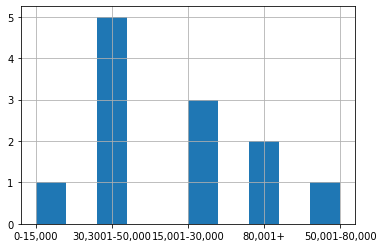

In [230]:
df.salary_group.hist()

## ลองทำเรื่องอายุ เเบ่งเป็นช่วงๆ

In [231]:
pd.to_datetime('today').year

2023

In [232]:
df['age'] = pd.to_datetime('today').year - df.dob.dt.year # สร้าง columns ที่หาอายุเอาไว้

In [233]:
age_cat = ["18-25", "26-30", "31-40", "41-50", "50+"]
df['age_group'] = pd.cut(df.age, # pd.cut คือ เเบ่งกล่ม   เเล้วก็ใส่ dataframe ที่จะพิจารณามา  ****************************************************************************************************************************
                         bins=[18, 25, 30, 40, 50, np.Inf], # ขอบเขตของารเเบ่งกลุ่ม      ****************************************************************************************************************************
                         labels=age_cat, # lebels                                     ****************************************************************************************************************************
                         right=True, # right=True คือ 18-25, 26-30  |  right=False คือ 18-24
                         include_lowest=True # include_lowest=True คือ 18-25 | include_lowest=False คือ 19-25
                         ).astype(CategoricalDtype(categories=age_cat, ordered=True))
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",29,26-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,3001-50,000",55,50+
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",36,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,3001-50,000",32,31-40
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,001+",49,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,3001-50,000",48,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,3001-50,000",60,50+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",40,31-40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,3001-50,000",36,31-40


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fname         12 non-null     object        
 1   lname         12 non-null     object        
 2   sex           12 non-null     object        
 3   dob           12 non-null     datetime64[ns]
 4   position      12 non-null     object        
 5   department    12 non-null     object        
 6   salary        12 non-null     int64         
 7   join_date     12 non-null     datetime64[ns]
 8   salary_group  12 non-null     category      
 9   age           12 non-null     int64         
 10  age_group     12 non-null     category      
dtypes: category(2), datetime64[ns](2), int64(2), object(5)
memory usage: 1.4+ KB


In [235]:
pd.crosstab(index=df.age_group, columns=df.sex)

sex,F,M
age_group,,
26-30,0,1
31-40,3,2
41-50,2,0
50+,3,1


In [236]:
def gen(x):
    x = x.year
    if 1946 <= x <= 1964:
        return 'Baby Boomer'
    elif 1965 <= x <= 1979:
        return 'Gen X'
    elif 1980 <= x <= 1994:
        return 'Gen Y'
    elif 1995 <= x <= 2012:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

In [237]:
df['gen_cat'] = df.dob.map(lambda d: gen(d)).astype(CategoricalDtype(
                                                                    categories=['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Gen Alpha'], 
                                                                    ordered=True))
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group,gen_cat
empID,,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",29,26-30,Gen Y
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,3001-50,000",55,50+,Gen X
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",36,31-40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,3001-50,000",32,31-40,Gen Y
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,001+",49,41-50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,3001-50,000",48,41-50,Gen X
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,3001-50,000",60,50+,Baby Boomer
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",40,31-40,Gen Y
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,3001-50,000",36,31-40,Gen Y


In [238]:
df.columns

Index(['fname', 'lname', 'sex', 'dob', 'position', 'department', 'salary',
       'join_date', 'salary_group', 'age', 'age_group', 'gen_cat'],
      dtype='object')

In [239]:
df[['age', 'age_group', 'gen_cat']].sort_values(by='age_group')

,age,age_group,gen_cat
empID,,,
604,29,26-30,Gen Y
486,36,31-40,Gen Y
229,32,31-40,Gen Y
665,40,31-40,Gen Y
41,36,31-40,Gen Y
724,40,31-40,Gen Y
901,49,41-50,Gen X
944,48,41-50,Gen X
607,55,50+,Gen X


In [240]:
df.dob.map(lambda d: gen(d)).astype(CategoricalDtype(categories=['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Gen Alpha'], 
                                                    ordered=True))

empID
604          Gen Y
607          Gen X
486          Gen Y
229          Gen Y
901          Gen X
944          Gen X
405    Baby Boomer
665          Gen Y
41           Gen Y
171    Baby Boomer
51           Gen X
724          Gen Y
Name: dob, dtype: category
Categories (5, object): ['Baby Boomer' < 'Gen X' < 'Gen Y' < 'Gen Z' < 'Gen Alpha']

# คลิป 67 การใช้ aggregate function ใน Series และ DataFrame (agg)

In [241]:
df=pd.read_csv("https://github.com/prasertcbs/tutorial/raw/master/mpg.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [242]:
df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [243]:
df.agg('mean')

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\394872364.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.agg('mean')


displ       3.471795
year     2003.500000
cyl         5.888889
cty        16.858974
hwy        23.440171
dtype: float64

In [244]:
df.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [245]:
df.agg(['min', 'max', 'mean']) # ***********************************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2762101378.py:1: FutureWarning: ['manufacturer', 'model', 'trans', 'drv', 'fl', 'class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min', 'max', 'mean']) # ***********************************************************************


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
min,audi,4runner 4wd,1.600000,1999.0,4.000000,auto(av),4,9.000000,12.000000,c,2seater
max,volkswagen,toyota tacoma 4wd,7.000000,2008.0,8.000000,manual(m6),r,35.000000,44.000000,r,suv
mean,NaN,NaN,3.471795,2003.5,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN


In [246]:
df.cty.mean()

16.858974358974358

In [247]:
df.cty.agg(['mean', 'max', 'min'])

mean    16.858974
max     35.000000
min      9.000000
Name: cty, dtype: float64

In [248]:
df[['cty', 'hwy']].agg(['mean', 'max', 'min'])

,cty,hwy
mean,16.858974,23.440171
max,35.000000,44.000000
min,9.000000,12.000000


In [249]:
df.groupby('year').mean() # เเบ่งเป็น group เเล้วเอามา mean

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\4064028434.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean() # เเบ่งเป็น group เเล้วเอามา mean


,displ,cyl,cty,hwy
year,,,,
1999,3.281197,5.692308,17.017094,23.427350
2008,3.662393,6.085470,16.700855,23.452991


In [250]:
df.groupby(['class', 'year'])[['cty','hwy']].mean() # *****************************************************************************

cty        hwy
class      year                      
2seater    1999  15.500000  24.500000
           2008  15.333333  25.000000
compact    1999  19.760000  27.920000
           2008  20.545455  28.727273
midsize    1999  18.150000  26.500000
           2008  19.333333  28.047619
minivan    1999  16.166667  22.500000
           2008  15.400000  22.200000
pickup     1999  13.000000  16.812500
           2008  13.000000  16.941176
subcompact 1999  21.578947  29.000000
           2008  18.937500  27.125000
suv        1999  13.379310  17.551724
           2008  13.606061  18.636364

In [251]:
df.groupby(['class', 'year'])[['cty','hwy']].agg(['mean', 'max', 'min']) # ****************************************************************************************

cty                hwy        
                      mean max min       mean max min
class      year                                      
2seater    1999  15.500000  16  15  24.500000  26  23
           2008  15.333333  16  15  25.000000  26  24
compact    1999  19.760000  33  15  27.920000  44  23
           2008  20.545455  28  15  28.727273  37  25
midsize    1999  18.150000  21  15  26.500000  29  24
           2008  19.333333  23  16  28.047619  32  23
minivan    1999  16.166667  18  15  22.500000  24  21
           2008  15.400000  17  11  22.200000  24  17
pickup     1999  13.000000  16  11  16.812500  20  15
           2008  13.000000  17   9  16.941176  22  12
subcompact 1999  21.578947  35  15  29.000000  44  21
           2008  18.937500  26  14  27.125000  36  20
suv        1999  13.379310  18  11  17.551724  25  15
           2008  13.606061  20   9  18.636364  27  12

In [252]:
g = df.groupby('class')

In [253]:
g.groups

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [254]:
g[['cty', 'hwy']].mean()

,cty,hwy
class,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


<AxesSubplot: ylabel='class'>

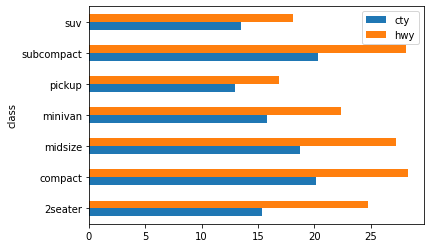

In [255]:
g[['cty', 'hwy']].mean().plot(kind='barh')

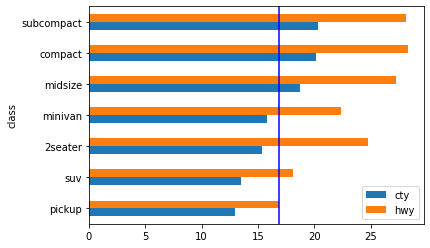

In [256]:
g_f = g[['cty', 'hwy']].mean().sort_values('cty').plot(kind='barh')
g_f.axvline(df.cty.mean(), color='blue')
# g_f.axvline(df.hwy.mean(), color='o')

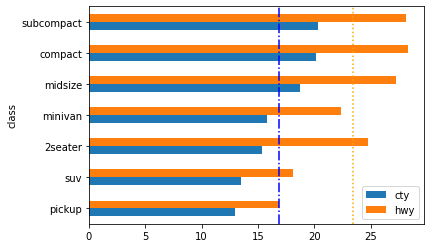

In [257]:
g[['cty', 'hwy']].mean().sort_values('cty').plot(kind='barh') # ถ้าจะ plot 2 เส้นเเบบนี้ก็ต้องใช้ plt *************************************************************************************************************
plt.axvline(df.cty.mean(), color='blue', linestyle = '-.')
plt.axvline(df.hwy.mean(), color='orange', linestyle = ':')

# คลิป 68 การสร้างตารางไขว้ (crosstab) ด้วย pandas

In [258]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
116,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
188,toyota,camry solara,2.4,2008,4,manual(m5),f,21,31,r,compact
182,toyota,camry,2.4,2008,4,auto(l5),f,21,31,r,midsize


In [259]:
pd.crosstab(index=df.drv, columns=df['class'], margins=True)

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0,12,3,0,33,4,51,103
f,0,35,38,11,0,22,0,106
r,5,0,0,0,0,9,11,25
All,5,47,41,11,33,35,62,234


In [260]:
pd.set_option('display.float_format', '{:.2f}%'.format)
pd.crosstab(index=df.drv, columns=df['class'], margins=True,normalize=True)*100

class,2seater,compact,midsize,minivan,pickup,subcompact,suv,All
drv,,,,,,,,
4,0.00%,5.13%,1.28%,0.00%,14.10%,1.71%,21.79%,44.02%
f,0.00%,14.96%,16.24%,4.70%,0.00%,9.40%,0.00%,45.30%
r,2.14%,0.00%,0.00%,0.00%,0.00%,3.85%,4.70%,10.68%
All,2.14%,20.09%,17.52%,4.70%,14.10%,14.96%,26.50%,100.00%


In [261]:
df['tran_am'] = df.trans.str[0]
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,tran_am
0,audi,a4,1.80%,1999,4,auto(l5),f,18,29,p,compact,a
1,audi,a4,1.80%,1999,4,manual(m5),f,21,29,p,compact,m
2,audi,a4,2.00%,2008,4,manual(m6),f,20,31,p,compact,m
3,audi,a4,2.00%,2008,4,auto(av),f,21,30,p,compact,a
4,audi,a4,2.80%,1999,6,auto(l5),f,16,26,p,compact,a
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.00%,2008,4,auto(s6),f,19,28,p,midsize,a
230,volkswagen,passat,2.00%,2008,4,manual(m6),f,21,29,p,midsize,m
231,volkswagen,passat,2.80%,1999,6,auto(l5),f,16,26,p,midsize,a
232,volkswagen,passat,2.80%,1999,6,manual(m5),f,18,26,p,midsize,m


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  tran_am       234 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 22.1+ KB


In [263]:
(df['class'] == 'compact') & (df.drv == '4')

0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Length: 234, dtype: bool

In [264]:
df.loc[((df['class'] == 'compact') & (df.drv == '4') & (df.manufacturer=='audi'))]['cty'].mean()

17.125

In [265]:
pd.reset_option('display.float_format')
pd.crosstab(index=[df['class'], df.drv], columns=df.manufacturer, aggfunc='mean', values=df.cty)

manufacturer         audi  chevrolet      dodge       ford      honda  \
class      drv                                                          
2seater    r          NaN       15.4        NaN        NaN        NaN   
compact    4    17.125000        NaN        NaN        NaN        NaN   
           f    18.857143        NaN        NaN        NaN        NaN   
midsize    4    16.000000        NaN        NaN        NaN        NaN   
           f          NaN       18.8        NaN        NaN        NaN   
minivan    f          NaN        NaN  15.818182        NaN        NaN   
pickup     4          NaN        NaN  12.052632  13.000000        NaN   
subcompact 4          NaN        NaN        NaN        NaN        NaN   
           f          NaN        NaN        NaN        NaN  24.444444   
           r          NaN        NaN        NaN  15.888889        NaN   
suv        4          NaN       12.5  11.857143  13.666667        NaN   
           r          NaN       12.8        NaN  11.333333        NaN   

manufacturer      hyundai  jeep  land rover    lincoln  mercury  nissan  \
class      drv                                                            
2seater    r          NaN   NaN         NaN        NaN      NaN     NaN   
compact    4          NaN   NaN         NaN        NaN      NaN     NaN   
           f          NaN   NaN         NaN        NaN      NaN   20.00   
midsize    4          NaN   NaN         NaN        NaN      NaN     NaN   
           f    19.000000   NaN         NaN        NaN      NaN   20.00   
minivan    f          NaN   NaN         NaN        NaN      NaN     NaN   
pickup     4          NaN   NaN         NaN        NaN      NaN     NaN   
subcompact 4          NaN   NaN         NaN        NaN      NaN     NaN   
           f    18.285714   NaN         NaN        NaN      NaN     NaN   
           r          NaN   NaN         NaN        NaN      NaN     NaN   
suv        4          NaN  13.5        11.5        NaN    13.25   13.75   
           r          NaN   NaN         NaN  11.333333      NaN     NaN   

manufacturer    pontiac     subaru     toyota  volkswagen  
class      drv                                             
2seater    r        NaN        NaN        NaN         NaN  
compact    4        NaN  19.750000        NaN         NaN  
           f        NaN        NaN  22.250000   20.785714  
midsize    4        NaN        NaN        NaN         NaN  
           f       17.0        NaN  19.857143   18.571429  
minivan    f        NaN        NaN        NaN         NaN  
pickup     4        NaN        NaN  15.571429         NaN  
subcompact 4        NaN  19.500000        NaN         NaN  
           f        NaN        NaN        NaN   24.000000  
           r        NaN        NaN        NaN         NaN  
suv        4        NaN  18.833333  14.375000         NaN  
           r        NaN        NaN        NaN         NaN

In [266]:
pd.crosstab(index=[df['class'], df.drv], columns=df.manufacturer, aggfunc=['mean', 'sum'], values=df.cty).loc[['compact', 'minivan']]

mean                                               \
manufacturer       audi chevrolet      dodge ford honda hyundai jeep   
class   drv                                                            
compact 4     17.125000       NaN        NaN  NaN   NaN     NaN  NaN   
        f     18.857143       NaN        NaN  NaN   NaN     NaN  NaN   
minivan f           NaN       NaN  15.818182  NaN   NaN     NaN  NaN   

                                         ...     sum                          \
manufacturer land rover lincoln mercury  ... hyundai jeep land rover lincoln   
class   drv                              ...                                   
compact 4           NaN     NaN     NaN  ...     NaN  NaN        NaN     NaN   
        f           NaN     NaN     NaN  ...     NaN  NaN        NaN     NaN   
minivan f           NaN     NaN     NaN  ...     NaN  NaN        NaN     NaN   

                                                              
manufacturer mercury nissan pontiac subaru toyota volkswagen  
class   drv                                                   
compact 4        NaN    NaN     NaN   79.0    NaN        NaN  
        f        NaN   40.0     NaN    NaN  267.0      291.0  
minivan f        NaN    NaN     NaN    NaN    NaN        NaN  

[3 rows x 30 columns]

In [267]:
# df.tran_am = df.tran_am.astype(CategoricalDtype(categories=['m','a'], ordered=True))
# df.sort_values('tran_am')  มวนเฉยๆ


# df.tran_am = pd.Categorical(df.tran_am, categories=['m','a'], ordered=True)
# df.sort_values('tran_am')


# df.tran_am = df.tran_am.astype('category') อันนี้ก็เเค่กำหนดเฉยๆ

# คลิป 69 การสร้าง pivot table ด้วย pandas เบื้องต้น

In [268]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long.csv')
df # เเบบนี้เรียกว่า long format (melt)

,branch,menu,units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [269]:
df.pivot_table(index='branch', columns='menu')

units            
menu    espresso latte mocha
branch                      
Bangkok      435   160   365
Pattaya      160   305   350
Phuket       245   330    70
Tak           80    85   450

## Mutli Ids

In [270]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long2.csv')
df.sample(frac=0.1)

,branch,period,menu,units
25,Phuket,2015,espresso,490
2,Pattaya,2015,mocha,265
26,Pattaya,2015,espresso,355
0,Bangkok,2015,mocha,215


In [271]:
df1 = df.pivot_table(index=['branch', 'period'], columns='menu', values='units',aggfunc='sum', margins=True) # *******************************************************************************************
df1

menu            espresso  latte  mocha    All
branch  period                               
Bangkok 2015         455    390    215   1060
        2016         140    115    480    735
        2017         190    300    410    900
Pattaya 2015         355    400    265   1020
        2016         250    435    225    910
        2017         360    425    140    925
Phuket  2015         490    475    280   1245
        2016          30    450    155    635
        2017         380    320    175    875
Tak     2015         320    340    355   1015
        2016         235    365    425   1025
        2017         135    165    240    540
All                 3340   4180   3365  10885

branch
All        AxesSubplot(0.125,0.125;0.775x0.755)
Bangkok    AxesSubplot(0.125,0.125;0.775x0.755)
Pattaya    AxesSubplot(0.125,0.125;0.775x0.755)
Phuket     AxesSubplot(0.125,0.125;0.775x0.755)
Tak        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

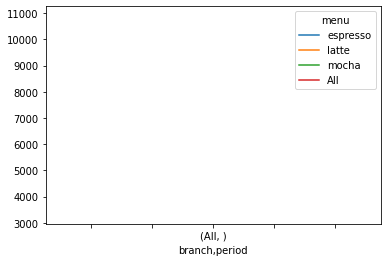

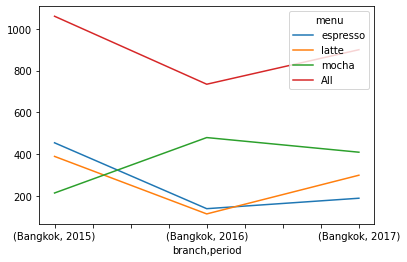

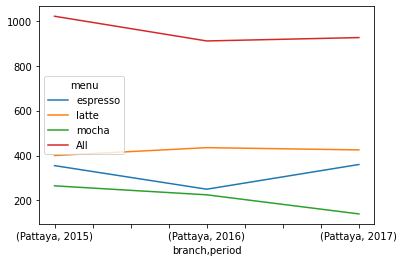

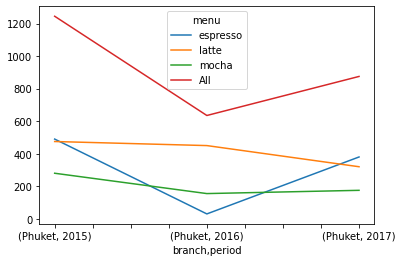

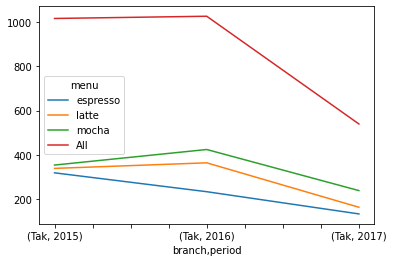

In [272]:
df1.groupby('branch').plot()

## test

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
table = df.pivot_table(index=['A', 'C'], aggfunc={'D':'mean', 'E':['max', 'min']})
table

# คลิป 70 การ melt/unpivot pandas DataFrame

In [273]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/wide.csv')
df

,branch,mocha,latte,espresso
0,Bangkok,365,160,435
1,Phuket,70,330,245
2,Pattaya,350,305,160
3,Tak,450,85,80


In [274]:
df.melt(id_vars='branch')

,branch,variable,value
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [275]:
df1 = df.melt(id_vars='branch', var_name='A', value_name='B') # กำหนกชื่อ column เอง
df1

,branch,A,B
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [276]:
df.describe()

,mocha,latte,espresso
count,4.000000,4.000000,4.000000
mean,308.750000,220.000000,230.000000
std,165.145138,117.118174,152.370163
min,70.000000,85.000000,80.000000
25%,280.000000,141.250000,140.000000
50%,357.500000,232.500000,202.500000
75%,386.250000,311.250000,292.500000
max,450.000000,330.000000,435.000000


In [277]:
df1.describe()

,B
count,12.000000
mean,252.916667
std,138.669954
min,70.000000
25%,141.250000
50%,275.000000
75%,353.750000
max,450.000000


In [278]:
df1.groupby('A').describe().T

A          espresso       latte       mocha
B count    4.000000    4.000000    4.000000
  mean   230.000000  220.000000  308.750000
  std    152.370163  117.118174  165.145138
  min     80.000000   85.000000   70.000000
  25%    140.000000  141.250000  280.000000
  50%    202.500000  232.500000  357.500000
  75%    292.500000  311.250000  386.250000
  max    435.000000  330.000000  450.000000

In [279]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/wide2.csv')
df

,branch,period,mocha,latte,espresso
0,Bangkok,2015,215,390,455
1,Phuket,2015,280,475,490
2,Pattaya,2015,265,400,355
3,Tak,2015,355,340,320
4,Bangkok,2016,480,115,140
5,Phuket,2016,155,450,30
6,Pattaya,2016,225,435,250
7,Tak,2016,425,365,235
8,Bangkok,2017,410,300,190
9,Phuket,2017,175,320,380


In [280]:
df1 = df.melt(id_vars=['branch', 'period'])
df1

,branch,period,variable,value
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [281]:
df1.groupby('variable').describe()

period                                                            \
          count    mean       std     min     25%     50%     75%     max   
variable                                                                    
espresso   12.0  2016.0  0.852803  2015.0  2015.0  2016.0  2017.0  2017.0   
latte      12.0  2016.0  0.852803  2015.0  2015.0  2016.0  2017.0  2017.0   
mocha      12.0  2016.0  0.852803  2015.0  2015.0  2016.0  2017.0  2017.0   

         value                                                              
         count        mean         std    min    25%    50%     75%    max  
variable                                                                    
espresso  12.0  278.333333  138.978961   30.0  177.5  285.0  365.00  490.0  
latte     12.0  348.333333  111.076005  115.0  315.0  377.5  427.50  475.0  
mocha     12.0  280.416667  112.360182  140.0  205.0  252.5  368.75  480.0

In [282]:
df1.groupby('variable').describe()['value']

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
espresso,12.0,278.333333,138.978961,30.0,177.5,285.0,365.00,490.0
latte,12.0,348.333333,111.076005,115.0,315.0,377.5,427.50,475.0
mocha,12.0,280.416667,112.360182,140.0,205.0,252.5,368.75,480.0


# คลิป 71 การสร้าง pandas pivot table แสดงความถี่ และการแสดง missing values

In [283]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [284]:
df.pivot_table(index='class', columns='drv')

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3609363170.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='class', columns='drv')


cty                             cyl                      \
drv                 4          f          r         4         f         r   
class                                                                       
2seater           NaN        NaN  15.400000       NaN       NaN  8.000000   
compact     18.000000  20.857143        NaN  4.666667  4.571429       NaN   
midsize     16.000000  18.973684        NaN  6.666667  5.210526       NaN   
minivan           NaN  15.818182        NaN       NaN  5.818182       NaN   
pickup      13.000000        NaN        NaN  7.030303       NaN       NaN   
subcompact  19.500000  22.363636  15.888889  4.000000  4.363636  7.111111   
suv         13.823529        NaN  12.000000  6.745098       NaN  8.000000   

               displ                            hwy                        \
drv                4         f         r          4          f          r   
class                                                                       
2seater          NaN       NaN  6.160000        NaN        NaN  24.800000   
compact     2.450000  2.282857       NaN  25.833333  29.142857        NaN   
midsize     3.366667  2.886842       NaN  24.000000  27.552632        NaN   
minivan          NaN  3.390909       NaN        NaN  22.363636        NaN   
pickup      4.418182       NaN       NaN  16.878788        NaN        NaN   
subcompact  2.350000  2.013636  4.377778  26.000000  30.545455  23.222222   
suv         4.256863       NaN  5.381818  18.274510        NaN  17.454545   

                   year                            
drv                   4            f            r  
class                                              
2seater             NaN          NaN  2004.400000  
compact     2005.000000  2002.600000          NaN  
midsize     2005.000000  2003.500000          NaN  
minivan             NaN  2003.090909          NaN  
pickup      2003.636364          NaN          NaN  
subcompact  1999.000000  2003.500000  2004.000000  
suv         2003.764706          NaN  2003.909091

In [285]:
df.pivot_table(index='class', columns='drv', values='cty', fill_value='-')

drv,4,f,r
class,,,
2seater,-,-,15.4
compact,18.0,20.857143,-
midsize,16.0,18.973684,-
minivan,-,15.818182,-
pickup,13.0,-,-
subcompact,19.5,22.363636,15.888889
suv,13.823529,-,12.0


In [286]:
df1 = df.pivot_table(index='class', columns='drv', values='cty', aggfunc='count', # ********************************************************************************
               fill_value='-',                                              # ********************************************************************************
               margins=True, margins_name='Total') #.astype('int') ทำไมไม่ได้มันมีขีด 
df1

drv,4,f,r,Total
class,,,,
2seater,-,-,5.0,5
compact,12.0,35.0,-,47
midsize,3.0,38.0,-,41
minivan,-,11.0,-,11
pickup,33.0,-,-,33
subcompact,4.0,22.0,9.0,35
suv,51.0,-,11.0,62
Total,103,106,25,234


<AxesSubplot: xlabel='class'>

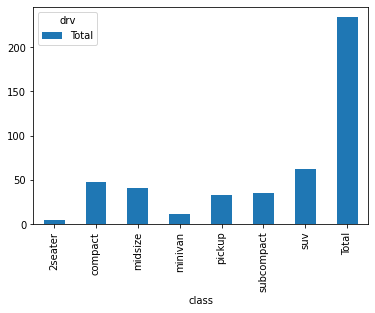

In [287]:
df1.plot(rot=90, kind='bar')

In [288]:
df.pivot_table(index='class', columns='drv', values=['cty', 'hwy'], aggfunc='mean', fill_value='-') # ********************************************************************

cty                              hwy                      
drv                 4          f          r          4          f          r
class                                                                       
2seater             -          -       15.4          -          -       24.8
compact          18.0  20.857143          -  25.833333  29.142857          -
midsize          16.0  18.973684          -       24.0  27.552632          -
minivan             -  15.818182          -          -  22.363636          -
pickup           13.0          -          -  16.878788          -          -
subcompact       19.5  22.363636  15.888889       26.0  30.545455  23.222222
suv         13.823529          -       12.0   18.27451          -  17.454545

# คลิป 72 การใช้ aggregate function ใน pivot table ของ pandas

In [289]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long2.csv')
df.head() # long format(melt)

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480


In [290]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc=['sum','mean'], margins=True)

sum                           mean                          \
menu    espresso latte mocha    All    espresso       latte       mocha   
branch                                                                    
Bangkok      785   805  1105   2695  261.666667  268.333333  368.333333   
Pattaya      965  1260   630   2855  321.666667  420.000000  210.000000   
Phuket       900  1245   610   2755  300.000000  415.000000  203.333333   
Tak          690   870  1020   2580  230.000000  290.000000  340.000000   
All         3340  4180  3365  10885  278.333333  348.333333  280.416667   

                     
menu            All  
branch               
Bangkok  299.444444  
Pattaya  317.222222  
Phuket   306.111111  
Tak      286.666667  
All      302.361111

In [291]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc=['sum','mean'], margins=True, margins_name='sum')

sum                           mean                          \
menu    espresso latte mocha    sum    espresso       latte       mocha   
branch                                                                    
Bangkok      785   805  1105   2695  261.666667  268.333333  368.333333   
Pattaya      965  1260   630   2855  321.666667  420.000000  210.000000   
Phuket       900  1245   610   2755  300.000000  415.000000  203.333333   
Tak          690   870  1020   2580  230.000000  290.000000  340.000000   
sum         3340  4180  3365  10885  278.333333  348.333333  280.416667   

                     
menu            sum  
branch               
Bangkok  299.444444  
Pattaya  317.222222  
Phuket   306.111111  
Tak      286.666667  
sum      302.361111

In [292]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc=[np.sum, np.mean], margins=True, margins_name='sum').round(2) # หรือ aggfunc=[np.sum, np.mean]  ก็ได้

sum                        mean                        
menu    espresso latte mocha    sum espresso   latte   mocha     sum
branch                                                              
Bangkok      785   805  1105   2695   261.67  268.33  368.33  299.44
Pattaya      965  1260   630   2855   321.67  420.00  210.00  317.22
Phuket       900  1245   610   2755   300.00  415.00  203.33  306.11
Tak          690   870  1020   2580   230.00  290.00  340.00  286.67
sum         3340  4180  3365  10885   278.33  348.33  280.42  302.36

In [293]:
df.pivot_table(index=['branch', 'period'], columns='menu', values='units', aggfunc=[np.sum, np.mean], margins=True, margins_name='sum').round(2)

sum                        mean                        
menu           espresso latte mocha    sum espresso   latte   mocha     sum
branch  period                                                             
Bangkok 2015        455   390   215   1060   455.00  390.00  215.00  353.33
        2016        140   115   480    735   140.00  115.00  480.00  245.00
        2017        190   300   410    900   190.00  300.00  410.00  300.00
Pattaya 2015        355   400   265   1020   355.00  400.00  265.00  340.00
        2016        250   435   225    910   250.00  435.00  225.00  303.33
        2017        360   425   140    925   360.00  425.00  140.00  308.33
Phuket  2015        490   475   280   1245   490.00  475.00  280.00  415.00
        2016         30   450   155    635    30.00  450.00  155.00  211.67
        2017        380   320   175    875   380.00  320.00  175.00  291.67
Tak     2015        320   340   355   1015   320.00  340.00  355.00  338.33
        2016        235   365   425   1025   235.00  365.00  425.00  341.67
        2017        135   165   240    540   135.00  165.00  240.00  180.00
sum                3340  4180  3365  10885   278.33  348.33  280.42  302.36

In [294]:
df.pivot_table(index=['branch'], columns=['menu', 'period'], values='units', aggfunc=[np.sum, np.mean], margins=True, margins_name='sum').round(2)

sum                                                       \
menu    espresso            latte             mocha               sum   
period      2015 2016  2017  2015  2016  2017  2015  2016 2017          
branch                                                                  
Bangkok      455  140   190   390   115   300   215   480  410   2695   
Pattaya      355  250   360   400   435   425   265   225  140   2855   
Phuket       490   30   380   475   450   320   280   155  175   2755   
Tak          320  235   135   340   365   165   355   425  240   2580   
sum         1620  655  1065  1605  1365  1210  1115  1285  965  10885   

            mean                                                         \
menu    espresso                   latte                  mocha           
period      2015    2016    2017    2015    2016   2017    2015    2016   
branch                                                                    
Bangkok      455  140.00  190.00  390.00  115.00  300.0  215.00  480.00   
Pattaya      355  250.00  360.00  400.00  435.00  425.0  265.00  225.00   
Phuket       490   30.00  380.00  475.00  450.00  320.0  280.00  155.00   
Tak          320  235.00  135.00  340.00  365.00  165.0  355.00  425.00   
sum          405  163.75  266.25  401.25  341.25  302.5  278.75  321.25   

                         
menu                sum  
period     2017          
branch                   
Bangkok  410.00  299.44  
Pattaya  140.00  317.22  
Phuket   175.00  306.11  
Tak      240.00  286.67  
sum      241.25  302.36

<AxesSubplot: ylabel='branch'>

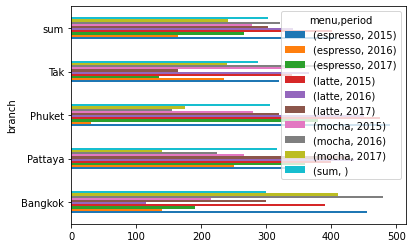

In [295]:
df.pivot_table(index=['branch'], columns=['menu', 'period'], values='units', margins=True, margins_name='sum').round(2).plot(kind='barh')

<AxesSubplot: ylabel='branch'>

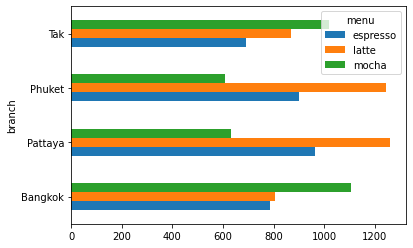

In [296]:
df.pivot_table(index=['branch'], columns=['menu'], values='units',aggfunc='sum').round(2).plot(kind='barh')

## test pd.indexslic เฉยๆ

In [297]:
df.set_index(['period','branch'], inplace=True)


In [298]:
df.head()

menu  units
period branch               
2015   Bangkok  mocha    215
       Phuket   mocha    280
       Pattaya  mocha    265
       Tak      mocha    355
2016   Bangkok  mocha    480

In [299]:
# df.info()
df.loc[pd.IndexSlice[[2015, 2017], ['Bangkok', 'Phuket']], :]

menu  units
period branch                  
2015   Bangkok     mocha    215
       Bangkok     latte    390
       Bangkok  espresso    455
       Phuket      mocha    280
       Phuket      latte    475
       Phuket   espresso    490
2017   Bangkok     mocha    410
       Bangkok     latte    300
       Bangkok  espresso    190
       Phuket      mocha    175
       Phuket      latte    320
       Phuket   espresso    380

# คลิป 73 การใช้ diff() และ pct_change() เพื่อหาผลต่างระหว่างสองแถว

In [300]:
bbl = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod/bbl.csv', 
                     index_col='Date', parse_dates=True)
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0


In [301]:
bbl.Close.diff() # คือ วันนี้ลบเมื่อวาน *********************************************************************************************************************************************

Date
2017-02-01    NaN
2017-02-02    0.0
2017-02-03    3.0
2017-02-06    2.0
2017-02-07   -0.5
2017-02-08   -1.0
2017-02-09    2.0
2017-02-10    1.5
2017-02-13    0.0
2017-02-14   -3.5
Name: Close, dtype: float64

In [302]:
bbl['chg'] = bbl.Close.diff() 
bbl

,Open,High,Low,Close,Adj Close,Volume,chg
Date,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,3.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.5
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,2.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,1.5
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,0.0


In [303]:
bbl['Close'].pct_change() # เหมือน diff เเต่คิดเป็น % ***************************************************************************************

Date
2017-02-01         NaN
2017-02-02    0.000000
2017-02-03    0.017094
2017-02-06    0.011204
2017-02-07   -0.002770
2017-02-08   -0.005556
2017-02-09    0.011173
2017-02-10    0.008287
2017-02-13    0.000000
2017-02-14   -0.019178
Name: Close, dtype: float64

In [304]:
bbl['pct_chg'] = bbl['Close'].pct_change()
bbl

,Open,High,Low,Close,Adj Close,Volume,chg,pct_chg
Date,,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN,NaN
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.0,0.000000
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,3.0,0.017094
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2.0,0.011204
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.5,-0.002770
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1.0,-0.005556
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,2.0,0.011173
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,1.5,0.008287
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,0.0,0.000000


log return = $ln\big(\frac{p_t}{p_{t-1}}\big) = ln(p_t)-ln(p_{t-1})$

In [305]:
np.log(178.5/175.5)

0.016949558313773205

In [306]:
np.log(178.5)-np.log(175.5)

0.016949558313772428

In [307]:
np.log(bbl.Close)

Date
2017-02-01    5.167639
2017-02-02    5.167639
2017-02-03    5.184589
2017-02-06    5.195731
2017-02-07    5.192957
2017-02-08    5.187386
2017-02-09    5.198497
2017-02-10    5.206750
2017-02-13    5.206750
2017-02-14    5.187386
Name: Close, dtype: float64

In [308]:
bbl['Close_ln'] = np.log(bbl.Close)
bbl

,Open,High,Low,Close,Adj Close,Volume,chg,pct_chg,Close_ln
Date,,,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN,NaN,5.167639
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.0,0.000000,5.167639
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,3.0,0.017094,5.184589
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2.0,0.011204,5.195731
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.5,-0.002770,5.192957
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1.0,-0.005556,5.187386
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,2.0,0.011173,5.198497
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,1.5,0.008287,5.206750
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,0.0,0.000000,5.206750


In [309]:
bbl.Close_ln.diff() # log return

Date
2017-02-01         NaN
2017-02-02    0.000000
2017-02-03    0.016950
2017-02-06    0.011142
2017-02-07   -0.002774
2017-02-08   -0.005571
2017-02-09    0.011111
2017-02-10    0.008253
2017-02-13    0.000000
2017-02-14   -0.019364
Name: Close_ln, dtype: float64

In [310]:
bbl['ln_return'] = bbl.Close_ln.diff()
bbl

,Open,High,Low,Close,Adj Close,Volume,chg,pct_chg,Close_ln,ln_return
Date,,,,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN,NaN,5.167639,NaN
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.0,0.000000,5.167639,0.000000
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,3.0,0.017094,5.184589,0.016950
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2.0,0.011204,5.195731,0.011142
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.5,-0.002770,5.192957,-0.002774
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1.0,-0.005556,5.187386,-0.005571
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,2.0,0.011173,5.198497,0.011111
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,1.5,0.008287,5.206750,0.008253
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,0.0,0.000000,5.206750,0.000000


In [311]:
bbl['ln_return2'] = np.log(bbl.Close).diff()
bbl

,Open,High,Low,Close,Adj Close,Volume,chg,pct_chg,Close_ln,ln_return,ln_return2
Date,,,,,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN,NaN,5.167639,NaN,NaN
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,0.0,0.000000,5.167639,0.000000,0.000000
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,3.0,0.017094,5.184589,0.016950,0.016950
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2.0,0.011204,5.195731,0.011142,0.011142
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-0.5,-0.002770,5.192957,-0.002774,-0.002774
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1.0,-0.005556,5.187386,-0.005571,-0.005571
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,2.0,0.011173,5.198497,0.011111,0.011111
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,1.5,0.008287,5.206750,0.008253,0.008253
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,0.0,0.000000,5.206750,0.000000,0.000000


# คลิป 74 การใช้ diff() และ pct_change() ร่วมกับ groupby ใน pandas DataFrame

In [312]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod1.csv', 
                     index_col='Date', parse_dates=True)
df

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-02-01,bbl,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.0
2017-02-02,bbl,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.0
2017-02-03,bbl,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.0
2017-02-06,bbl,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.0
2017-02-07,bbl,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.0
2017-02-01,ktb,19.000000,19.200001,18.900000,19.200001,18.366062,21752200.0
2017-02-02,ktb,19.200001,19.200001,18.900000,19.000000,18.174747,40206000.0
2017-02-03,ktb,19.000000,19.100000,18.900000,19.100000,18.270405,48912400.0
2017-02-06,ktb,19.200001,19.299999,18.900000,19.000000,18.174747,77639200.0


In [313]:
df.Close.diff()

Date
2017-02-01           NaN
2017-02-02      0.000000
2017-02-03      3.000000
2017-02-06      2.000000
2017-02-07     -0.500000
2017-02-01   -160.799999
2017-02-02     -0.200001
2017-02-03      0.100000
2017-02-06     -0.100000
2017-02-07      0.000000
2017-02-01    133.000000
2017-02-02     -1.000000
2017-02-03      2.000000
2017-02-06      1.500000
2017-02-07     -0.500000
Name: Close, dtype: float64

In [314]:
df.groupby('Symbol').Close.diff() # ***************************************************************************************************

Date
2017-02-01         NaN
2017-02-02    0.000000
2017-02-03    3.000000
2017-02-06    2.000000
2017-02-07   -0.500000
2017-02-01         NaN
2017-02-02   -0.200001
2017-02-03    0.100000
2017-02-06   -0.100000
2017-02-07    0.000000
2017-02-01         NaN
2017-02-02   -1.000000
2017-02-03    2.000000
2017-02-06    1.500000
2017-02-07   -0.500000
Name: Close, dtype: float64

In [315]:
df['chg'] = df.groupby('Symbol').Close.diff()
df.round(2)

,Symbol,Open,High,Low,Close,Adj Close,Volume,chg
Date,,,,,,,,
2017-02-01,bbl,174.5,175.5,173.5,175.5,169.36,5953500.0,NaN
2017-02-02,bbl,175.0,177.0,174.5,175.5,169.36,5250500.0,0.0
2017-02-03,bbl,175.0,178.5,175.0,178.5,172.25,5470600.0,3.0
2017-02-06,bbl,178.5,181.5,178.5,180.5,174.18,8150800.0,2.0
2017-02-07,bbl,180.5,181.0,179.0,180.0,173.70,3648600.0,-0.5
2017-02-01,ktb,19.0,19.2,18.9,19.2,18.37,21752200.0,NaN
2017-02-02,ktb,19.2,19.2,18.9,19.0,18.17,40206000.0,-0.2
2017-02-03,ktb,19.0,19.1,18.9,19.1,18.27,48912400.0,0.1
2017-02-06,ktb,19.2,19.3,18.9,19.0,18.17,77639200.0,-0.1


In [316]:
df['pct'] = df.groupby('Symbol').Close.pct_change()
df.round(3)

,Symbol,Open,High,Low,Close,Adj Close,Volume,chg,pct
Date,,,,,,,,,
2017-02-01,bbl,174.5,175.5,173.5,175.5,169.355,5953500.0,NaN,NaN
2017-02-02,bbl,175.0,177.0,174.5,175.5,169.355,5250500.0,0.0,0.000
2017-02-03,bbl,175.0,178.5,175.0,178.5,172.250,5470600.0,3.0,0.017
2017-02-06,bbl,178.5,181.5,178.5,180.5,174.180,8150800.0,2.0,0.011
2017-02-07,bbl,180.5,181.0,179.0,180.0,173.698,3648600.0,-0.5,-0.003
2017-02-01,ktb,19.0,19.2,18.9,19.2,18.366,21752200.0,NaN,NaN
2017-02-02,ktb,19.2,19.2,18.9,19.0,18.175,40206000.0,-0.2,-0.010
2017-02-03,ktb,19.0,19.1,18.9,19.1,18.270,48912400.0,0.1,0.005
2017-02-06,ktb,19.2,19.3,18.9,19.0,18.175,77639200.0,-0.1,-0.005


log return = $ln\big(\frac{p_t}{p_{t-1}}\big) = ln(p_t) - ln(p_{t-1})$

In [317]:
df.groupby('Symbol').Close.apply(lambda x: np.log(x).diff())

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\229466127.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('Symbol').Close.apply(lambda x: np.log(x).diff())


Date
2017-02-01         NaN
2017-02-02    0.000000
2017-02-03    0.016950
2017-02-06    0.011142
2017-02-07   -0.002774
2017-02-01         NaN
2017-02-02   -0.010471
2017-02-03    0.005249
2017-02-06   -0.005249
2017-02-07    0.000000
2017-02-01         NaN
2017-02-02   -0.006601
2017-02-03    0.013158
2017-02-06    0.009756
2017-02-07   -0.003241
Name: Close, dtype: float64

In [318]:
df['ln_return'] = df.groupby('Symbol').Close.apply(lambda x: np.log(x).diff())
df.round(3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3883511162.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['ln_return'] = df.groupby('Symbol').Close.apply(lambda x: np.log(x).diff())


,Symbol,Open,High,Low,Close,Adj Close,Volume,chg,pct,ln_return
Date,,,,,,,,,,
2017-02-01,bbl,174.5,175.5,173.5,175.5,169.355,5953500.0,NaN,NaN,NaN
2017-02-02,bbl,175.0,177.0,174.5,175.5,169.355,5250500.0,0.0,0.000,0.000
2017-02-03,bbl,175.0,178.5,175.0,178.5,172.250,5470600.0,3.0,0.017,0.017
2017-02-06,bbl,178.5,181.5,178.5,180.5,174.180,8150800.0,2.0,0.011,0.011
2017-02-07,bbl,180.5,181.0,179.0,180.0,173.698,3648600.0,-0.5,-0.003,-0.003
2017-02-01,ktb,19.0,19.2,18.9,19.2,18.366,21752200.0,NaN,NaN,NaN
2017-02-02,ktb,19.2,19.2,18.9,19.0,18.175,40206000.0,-0.2,-0.010,-0.010
2017-02-03,ktb,19.0,19.1,18.9,19.1,18.270,48912400.0,0.1,0.005,0.005
2017-02-06,ktb,19.2,19.3,18.9,19.0,18.175,77639200.0,-0.1,-0.005,-0.005


# คลิป 75 สร้างคอลัมน์แสดงลำดับ (rank) ด้วย pandas

In [319]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [320]:
df['rank_cty'] = df['cty'].rank(ascending=False, method='dense') # ***********************************************************************************************************************
                                                # method= 'average' => 1, 2.5, 2.5, 4
                                                # min => 1, 1, 3, 4 ******************************************************************************************************************************
                                                # max => 1, 3, 3, 4
                                                # first => 1,2,3,4
                                                # dense => 1,1,2,2,3 ******************************************************************************************************************************
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,13.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,10.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,10.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,12.0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,10.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,15.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,13.0


In [321]:
df.sort_values('rank_cty').head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,1.0
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.0
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,3.0
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,4.0
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,4.0
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,5.0
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,5.0
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,5.0
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,6.0
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,6.0


## rank groupby

In [322]:
df['rank_groupby'] = df.groupby('class')['cty'].rank(ascending=False, method='dense') # ***************************************************************************************
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty,rank_groupby
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,13.0,9.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,10.0,6.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11.0,7.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,10.0,6.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,12.0,4.0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,10.0,3.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,15.0,7.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,13.0,5.0


In [323]:
df.sort_values(['class', 'rank_groupby']).head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty,rank_groupby
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,15.0,1.0
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,15.0,1.0
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,16.0,2.0
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,16.0,2.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,16.0,2.0
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.0,1.0
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,4.0,2.0
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,5.0,3.0
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,5.0,3.0
193,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,7.0,4.0


In [324]:
df['trans_am'] = df.trans.str[0]
df['trans_am_rank'] = df.groupby(['class', 'trans_am'])['cty'].rank(method='first') # **********************************************************************************************************
df.sort_values(['class', 'trans_am', 'trans_am_rank']).head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty,rank_groupby,trans_am,trans_am_rank
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,16.0,2.0,a,1.0
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,16.0,2.0,a,2.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,16.0,2.0,m,1.0
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,15.0,1.0,m,2.0
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,15.0,1.0,m,3.0
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,16.0,12.0,a,1.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,15.0,11.0,a,2.0
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,15.0,11.0,a,3.0
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,15.0,11.0,a,4.0
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,14.0,10.0,a,5.0


In [325]:
df[df['trans_am_rank'] == 1]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank_cty,rank_groupby,trans_am,trans_am_rank
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,16.0,12.0,a,1.0
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,16.0,12.0,m,1.0
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize,16.0,8.0,a,1.0
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,16.0,2.0,a,1.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,16.0,2.0,m,1.0
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan,20.0,5.0,a,1.0
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,21.0,8.0,a,1.0
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,21.0,11.0,a,1.0
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,21.0,8.0,m,1.0
78,ford,explorer 4wd,4.0,1999,6,manual(m5),4,15,19,r,suv,16.0,6.0,m,1.0


# คลิป 76 การ standardize data (z-score) ด้วย pandas

In [326]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df[:10]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [327]:
x_bar = df.cty.mean()
sd = df.cty.std()
print(f'mean = {x_bar}, std = {sd}')


mean = 16.858974358974358, std = 4.255945678889395


z-score(ค่ามาตรฐาน) = (x-mean)/sd

In [328]:
df['z_cty'] = (df.cty-x_bar)/sd
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,0.503067
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0.972998
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-0.201829
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0.268102


In [329]:
df.z_cty.mean() # ต้องออกมาได้ = 0

3.036507417778206e-16

In [330]:
df.z_cty.std() # ต้องได้ 1

1.0

## multicolumn calculation

In [331]:
df[['cty', 'hwy']].mean()

cty    16.858974
hwy    23.440171
dtype: float64

In [332]:
df[['cty', 'hwy']].std()

cty    4.255946
hwy    5.954643
dtype: float64

In [333]:
df_z = (df[['cty', 'hwy']]-df[['cty', 'hwy']].mean())/df[['cty', 'hwy']].std()
df_z

,cty,hwy
0,0.268102,0.933696
1,0.972998,0.933696
2,0.738032,1.269569
3,0.972998,1.101633
4,-0.201829,0.429888
...,...,...
229,0.503067,0.765760
230,0.972998,0.933696
231,-0.201829,0.429888
232,0.268102,0.429888


## def

In [334]:
def z(df):
    return (df-df.mean())/df.std()

In [335]:
dz = z(df[['cty', 'hwy']])
dz

,cty,hwy
0,0.268102,0.933696
1,0.972998,0.933696
2,0.738032,1.269569
3,0.972998,1.101633
4,-0.201829,0.429888
...,...,...
229,0.503067,0.765760
230,0.972998,0.933696
231,-0.201829,0.429888
232,0.268102,0.429888


## concat

In [336]:
pd.concat([df, dz], axis='columns') # ให้เอามาต่อกันทาง columns axis='columns'

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty,cty,hwy
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102,0.268102,0.933696
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998,0.972998,0.933696
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032,0.738032,1.269569
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998,0.972998,1.101633
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829,-0.201829,0.429888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,0.503067,0.503067,0.765760
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0.972998,0.972998,0.933696
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-0.201829,-0.201829,0.429888
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0.268102,0.268102,0.429888


## join

In [337]:
df.join(dz, rsuffix='_z') # เอามาต่อ column เลย เเล้วสามารถเอาคำมาต่อยท้ายชื่อ column ได้ด้วย **************************************************************************************************************
            # ถ้ามีชื่อที่ซ้ำกันให้เอา _z ไปเติมด้าน r(right)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty,cty_z,hwy_z
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102,0.268102,0.933696
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998,0.972998,0.933696
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032,0.738032,1.269569
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998,0.972998,1.101633
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829,-0.201829,0.429888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,0.503067,0.503067,0.765760
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0.972998,0.972998,0.933696
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-0.201829,-0.201829,0.429888
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0.268102,0.268102,0.429888


## merge

In [338]:
df.merge(dz, left_index=True, right_index=True, suffixes=('', '_z')) # ข้างซ้ายไม่เติมอะไร ข้างวาเติม _z ****************************************************************************************
                                                

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty,cty_z,hwy_z
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102,0.268102,0.933696
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998,0.972998,0.933696
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032,0.738032,1.269569
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998,0.972998,1.101633
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829,-0.201829,0.429888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,0.503067,0.503067,0.765760
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0.972998,0.972998,0.933696
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-0.201829,-0.201829,0.429888
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0.268102,0.268102,0.429888


# คลิป 77 การรวมหลาย ๆ DataFrame เข้าด้วยกันด้วย pd.concat

In [339]:
pd.concat([df, dz], axis='columns') # concat เเบบเอามาต่อ column ก็ได้ *********************************************************************

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty,cty,hwy
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102,0.268102,0.933696
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998,0.972998,0.933696
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.738032,0.738032,1.269569
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.972998,0.972998,1.101633
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-0.201829,-0.201829,0.429888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,0.503067,0.503067,0.765760
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0.972998,0.972998,0.933696
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-0.201829,-0.201829,0.429888
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0.268102,0.268102,0.429888


In [340]:
west=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/province_in_region/W.csv')
west

,ชื่อจังหวัด อักษรไทย,ชื่อจังหวัด อักษรโรมัน,จำนวนประชากร (คน),พื้นที่ (ตร.กม.),ความหนาแน่น ประชากร (คน/ตร.กม.),ดพม.[2],ตัวย่อ อักษรไทย,ตัวย่อ อักษรโรมัน,รหัส ไอเอสโอ,รหัสฟิปส์
0,กาญจนบุรี,Kanchanaburi,839776,19483.2,43.1,0.733,กจ,KRI,TH-71,TH50
1,ตาก,Tak,525684,16406.6,32.0,0.735,ตก,TAK,TH-63,TH08
2,ประจวบคีรีขันธ์,Prachuap Khiri Khan,509134,6367.6,80.0,0.868,ปข,PKN,TH-77,TH57
3,เพชรบุรี,Phetchaburi,464033,6225.1,74.5,0.798,พบ,PBI,TH-76,TH56
4,ราชบุรี,Ratchaburi,839075,5196.5,161.5,0.726,รบ,RBR,TH-70,TH52


In [341]:
east=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/province_in_region/E.csv')
east

,ชื่อจังหวัด อักษรไทย,ชื่อจังหวัด อักษรโรมัน,จำนวนประชากร (คน),พื้นที่ (ตร.กม.),ความหนาแน่น ประชากร (คน/ตร.กม.),ดพม.[2],ตัวย่อ อักษรไทย,ตัวย่อ อักษรโรมัน,รหัส ไอเอสโอ,รหัสฟิปส์
0,จันทบุรี,Chanthaburi,514616,6338.0,81.2,0.754,จบ,CTI,TH-22,TH48
1,ฉะเชิงเทรา,Chachoengsao,673933,5351.0,125.9,0.708,ฉช,CCO,TH-24,TH44
2,ชลบุรี,Chon Buri,1509125,4363.0,345.9,0.889,ชบ,CBI,TH-20,TH46
3,ตราด,Trat,220921,2819.0,78.4,0.675,ตร,TRT,TH-23,TH49
4,ปราจีนบุรี,Prachin Buri,466572,4762.4,98.0,0.755,ปจ,PRI,TH-25,TH74
5,ระยอง,Rayong,626402,3552.0,176.4,0.802,รย,RYG,TH-21,TH47
6,สระแก้ว,Sa Kaeo,485632,7195.1,75.6,0.688,สก,SKW,TH-27,TH80


In [342]:
pd.concat([west, east], keys=['west', 'east'], names=['A', 'B']) # keys=['west', 'east'] จะเป็นตัวเเบ่งของเเต่ละอันที่เอามารวมกัน **********************************************************************************
                                                # names ใส่ชื่อให้กับ index

ชื่อจังหวัด อักษรไทย ชื่อจังหวัด อักษรโรมัน  จำนวนประชากร (คน)  \
A    B                                                                  
west 0            กาญจนบุรี           Kanchanaburi             839776   
     1                  ตาก                    Tak             525684   
     2      ประจวบคีรีขันธ์    Prachuap Khiri Khan             509134   
     3             เพชรบุรี            Phetchaburi             464033   
     4              ราชบุรี             Ratchaburi             839075   
east 0             จันทบุรี            Chanthaburi             514616   
     1           ฉะเชิงเทรา           Chachoengsao             673933   
     2               ชลบุรี              Chon Buri            1509125   
     3                 ตราด                   Trat             220921   
     4           ปราจีนบุรี           Prachin Buri             466572   
     5                ระยอง                 Rayong             626402   
     6              สระแก้ว                Sa Kaeo             485632   

        พื้นที่ (ตร.กม.)  ความหนาแน่น ประชากร (คน/ตร.กม.)  ดพม.[2]  \
A    B                                                               
west 0           19483.2                             43.1    0.733   
     1           16406.6                             32.0    0.735   
     2            6367.6                             80.0    0.868   
     3            6225.1                             74.5    0.798   
     4            5196.5                            161.5    0.726   
east 0            6338.0                             81.2    0.754   
     1            5351.0                            125.9    0.708   
     2            4363.0                            345.9    0.889   
     3            2819.0                             78.4    0.675   
     4            4762.4                             98.0    0.755   
     5            3552.0                            176.4    0.802   
     6            7195.1                             75.6    0.688   

       ตัวย่อ อักษรไทย ตัวย่อ อักษรโรมัน รหัส ไอเอสโอ รหัสฟิปส์  
A    B                                                           
west 0              กจ               KRI        TH-71      TH50  
     1              ตก               TAK        TH-63      TH08  
     2              ปข               PKN        TH-77      TH57  
     3              พบ               PBI        TH-76      TH56  
     4              รบ               RBR        TH-70      TH52  
east 0              จบ               CTI        TH-22      TH48  
     1              ฉช               CCO        TH-24      TH44  
     2              ชบ               CBI        TH-20      TH46  
     3              ตร               TRT        TH-23      TH49  
     4              ปจ               PRI        TH-25      TH74  
     5              รย               RYG        TH-21      TH47  
     6              สก               SKW        TH-27      TH80

In [343]:
pd.concat([west, east], ignore_index=True) # ignore_index=True เหมือน reset index ***************************************************************************

,ชื่อจังหวัด อักษรไทย,ชื่อจังหวัด อักษรโรมัน,จำนวนประชากร (คน),พื้นที่ (ตร.กม.),ความหนาแน่น ประชากร (คน/ตร.กม.),ดพม.[2],ตัวย่อ อักษรไทย,ตัวย่อ อักษรโรมัน,รหัส ไอเอสโอ,รหัสฟิปส์
0,กาญจนบุรี,Kanchanaburi,839776,19483.2,43.1,0.733,กจ,KRI,TH-71,TH50
1,ตาก,Tak,525684,16406.6,32.0,0.735,ตก,TAK,TH-63,TH08
2,ประจวบคีรีขันธ์,Prachuap Khiri Khan,509134,6367.6,80.0,0.868,ปข,PKN,TH-77,TH57
3,เพชรบุรี,Phetchaburi,464033,6225.1,74.5,0.798,พบ,PBI,TH-76,TH56
4,ราชบุรี,Ratchaburi,839075,5196.5,161.5,0.726,รบ,RBR,TH-70,TH52
5,จันทบุรี,Chanthaburi,514616,6338.0,81.2,0.754,จบ,CTI,TH-22,TH48
6,ฉะเชิงเทรา,Chachoengsao,673933,5351.0,125.9,0.708,ฉช,CCO,TH-24,TH44
7,ชลบุรี,Chon Buri,1509125,4363.0,345.9,0.889,ชบ,CBI,TH-20,TH46
8,ตราด,Trat,220921,2819.0,78.4,0.675,ตร,TRT,TH-23,TH49
9,ปราจีนบุรี,Prachin Buri,466572,4762.4,98.0,0.755,ปจ,PRI,TH-25,TH74


In [344]:
pd.concat([west, east]).reset_index().drop(columns='index') # test เล่นๆเฉยๆ

,ชื่อจังหวัด อักษรไทย,ชื่อจังหวัด อักษรโรมัน,จำนวนประชากร (คน),พื้นที่ (ตร.กม.),ความหนาแน่น ประชากร (คน/ตร.กม.),ดพม.[2],ตัวย่อ อักษรไทย,ตัวย่อ อักษรโรมัน,รหัส ไอเอสโอ,รหัสฟิปส์
0,กาญจนบุรี,Kanchanaburi,839776,19483.2,43.1,0.733,กจ,KRI,TH-71,TH50
1,ตาก,Tak,525684,16406.6,32.0,0.735,ตก,TAK,TH-63,TH08
2,ประจวบคีรีขันธ์,Prachuap Khiri Khan,509134,6367.6,80.0,0.868,ปข,PKN,TH-77,TH57
3,เพชรบุรี,Phetchaburi,464033,6225.1,74.5,0.798,พบ,PBI,TH-76,TH56
4,ราชบุรี,Ratchaburi,839075,5196.5,161.5,0.726,รบ,RBR,TH-70,TH52
5,จันทบุรี,Chanthaburi,514616,6338.0,81.2,0.754,จบ,CTI,TH-22,TH48
6,ฉะเชิงเทรา,Chachoengsao,673933,5351.0,125.9,0.708,ฉช,CCO,TH-24,TH44
7,ชลบุรี,Chon Buri,1509125,4363.0,345.9,0.889,ชบ,CBI,TH-20,TH46
8,ตราด,Trat,220921,2819.0,78.4,0.675,ตร,TRT,TH-23,TH49
9,ปราจีนบุรี,Prachin Buri,466572,4762.4,98.0,0.755,ปจ,PRI,TH-25,TH74


In [345]:
south=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/province_in_region/S.csv')
south.head()

,ชื่อจังหวัด อักษรไทย,ชื่อจังหวัด อักษรโรมัน,จำนวนประชากร (คน),พื้นที่ (ตร.กม.),ความหนาแน่น ประชากร (คน/ตร.กม.),ดพม.[2],ตัวย่อ อักษรไทย,ตัวย่อ อักษรโรมัน,รหัส ไอเอสโอ,รหัสฟิปส์
0,กระบี่,Krabi,432704,4708.5,91.9,0.805,กบ,KBI,TH-81,TH63
1,ชุมพร,Chumphon,489964,6009.0,81.5,0.710,ชพ,CPN,TH-86,TH58
2,ตรัง,Trang,622659,4917.5,126.6,0.692,ตง,TRG,TH-92,TH65
3,นครศรีธรรมราช,Nakhon Si Thammarat,1522561,9942.5,153.1,0.769,นศ,NRT,TH-80,TH64
4,นราธิวาส,Narathiwat,737162,4475.4,164.7,0.636,นธ,NWT,TH-96,TH31


In [346]:
df_total = pd.concat([west, east, south], keys=['west', 'east', 'south'], names=['A', 'B'])
df_total

ชื่อจังหวัด อักษรไทย ชื่อจังหวัด อักษรโรมัน  จำนวนประชากร (คน)  \
A     B                                                                   
west  0             กาญจนบุรี           Kanchanaburi             839776   
      1                   ตาก                    Tak             525684   
      2       ประจวบคีรีขันธ์    Prachuap Khiri Khan             509134   
      3              เพชรบุรี            Phetchaburi             464033   
      4               ราชบุรี             Ratchaburi             839075   
east  0              จันทบุรี            Chanthaburi             514616   
      1            ฉะเชิงเทรา           Chachoengsao             673933   
      2                ชลบุรี              Chon Buri            1509125   
      3                  ตราด                   Trat             220921   
      4            ปราจีนบุรี           Prachin Buri             466572   
      5                 ระยอง                 Rayong             626402   
      6               สระแก้ว                Sa Kaeo             485632   
south 0                กระบี่                  Krabi             432704   
      1                 ชุมพร               Chumphon             489964   
      2                  ตรัง                  Trang             622659   
      3         นครศรีธรรมราช    Nakhon Si Thammarat            1522561   
      4              นราธิวาส             Narathiwat             737162   
      5               ปัตตานี                Pattani             655259   
      6                 พังงา               Phangnga             253112   
      7                พัทลุง            Phatthalung             509534   
      8                ภูเก็ต                 Phuket             345067   
      9                  ยะลา                   Yala             500814   
      10                ระนอง                 Ranong             183079   
      11                สงขลา               Songkhla            1357023   
      12                 สตูล                  Satun             297163   
      13         สุราษฎร์ธานี            Surat Thani            1046772   

          พื้นที่ (ตร.กม.)  ความหนาแน่น ประชากร (คน/ตร.กม.)  ดพม.[2]  \
A     B                                                                
west  0           19483.20                            43.10    0.733   
      1           16406.60                            32.00    0.735   
      2            6367.60                            80.00    0.868   
      3            6225.10                            74.50    0.798   
      4            5196.50                           161.50    0.726   
east  0            6338.00                            81.20    0.754   
      1            5351.00                           125.90    0.708   
      2            4363.00                           345.90    0.889   
      3            2819.00                            78.40    0.675   
      4            4762.40                            98.00    0.755   
      5            3552.00                           176.40    0.802   
      6            7195.10                            75.60    0.688   
south 0            4708.50                            91.90    0.805   
      1            6009.00                            81.50    0.710   
      2            4917.50                           126.60    0.692   
      3            9942.50                           153.10    0.769   
      4            4475.40                           164.70    0.636   
      5            1940.40                           337.70    0.698   
      6            4170.00                            60.70    0.758   
      7            3424.50                           148.80    0.713   
      8             543.00                           635.50    0.921   
      9            4521.08                           110.77    0.687   
      10           3298.00                            55.50    0.678   
      11           7393.90                           183.50    0.681   
      12           2479.00          

In [347]:
df_total.to_csv('A.csv')

In [348]:
df.rename(columns={'manufacturer':'A'}).head(2) # test rename

,A,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,z_cty
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.268102
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.972998


# คลิป 78 การ merge DataFrames แบบ inner join *********************************************************************************

In [349]:
math=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015math.csv')
math.head(2)

,Rank,Country,Maths
0,1,Singapore,564
1,2,Hong Kong,548


In [350]:
science=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015science.csv')
science.head(2)

,Rank,Country,Science
0,1,Singapore,556
1,2,Japan,538


In [351]:
reading=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015reading.csv')
reading.head(2)

,Rank,Country,Reading
0,1,Singapore,535
1,2,Hong Kong,527


In [352]:
pd.merge(math, science, on='Country') # ถ้าทั้ง 2 df มี column ที่ชื่อ Country ทั้งคู่ก็ทำได้  **************************************************************************************

# df=pd.merge(math, science, left_on='Country', right_on='Country', how='outer', indicator=True)
                            # ถ้าทั้ง 2 df ชื่อ column ไม่เหมือนกัน ก็ทำเเบบนี้ก็ได้

,Rank_x,Country,Maths,Rank_y,Science
0,1,Singapore,564,1,556
1,2,Hong Kong,548,9,523
2,3,Macau,544,6,529
3,4,Taiwan,542,4,532
4,5,Japan,532,2,538
...,...,...,...,...,...
65,68,Macedonia,371,69,384
66,69,Tunisia,367,68,386
67,70,Kosovo,362,70,378
68,71,Algeria,360,71,376


In [353]:
pd.merge(math, science, on='Country',suffixes=['__A', '__B']) # suffixes=['__A', '__B'] ถ้า columns ไหนซ้ำกันก็จะเติมเข้าไป***************************************************************************************

,Rank__A,Country,Maths,Rank__B,Science
0,1,Singapore,564,1,556
1,2,Hong Kong,548,9,523
2,3,Macau,544,6,529
3,4,Taiwan,542,4,532
4,5,Japan,532,2,538
...,...,...,...,...,...
65,68,Macedonia,371,69,384
66,69,Tunisia,367,68,386
67,70,Kosovo,362,70,378
68,71,Algeria,360,71,376


In [354]:
math_sci = pd.merge(math[['Country', 'Maths']], science[['Country', 'Science']], on='Country') # พิจารณา Country เเล้วเอา score มาต่อกัน
math_sci

,Country,Maths,Science
0,Singapore,564,556
1,Hong Kong,548,523
2,Macau,544,529
3,Taiwan,542,532
4,Japan,532,538
...,...,...,...
65,Macedonia,371,384
66,Tunisia,367,386
67,Kosovo,362,378
68,Algeria,360,376


In [355]:
df = pd.merge(math_sci, reading[['Reading','Country']], on='Country')
df

,Country,Maths,Science,Reading
0,Singapore,564,556,535
1,Hong Kong,548,523,527
2,Macau,544,529,509
3,Taiwan,542,532,497
4,Japan,532,538,516
...,...,...,...,...
65,Macedonia,371,384,352
66,Tunisia,367,386,361
67,Kosovo,362,378,347
68,Algeria,360,376,350


In [356]:
df.columns

Index(['Country', 'Maths', 'Science', 'Reading'], dtype='object')

In [357]:
df['total'] = df[['Maths', 'Science', 'Reading']].sum(axis='columns')
df

,Country,Maths,Science,Reading,total
0,Singapore,564,556,535,1655
1,Hong Kong,548,523,527,1598
2,Macau,544,529,509,1582
3,Taiwan,542,532,497,1571
4,Japan,532,538,516,1586
...,...,...,...,...,...
65,Macedonia,371,384,352,1107
66,Tunisia,367,386,361,1114
67,Kosovo,362,378,347,1087
68,Algeria,360,376,350,1086


In [358]:
df['Rank'] = df.total.rank(ascending=False, method='min')
df.sort_values('Rank').head(10)

,Country,Maths,Science,Reading,total,Rank
0,Singapore,564,556,535,1655,1.0
1,Hong Kong,548,523,527,1598,2.0
4,Japan,532,538,516,1586,3.0
2,Macau,544,529,509,1582,4.0
8,Estonia,520,534,519,1573,5.0
3,Taiwan,542,532,497,1571,6.0
9,Canada,516,528,527,1571,6.0
12,Finland,511,531,526,1568,8.0
6,South Korea,524,516,517,1557,9.0
5,China,531,518,494,1543,10.0


In [359]:
df.sort_values('Rank', ascending=False).head(10)

,Country,Maths,Science,Reading,total,Rank
69,Dominican Republic,328,332,358,1018,70.0
68,Algeria,360,376,350,1086,69.0
67,Kosovo,362,378,347,1087,68.0
65,Macedonia,371,384,352,1107,67.0
66,Tunisia,367,386,361,1114,66.0
59,Lebanon,396,386,347,1129,65.0
61,Peru,387,397,398,1182,64.0
64,Brazil,377,401,407,1185,63.0
62,Indonesia,386,403,397,1186,62.0
63,Jordan,380,409,408,1197,61.0


In [360]:
df.Country.str.contains('Thai')

0     False
1     False
2     False
3     False
4     False
      ...  
65    False
66    False
67    False
68    False
69    False
Name: Country, Length: 70, dtype: bool

In [361]:
df.loc[df.Country.str.contains('Thai'),:]

,Country,Maths,Science,Reading,total,Rank
53,Thailand,415,421,409,1245,55.0


# คลิป 79 การ merge DataFrames แบบ left join *****************************************************************************************

In [362]:
math=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015math.csv')
math.head(2)

,Rank,Country,Maths
0,1,Singapore,564
1,2,Hong Kong,548


In [363]:
science=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015science.csv')
science.head(2)

,Rank,Country,Science
0,1,Singapore,556
1,2,Japan,538


In [364]:
reading=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015reading.csv')
reading.head(2)

,Rank,Country,Reading
0,1,Singapore,535
1,2,Hong Kong,527


In [365]:
m_s = pd.merge(math[['Country', 'Maths']], science[['Country', 'Science']])
m_s

,Country,Maths,Science
0,Singapore,564,556
1,Hong Kong,548,523
2,Macau,544,529
3,Taiwan,542,532
4,Japan,532,538
...,...,...,...
65,Macedonia,371,384
66,Tunisia,367,386
67,Kosovo,362,378
68,Algeria,360,376


In [366]:
df.columns

Index(['Country', 'Maths', 'Science', 'Reading', 'total', 'Rank'], dtype='object')

In [367]:
df = pd.merge(m_s, reading[['Country', 'Reading']])
df['total'] = df[['Maths', 'Science', 'Reading']].sum(axis='columns')
df['Rank'] = df.total.rank(ascending=False, method='min')
df

,Country,Maths,Science,Reading,total,Rank
0,Singapore,564,556,535,1655,1.0
1,Hong Kong,548,523,527,1598,2.0
2,Macau,544,529,509,1582,4.0
3,Taiwan,542,532,497,1571,6.0
4,Japan,532,538,516,1586,3.0
...,...,...,...,...,...,...
65,Macedonia,371,384,352,1107,67.0
66,Tunisia,367,386,361,1114,66.0
67,Kosovo,362,378,347,1087,68.0
68,Algeria,360,376,350,1086,69.0


In [368]:
gdp=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/gdp_percapita_2015.csv')
gdp

,Country,Y2015
0,Aruba,NaN
1,Afghanistan,569.577923
2,Angola,3695.793748
3,Albania,3934.895394
4,Andorra,36038.267600
...,...,...
259,Kosovo,3574.481782
260,"Yemen, Rep.",1401.903319
261,South Africa,5744.324157
262,Zambia,1313.889646


In [369]:
gdp[gdp.Country.str.contains('Japan|Macau')]

,Country,Y2015
117,Japan,34567.74568


In [370]:
df1 = pd.merge(df, gdp, on='Country', how='left')
df1.head(5)                                     # how='left' เรียงกันปกติเเต่ ดูตัวที่อยู่ด้าน left เป็นหลัก(df) ถ้ามี Country เหมือนกันก็เอามาต่อกัน ถ้าไม่เหมือนก็ว่างเปล่า ************************************************************************************************************
                                                # how = 'right' เอาฝั่งขวาเป็นหลัก ถ้าซ้ายไม่มีก็ nan
                                                # how = 'inner' เอาเฉพาะอันที่มีเหมือนกัน
                                                # how = 'outer' เอาทั้งหมดเลย ถ้าอันไหนมีซ้ำกันก็ไปอยู่ index เดียวกัน

                                                # how = 'left' เอาด้านซ้านเป็นหลัก ถ้าขวาไม่มีก็ nan
                                                # how = 'right' เอาขวาเป็นหลัก ถ้าซ้ายไม่มีก็ nan
                                                # how = 'inner' เอาเฉพาะอันที่มีเหมือนกัน คิดเหมือน intersect
                                                # how = 'outer' เอาทั้งหมด ฝั่งไหนไม่มีก็ nan ถ้าซ้ำกันก็อยู่ index เดียวกัน

,Country,Maths,Science,Reading,total,Rank,Y2015
0,Singapore,564,556,535,1655,1.0,53629.73746
1,Hong Kong,548,523,527,1598,2.0,NaN
2,Macau,544,529,509,1582,4.0,NaN
3,Taiwan,542,532,497,1571,6.0,NaN
4,Japan,532,538,516,1586,3.0,34567.74568


In [371]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  70 non-null     object 
 1   Maths    70 non-null     int64  
 2   Science  70 non-null     int64  
 3   Reading  70 non-null     int64  
 4   total    70 non-null     int64  
 5   Rank     70 non-null     float64
 6   Y2015    63 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 4.4+ KB


In [372]:
df2 = pd.merge(df, gdp, on='Country', how='inner')
df2.head(5)                                 # มันจะเเสดงตาม columns ที่มี Country เหมือนกัน ถ้าอันใดอันหนึ่งไม่มีก็จะไม่เเสดง index อันนั้นเลย ********************************************************************************************

,Country,Maths,Science,Reading,total,Rank,Y2015
0,Singapore,564,556,535,1655,1.0,53629.737460
1,Japan,532,538,516,1586,3.0,34567.745680
2,China,531,518,494,1543,10.0,8069.213024
3,Switzerland,521,506,492,1519,15.0,82016.021310
4,Estonia,520,534,519,1573,5.0,17155.874180


In [373]:
df3 = pd.merge(df, gdp, on='Country', how='right', indicator=True)
df3                                         # indicator=True เอาไว้พิจารณาว่ามาทั้ง 2 ตารางไหม คือ column  _merge

,Country,Maths,Science,Reading,total,Rank,Y2015,_merge
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,right_only
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,569.577923,right_only
2,Angola,NaN,NaN,NaN,NaN,NaN,3695.793748,right_only
3,Albania,413.0,427.0,405.0,1245.0,55.0,3934.895394,both
4,Andorra,NaN,NaN,NaN,NaN,NaN,36038.267600,right_only
...,...,...,...,...,...,...,...,...
259,Kosovo,362.0,378.0,347.0,1087.0,68.0,3574.481782,both
260,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,1401.903319,right_only
261,South Africa,NaN,NaN,NaN,NaN,NaN,5744.324157,right_only
262,Zambia,NaN,NaN,NaN,NaN,NaN,1313.889646,right_only


In [374]:
df3.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Maths,Science,Reading,total,Rank,Y2015
Maths,1.000000,0.976620,0.944365,0.987167,-0.965135,0.573832
Science,0.976620,1.000000,0.961149,0.992204,-0.973247,0.549811
Reading,0.944365,0.961149,1.000000,0.981064,-0.951013,0.582493
total,0.987167,0.992204,0.981064,1.000000,-0.976007,0.576523
Rank,-0.965135,-0.973247,-0.951013,-0.976007,1.000000,-0.562852
Y2015,0.573832,0.549811,0.582493,0.576523,-0.562852,1.000000


# คลิป 80 รู้จักกับ lambda function

In [375]:
def cel_to_K(x):
    return x+273.15

In [376]:
print(cel_to_K(27), 'K')

300.15 K


## lambda

In [377]:
lambda s: s+273

<function __main__.<lambda>(s)>

## 1

In [378]:
x = lambda s: s+273

In [379]:
x(27)

300

## 2

In [380]:
x = [0,10,20,30]
g = map(lambda c: cel_to_K(c), x)

In [381]:
list(g)

[273.15, 283.15, 293.15, 303.15]

## 3

In [382]:
t = [0,10,20,30]
f2 = map(lambda s:s+273, t)
list(f2)

[273, 283, 293, 303]

## 4

In [383]:
rectangle = lambda w, h: w*h

In [384]:
rectangle(4,5)

20

## lambda pandas serise

In [385]:
t = [0,10,20,30]
df = pd.DataFrame({'Celcius': t})
df

,Celcius
0,0
1,10
2,20
3,30


In [386]:
df.Celcius+273

0    273
1    283
2    293
3    303
Name: Celcius, dtype: int64

In [387]:
df.Celcius.map(lambda s:s+273) # ใช้ได้เฉพาะ seise

0    273
1    283
2    293
3    303
Name: Celcius, dtype: int64

In [388]:
df.apply(lambda s:s+273)

,Celcius
0,273
1,283
2,293
3,303


## test

In [389]:
df = pd.DataFrame([[1,2,3],[4,5,6]])
df.applymap(lambda s:s+100)

,0,1,2
0,101,102,103
1,104,105,106


In [390]:
df = pd.DataFrame([[1,2,3],[4,5,6]])
df.apply(lambda s:s+100)

,0,1,2
0,101,102,103
1,104,105,106


# คลิป 81 การใช้ lambda function กับ pandas Series และ DataFrame ****************************************************************************

In [391]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/applicant.tsv')
df

,applicantID,eng,math,interview
0,A432,91,97,83
1,C747,94,94,58
2,C751,74,55,89
3,B716,63,89,93
4,A623,90,73,81
5,B394,76,91,90
6,A294,90,86,94
7,B318,62,57,55
8,B164,79,57,89
9,A126,89,82,85


In [392]:
df.interview.map(lambda s:'Pass' if s>=90 else '---') # ถ้า map เฉยๆ ได้เเค่ serise **********************************************************************************

0     ---
1     ---
2     ---
3    Pass
4     ---
5    Pass
6    Pass
7     ---
8     ---
9     ---
Name: interview, dtype: object

In [393]:
df.interview.apply(lambda s:'Pass' if s>=90 else '---') # apply ใช้ได้ทั้ง serise, dataframe **************************************************************************************

0     ---
1     ---
2     ---
3    Pass
4     ---
5    Pass
6    Pass
7     ---
8     ---
9     ---
Name: interview, dtype: object

In [394]:
df[['eng', 'math']].applymap(lambda s:'Pass' if s>=80 else '---') # *******************************************************************************************************
                    
                    # map น่าจะเป็น หยิลทีละตัวเข้าไปคิดคำนวน **********************************************************************************************************************
                    # ถ้าเป็น dataframe ต้องเป็น apply   # ถ้าใช้ค่ามากกว่า 1 ค่าใน 1 เเถวต้องใช้ apply
                    
                    # applymap คือ ใช้ได้เเค่ dataframe เเละจะหยิบเอาทีละตัวไปคิดกับ function เเล้วก็ return ************************************************************************************

,eng,math
0,Pass,Pass
1,Pass,Pass
2,---,---
3,---,Pass
4,Pass,---
5,---,Pass
6,Pass,Pass
7,---,---
8,---,---
9,Pass,Pass


In [395]:
df[['eng', 'math']].apply(lambda s:'Pass' if s.eng>=80 and s.math>75 else '---', axis='columns') # ****************************************************************************************************************
                                                                                # apply (default axis='index') อันนี้มันคิดพร้อมกันเลยต้องกำหนด axis****************************************************************************************

# คิดเเบบมีเงื่อนไขพร้อมกันทีละ index ต้องใช้ apply เเละต้องกำหนด axis ด้วย(default = 'index') *****************************************************************************************************************************************

0    Pass
1    Pass
2     ---
3     ---
4     ---
5     ---
6    Pass
7     ---
8     ---
9    Pass
dtype: object

In [396]:
df['eng_math'] = df[['eng', 'math']].apply(lambda s:'Pass' if s.eng>=80 and s.math>75 else '---', axis='columns')
df

,applicantID,eng,math,interview,eng_math
0,A432,91,97,83,Pass
1,C747,94,94,58,Pass
2,C751,74,55,89,---
3,B716,63,89,93,---
4,A623,90,73,81,---
5,B394,76,91,90,---
6,A294,90,86,94,Pass
7,B318,62,57,55,---
8,B164,79,57,89,---
9,A126,89,82,85,Pass


In [397]:
df.apply(lambda s: 'Pass' if s.eng*0.5+s.math*0.3+s.interview*0.2 > 85 else '---', axis='columns')

# คิดเเบบมีเงื่อนไขพร้อมกันทีละ index ต้องใช้ apply เเละต้องกำหนด axis ด้วย(default = 'index') ************************************************************************************************************

0    Pass
1    Pass
2     ---
3     ---
4     ---
5     ---
6    Pass
7     ---
8     ---
9    Pass
dtype: object

In [398]:
df['Pass/No'] = df.apply(lambda s: 'Pass' if s.eng*0.5+s.math*0.3+s.interview*0.2 > 85 else '---', axis='columns')
df

,applicantID,eng,math,interview,eng_math,Pass/No
0,A432,91,97,83,Pass,Pass
1,C747,94,94,58,Pass,Pass
2,C751,74,55,89,---,---
3,B716,63,89,93,---,---
4,A623,90,73,81,---,---
5,B394,76,91,90,---,---
6,A294,90,86,94,Pass,Pass
7,B318,62,57,55,---,---
8,B164,79,57,89,---,---
9,A126,89,82,85,Pass,Pass


In [399]:
df.interview.map(lambda s:s>=90)

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7    False
8    False
9    False
Name: interview, dtype: bool

In [400]:
df[df.interview.map(lambda s:s>90)]

,applicantID,eng,math,interview,eng_math,Pass/No
3,B716,63,89,93,---,---
6,A294,90,86,94,Pass,Pass


# คลิป 82 การใช้ map ใน pandas **************************************************************************************
* map จะทำงานกับ serise เเละ จะทำงานดับ function ในรูปของ lambda, def หรือ dictionary เเละจำทำงานทีละตัว

In [401]:
dat=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
dat.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [402]:
# df = dat.sample(10).reset_index().drop(columns='index')
df = dat.sample(10).reset_index(drop=True) # อันนี้มีค่าเหมือนกับข้างบน *******************************************************************************************
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
1,toyota,camry,3.0,1999,6,manual(m5),f,18,26,r,midsize
2,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
3,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
4,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
5,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
6,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
7,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
8,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
9,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize


In [403]:
df.manufacturer.map(lambda s:s.capitalize()) # map ใช้ได้เเค่ serise

0     Chevrolet
1        Toyota
2    Volkswagen
3         Dodge
4        Toyota
5         Dodge
6         Dodge
7     Chevrolet
8         Dodge
9        Toyota
Name: manufacturer, dtype: object

In [404]:
df.manufacturer.str.capitalize() # ได้เหมืนข้างบนเลย ************************************************************************************************

0     Chevrolet
1        Toyota
2    Volkswagen
3         Dodge
4        Toyota
5         Dodge
6         Dodge
7     Chevrolet
8         Dodge
9        Toyota
Name: manufacturer, dtype: object

In [405]:
df.trans.map(lambda s:'Auto' if s[0]=='a' else 'Manual') # *************************************************************************************

0      Auto
1    Manual
2      Auto
3      Auto
4    Manual
5      Auto
6      Auto
7      Auto
8      Auto
9      Auto
Name: trans, dtype: object

In [406]:
df['A'] = df.trans.map(lambda s:'Auto' if s[0]=='a' else 'Manual').astype(CategoricalDtype(['Auto', 'Manual'], ordered=True)) # *************************************************************************************
# df['A'] = df.trans.map(lambda s:'Auto' if s[0]=='a' else 'Manual').astype('category')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,A
0,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,Auto
1,toyota,camry,3.0,1999,6,manual(m5),f,18,26,r,midsize,Manual
2,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,Auto
3,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup,Auto
4,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,Manual
5,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup,Auto
6,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup,Auto
7,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv,Auto
8,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv,Auto
9,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize,Auto


In [407]:
def am(s):
    return 'Auto' if s[0]=='a' else 'Manual'

In [408]:
df.trans.map(am) # map(function) จะเป็น lambda หรือ def ก็ได้ *************************************************************************************
# dat['A'] = dat.trans.map(lambda s:am(s))

0      Auto
1    Manual
2      Auto
3      Auto
4    Manual
5      Auto
6      Auto
7      Auto
8      Auto
9      Auto
Name: trans, dtype: object

In [409]:
df.drv.map({'f':'Font', '4':'Fouwheel', 'r':'Rear'}) # map สามารถใส่ dictionary ได้ ***********************************************************************************************

0        Rear
1        Font
2        Font
3    Fouwheel
4        Font
5    Fouwheel
6    Fouwheel
7        Rear
8    Fouwheel
9        Font
Name: drv, dtype: object

# คลิป 83 การใช้ applymap ใน pandas ***************************************************************
* function ทั้งหมดนี้เป็นการดึงข้อมูลออกมา เเล้วเเบบที่มันดึงออกมาได้ก็เอาไปทำต่อเลย
* applymap ทำงานได้เฉพาะ dataframe เเละจะทำงานกับทุกตัว
* map จะทำงานกับทุกตัวใน serise 
* apply จำทำงานกับ dataframe, serise ถ้าเป็น df มันจะดึงออกมาเป็นเเบบ serise

In [410]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/sales.tsv', index_col='Year')
df

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [411]:
df.apply(lambda s:s+1) # ามารถทำงานได้ทั้ง serise เเละ dataframe 

,TV,Camera,Phone
Year,,,
2011,556301,943621,518601
2012,344201,583371,323921
2013,727321,548641,941501
2014,462871,661521,650571
2015,916601,974181,148741
2016,176831,588991,910571
2017,745551,896861,982821


In [412]:
df.applymap(lambda s:s+1) # applymap ทำได้เฉพาะ Dataframe ('Series' object has no attribute 'applymap')
                          # applymap จะดึงเอาทีละตัวที่อยู่ใน dataframe เข้ส function ****************************************************************************************************************

,TV,Camera,Phone
Year,,,
2011,556301,943621,518601
2012,344201,583371,323921
2013,727321,548641,941501
2014,462871,661521,650571
2015,916601,974181,148741
2016,176831,588991,910571
2017,745551,896861,982821


In [413]:
df.applymap(lambda s:f'{s:,}')

,TV,Camera,Phone
Year,,,
2011,"556,300","943,620","518,600"
2012,"344,200","583,370","323,920"
2013,"727,320","548,640","941,500"
2014,"462,870","661,520","650,570"
2015,"916,600","974,180","148,740"
2016,"176,830","588,990","910,570"
2017,"745,550","896,860","982,820"


## import re => re.sub มันคือ replace 

In [414]:
df_thb = df.applymap(lambda v: f'THB{v:,}')
df_thb

,TV,Camera,Phone
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


In [415]:
df_thb.TV.str.replace('[^\d]','').astype('int') # เหมาะสำหรับทำเเค่ 1 column ************************************************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\3327359495.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_thb.TV.str.replace('[^\d]','').astype('int') # เหมาะสำหรับทำเเค่ 1 column ************************************************************************************


Year
2011    556300
2012    344200
2013    727320
2014    462870
2015    916600
2016    176830
2017    745550
Name: TV, dtype: int32

In [416]:
import re

In [417]:
def repl(s):
    return int(re.sub('[^\d]','',s))
                # อยากให้อะไรเปลี่ยนเป็นอะไร เเล้วเอาค่าใส่ลงไป ************************************************************************************

In [418]:
repl('asdfasdf454545')

454545

In [419]:
df_thb.applymap(repl)

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


<AxesSubplot: xlabel='Year'>

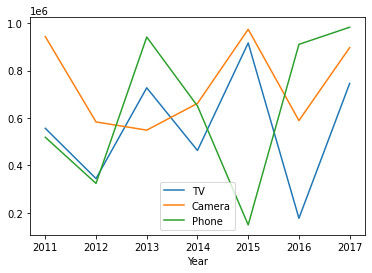

In [420]:
df_thb.applymap(repl).plot()

### version lambda

In [421]:
df_thb

,TV,Camera,Phone
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


In [422]:
df_thb.applymap(lambda s: int(re.sub('[^\d]', '',s)))

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


## Ex

In [423]:
dat=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df = dat.sample(10).reset_index(drop=True)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
1,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
2,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize
3,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
4,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup
5,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
6,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact
7,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
8,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
9,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv


In [424]:
df[['manufacturer','model', 'class']].applymap(str.capitalize) # *************************************************************************************

,manufacturer,model,class
0,Chevrolet,C1500 suburban 2wd,Suv
1,Chevrolet,Corvette,2seater
2,Nissan,Maxima,Midsize
3,Nissan,Altima,Midsize
4,Ford,F150 pickup 4wd,Pickup
5,Audi,A6 quattro,Midsize
6,Volkswagen,Jetta,Compact
7,Dodge,Caravan 2wd,Minivan
8,Hyundai,Tiburon,Subcompact
9,Ford,Explorer 4wd,Suv


In [425]:
df[['manufacturer','model', 'class']].applymap(lambda s:s.capitalize()) # ทำได้เหมือนข้างบนนั่นเเหละ ******************************************************************************************

,manufacturer,model,class
0,Chevrolet,C1500 suburban 2wd,Suv
1,Chevrolet,Corvette,2seater
2,Nissan,Maxima,Midsize
3,Nissan,Altima,Midsize
4,Ford,F150 pickup 4wd,Pickup
5,Audi,A6 quattro,Midsize
6,Volkswagen,Jetta,Compact
7,Dodge,Caravan 2wd,Minivan
8,Hyundai,Tiburon,Subcompact
9,Ford,Explorer 4wd,Suv


## test

In [426]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
1,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
2,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize
3,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
4,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup
5,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
6,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact
7,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
8,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
9,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv


In [427]:
df.manufacturer.map(lambda s:s.capitalize())
                # map จะทำได้เฉพาะ seise เเละ จะเข้าถึงทีละตัว **************************************************************************************

0     Chevrolet
1     Chevrolet
2        Nissan
3        Nissan
4          Ford
5          Audi
6    Volkswagen
7         Dodge
8       Hyundai
9          Ford
Name: manufacturer, dtype: object

In [428]:
df.manufacturer.str.capitalize()

0     Chevrolet
1     Chevrolet
2        Nissan
3        Nissan
4          Ford
5          Audi
6    Volkswagen
7         Dodge
8       Hyundai
9          Ford
Name: manufacturer, dtype: object

In [429]:
df[['manufacturer', 'model']].apply(lambda s:s.str.capitalize())
                            # apply การเข้าถึงจะเป็นเเบบ serise เเล้วจะต้องใช้คำสั่งของ serise เหมือนข้างบน ***********************************************************************************************
                            # ได้ทั้ง serise เเละ dataframe 

,manufacturer,model
0,Chevrolet,C1500 suburban 2wd
1,Chevrolet,Corvette
2,Nissan,Maxima
3,Nissan,Altima
4,Ford,F150 pickup 4wd
5,Audi,A6 quattro
6,Volkswagen,Jetta
7,Dodge,Caravan 2wd
8,Hyundai,Tiburon
9,Ford,Explorer 4wd


In [430]:
'hun'.capitalize()

'Hun'

In [431]:
df[['manufacturer', 'model']].applymap(lambda s:s.capitalize()) # เลยใช้ได้เลย เหมือนตัวอย่างข้างบน *****************************************************************************
                            # applymap คือ จะเข้าถึงเเต่ละตัวที่อยู่ใน df เเละจะให้ทำอะไรก็ได้ *************************************************************************************************
                            # applymap ใช้ได้เฉพาะ dataframe     การเข้าถึงจะเข้าถึงทีละตัว

,manufacturer,model
0,Chevrolet,C1500 suburban 2wd
1,Chevrolet,Corvette
2,Nissan,Maxima
3,Nissan,Altima
4,Ford,F150 pickup 4wd
5,Audi,A6 quattro
6,Volkswagen,Jetta
7,Dodge,Caravan 2wd
8,Hyundai,Tiburon
9,Ford,Explorer 4wd


# คลิป 84 การใช้ apply ใน pandas *********************************************************************************

In [432]:
import numpy as np

In [433]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/sales.tsv', index_col='Year')
df

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [434]:
df.apply(np.sum) # default axis = 'index'  เเล้วมันจะดึงข้อมูลออกมาเป็น serise จาก dataframe **************************************************************************************

TV        3929670
Camera    5197180
Phone     4476720
dtype: int64

In [435]:
df.apply(lambda s:s.sum()) # ทำเอง ได้เหมือนข้างบน

TV        3929670
Camera    5197180
Phone     4476720
dtype: int64

In [436]:
df.apply(np.sum, axis='columns')

Year
2011    2018520
2012    1251490
2013    2217460
2014    1774960
2015    2039520
2016    1676390
2017    2625230
dtype: int64

In [437]:
from scipy import stats

In [438]:
df.apply(stats.hmean) # บาง function ไม่ได้มากับ pandas เลยต้องใช้ apply

TV        428773.063662
Camera    703686.417471
Phone     425440.529110
dtype: float64

In [439]:
df.apply(stats.hmean, axis='columns')

Year
2011    626879.558570
2012    389274.318996
2013    704269.269335
2014    575902.233035
2015    339342.184959
2016    354979.850179
2017    863614.238880
dtype: float64

In [440]:
df.mean(axis='index') # ทวน

TV        561381.428571
Camera    742454.285714
Phone     639531.428571
dtype: float64

## Ex

In [441]:
dat=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df = dat.sample(5).reset_index(drop=True)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
1,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
2,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup
3,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
4,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact


In [442]:
df.manufacturer.str.upper()

0     CHEVROLET
1        TOYOTA
2          FORD
3    VOLKSWAGEN
4        TOYOTA
Name: manufacturer, dtype: object

In [443]:
df.manufacturer.apply(str.upper)

0     CHEVROLET
1        TOYOTA
2          FORD
3    VOLKSWAGEN
4        TOYOTA
Name: manufacturer, dtype: object

In [444]:
'hun'.upper()

'HUN'

In [445]:
df.manufacturer.map(lambda s:s.upper())

0     CHEVROLET
1        TOYOTA
2          FORD
3    VOLKSWAGEN
4        TOYOTA
Name: manufacturer, dtype: object

In [446]:
df.manufacturer.map(str.upper)

0     CHEVROLET
1        TOYOTA
2          FORD
3    VOLKSWAGEN
4        TOYOTA
Name: manufacturer, dtype: object

In [447]:
df[['manufacturer', 'model', 'class']].apply(lambda s:s.str.upper()) # มันจะโยน serise เข้าไปที่ lamda ทีละ serise

,manufacturer,model,class
0,CHEVROLET,C1500 SUBURBAN 2WD,SUV
1,TOYOTA,COROLLA,COMPACT
2,FORD,F150 PICKUP 4WD,PICKUP
3,VOLKSWAGEN,GTI,COMPACT
4,TOYOTA,CAMRY SOLARA,COMPACT


In [448]:
df.apply(lambda s: f'{s.manufacturer.capitalize()} + {s.model}', axis='columns') # ต้องกำหนด axis เพราะว่าจะลงทีละบรรทัดไง ***********************************************************************************
                                # หรือเราจะทำเเบบนี้ก็ได้

0    Chevrolet + c1500 suburban 2wd
1                  Toyota + corolla
2            Ford + f150 pickup 4wd
3                  Volkswagen + gti
4             Toyota + camry solara
dtype: object

In [449]:
0.425143

0.425143

In [450]:
df['kml']=df[['cty', 'hwy']].apply(lambda s:f'cty = {s.cty*0.425143:.2f}  / hwy = {s.hwy*0.425143:7.2f}', axis='columns') # ******************************************************************************************
                                                                                # ความกว้างของข้อความทั้งหมด 7 ตัว

                                                    # อย่าลืม print(f'{x:4,.2f}') 4 คือ 4ตัวอักษร   ,คือมี,ทุกๆหลักพัน  .2fคือทศนิยม2ตำเเหน่ง

df.iloc[:, -3:]

,fl,class,kml
0,r,suv,cty = 5.95 / hwy = 8.50
1,r,compact,cty = 11.90 / hwy = 15.73
2,r,pickup,cty = 5.53 / hwy = 6.80
3,p,compact,cty = 8.93 / hwy = 12.33
4,r,compact,cty = 9.35 / hwy = 13.18


In [451]:
df[['cty', 'hwy']] * 0.425143

,cty,hwy
0,5.952002,8.502860
1,11.904004,15.730291
2,5.526859,6.802288
3,8.928003,12.329147
4,9.353146,13.179433


In [452]:
# ก็ทำเล่นๆเฉยๆ
df.select_dtypes('number').drop(columns='year').apply(stats.hmean)

displ     2.661992
cyl       5.000000
cty      18.041454
hwy      24.240326
dtype: float64

In [453]:
df.select_dtypes('number').drop(columns='year')

,displ,cyl,cty,hwy
0,5.3,8,14,20
1,1.8,4,28,37
2,4.6,8,13,16
3,2.0,4,21,29
4,2.4,4,22,31


### ทวน

In [454]:
df.fl.map(lambda s:'R' if s=='r' else 'P')

0    R
1    R
2    R
3    P
4    R
Name: fl, dtype: object

In [455]:
df.fl.map(lambda s:re.sub('r','HUN', s))

0    HUN
1    HUN
2    HUN
3      p
4    HUN
Name: fl, dtype: object

# คลิป 85 การสุ่มแถวจากข้อมูลที่แบ่งออกเป็นกลุ่ม ๆ ***********************************************************************************

In [456]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [457]:
df.drv.sample(5) # ทำเล่น

185    f
168    4
178    4
191    f
198    4
Name: drv, dtype: object

In [458]:
df.sample(6)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
211,volkswagen,gti,2.8,1999,6,manual(m5),f,17,24,r,compact
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
168,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact
140,mercury,mountaineer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
166,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact


In [459]:
g = df.groupby('drv')
g.groups

{'4': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 28, 29, 30, 31, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 137, 138, 139, 140, 150, 151, 152, 153, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 198, 199, 200, 201, 202, 203, ...], 'f': [0, 1, 2, 3, 4, 5, 6, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 141, 142, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, ...], 'r': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 74, 75, 76, 90, 9

In [460]:
g.get_group('4')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
203,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup
205,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup


In [461]:
g.apply(lambda s:s.sample(frac=0.05)) # ******************************************************************************************************************

manufacturer                model  displ  year  cyl       trans drv  \
drv                                                                           
4   170       subaru          impreza awd    2.5  2008    4    auto(s4)   4   
    73         dodge  ram 1500 pickup 4wd    5.9  1999    8    auto(l4)   4   
    138      mercury      mountaineer 4wd    4.0  2008    6    auto(l5)   4   
    10          audi           a4 quattro    2.0  2008    4    auto(s6)   4   
    88          ford      f150 pickup 4wd    5.4  1999    8    auto(l4)   4   
f   115      hyundai              tiburon    2.0  1999    4    auto(l4)   f   
    47         dodge          caravan 2wd    4.0  2008    6    auto(l6)   f   
    155      pontiac           grand prix    3.8  1999    6    auto(l4)   f   
    3           audi                   a4    2.0  2008    4    auto(av)   f   
    37         dodge          caravan 2wd    2.4  1999    4    auto(l3)   f   
r   96          ford              mustang    4.6  2008    8  manual(m5)   r   

         cty  hwy fl       class  
drv                               
4   170   20   27  r     compact  
    73    11   15  r      pickup  
    138   13   19  r         suv  
    10    19   27  p     compact  
    88    11   15  r      pickup  
f   115   19   26  r  subcompact  
    47    16   23  r     minivan  
    155   16   26  p     midsize  
    3     21   30  p     compact  
    37    18   24  r     minivan  
r   96    15   23  r  subcompact

## วิธีบ้านๆ

In [462]:
df.drv.unique()

array(['f', '4', 'r'], dtype=object)

In [463]:
df[df.drv == 'f'].sample(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
39,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact


In [464]:
s = [df[df.drv.str.contains(k)].sample(2) for k in ['f', '4', 'r']]
s[0]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [465]:
s[1]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
150,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv


In [466]:
s[2]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [467]:
pd.concat(s)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
150,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


## ลองเล่นๆ

In [468]:
g.apply(lambda s:s.nlargest(2, 'cty'))

manufacturer        model  displ  year  cyl       trans drv  cty  hwy  \
drv                                                                             
4   165       subaru  impreza awd    2.2  1999    4    auto(l4)   4   21   26   
    9           audi   a4 quattro    2.0  2008    4  manual(m6)   4   20   28   
f   221   volkswagen   new beetle    1.9  1999    4  manual(m5)   f   35   44   
    212   volkswagen        jetta    1.9  1999    4  manual(m5)   f   33   44   
r   90          ford      mustang    3.8  1999    6  manual(m5)   r   18   26   
    91          ford      mustang    3.8  1999    6    auto(l4)   r   18   25   

        fl       class  
drv                     
4   165  r  subcompact  
    9    p     compact  
f   221  d  subcompact  
    212  d     compact  
r   90   r  subcompact  
    91   r  subcompact

# คลิป 86 การสุ่มแถวจากข้อมูลที่แบ่งออกเป็นกลุ่ม ๆ โดยระบุจำนวนที่ต้องการ

In [469]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [470]:
w = {'f':5, 'r':2, '4':3}

a = [df[df.drv == k].sample(v) for k ,v in w.items()] #****************************************************************************************
pd.concat(a)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact
190,toyota,camry solara,3.0,1999,6,auto(l4),f,18,26,r,compact
44,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
112,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
77,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
67,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


## วิธีที่ 2

In [471]:
df2 = df.set_index('drv')
df2

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
drv,,,,,,,,,,
f,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
f,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
f,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
f,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
f,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...
f,volkswagen,passat,2.0,2008,4,auto(s6),19,28,p,midsize
f,volkswagen,passat,2.0,2008,4,manual(m6),21,29,p,midsize
f,volkswagen,passat,2.8,1999,6,auto(l5),16,26,p,midsize


In [472]:
df2.loc['f'].sample(3)

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
drv,,,,,,,,,,
f,hyundai,tiburon,2.7,2008,6,manual(m5),17,24,r,subcompact
f,hyundai,tiburon,2.0,1999,4,manual(m5),19,29,r,subcompact
f,pontiac,grand prix,5.3,2008,8,auto(s4),16,25,p,midsize


In [473]:
w = {'f':5, 'r':2, '4':3}
a = [df2.loc[k].sample(v) for k, v in w.items()]
pd.concat(a)

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
drv,,,,,,,,,,
f,dodge,caravan 2wd,4.0,2008,6,auto(l6),16,23,r,minivan
f,dodge,caravan 2wd,3.3,2008,6,auto(l4),11,17,e,minivan
f,toyota,camry,3.0,1999,6,auto(l4),18,26,r,midsize
f,nissan,altima,2.5,2008,4,manual(m6),23,32,r,midsize
f,nissan,altima,3.5,2008,6,auto(av),19,26,p,midsize
r,ford,expedition 2wd,5.4,2008,8,auto(l6),12,18,r,suv
r,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),11,15,e,suv
4,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),14,19,r,pickup
4,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),15,17,r,pickup


# คลิป 87  การแบ่ง DataFrame ออกเป็น training และ test datasets (ตอนที่ 1) *******************************************************************************

In [474]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mtcars.csv'
# df = pd.read_csv(url, nrows=10)
df = pd.read_csv(url, nrows=10)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [475]:
df.shape

(10, 12)

In [476]:
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [477]:
np.random.randint(np.iinfo(np.int32).min, np.iinfo(np.int32).max, 10)
# np.random.randint(-2147483648, 2147483648)

array([-1795323274, -1972812192,  1591740974,  1814219065, -1300921357,
        -448613560,  -985534861,   577400968,   196508517,   535220025])

In [478]:
df['random'] = np.random.randint(np.iinfo(np.int32).min, np.iinfo(np.int32).max, df.shape[0]) # **********************************************************************************************
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,random
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,-1097072456
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-687390315
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1844566421
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-2064353907
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-717186370
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1793580862
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1888892342
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,-1745089390
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,-1669563229
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,96634790


In [479]:
df.sort_values(by='random', ascending=False, inplace=True)
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,random
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1888892342
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1793580862
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,96634790
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-687390315
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-717186370
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,-1097072456
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,-1669563229
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,-1745089390
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1844566421
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-2064353907


In [480]:
df_train = df.loc[:int(0.7*df.shape[0])] # **************************
df_train

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,random
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1888892342
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1793580862
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,96634790
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,-687390315
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-717186370
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,-1097072456
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,-1669563229
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,-1745089390


In [481]:
df_test = df.loc[int(0.7*df.shape[0]):]
df_test

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,random
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,-1745089390
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,-1844566421
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,-2064353907


# คลิป 88 การแบ่ง DataFrame ออกเป็น training และ test datasets (ตอนที่ 2)**************************************************************************************************

In [482]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/msleep.csv'
df = pd.read_csv(url, nrows=10, index_col='name')
df

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000


In [483]:
df_train = df.sample(frac=0.7)
df_train

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.0700,14.000
Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.480
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.4230,600.000
Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.0982,14.800
Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045


In [484]:
df_train.index

Index(['Mountain beaver', 'Dog', 'Northern fur seal', 'Owl monkey', 'Cow',
       'Roe deer', 'Vesper mouse'],
      dtype='object', name='name')

In [485]:
df.index.isin(df_train.index)

array([False,  True,  True, False,  True, False,  True,  True,  True,
        True])

In [486]:
df_test = df[~df.index.isin(df_train.index)]
df_test

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850


## def ได้

In [487]:
def train(s, train_default = 0.7):
    df_train1 = s.sample(frac=train_default)
    df_test1 = s[~s.index.isin(df_train1.index)]
    return [df_train1, df_test1]

In [488]:
df_train, df_test = train(df)

In [489]:
df_train


,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.85
Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.48
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.00
Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.0700,14.00
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.35
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.4230,600.00
Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.0982,14.80


In [490]:
df_test

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,,,,,,,,,,
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045


## multi index ก็ทำได้

In [491]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/msleep.csv'
df = pd.read_csv(url, nrows=10, index_col=['name', 'vore'])
df

,,genus,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,vore,,,,,,,,,
Cheetah,carni,Acinonyx,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
Owl monkey,omni,Aotus,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
Mountain beaver,herbi,Aplodontia,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
Greater short-tailed shrew,omni,Blarina,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
Cow,herbi,Bos,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
Three-toed sloth,herbi,Bradypus,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
Northern fur seal,carni,Callorhinus,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
Vesper mouse,NaN,Calomys,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
Dog,carni,Canis,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000


In [492]:
df_test, df_train = train(df, 0.5)

In [493]:
df_test

,,genus,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
name,vore,,,,,,,,,
Mountain beaver,herbi,Aplodontia,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
Cow,herbi,Bos,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.4230,600.000
Dog,carni,Canis,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.0700,14.000
Owl monkey,omni,Aotus,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.480
Vesper mouse,NaN,Calomys,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045


## เสริม ***************************************************

In [ ]:
df = pd.read_csv('weather.csv')

a = df.groupby('events').apply(lambda s: s.sample(2))
a

In [ ]:
a.index.get_level_values(1)

In [ ]:
test = df.iloc[a.index.get_level_values(1), :]
test

In [ ]:
trains = df[~df.index.isin(test.index)]
trains

In [ ]:
df['temp_high'].quantile(0.75)

# คลิป 89 กำหนดจำนวนแถวที่จะแสดงผลและรูปแบบการแสดงตัวเลข

In [494]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/nba_player_salary2017-2019.csv',
              index_col='Rk')
df

,Player,Tm,2017-18,2018-19
Rk,,,,
1,Stephen Curry,GSW,34682550.0,37457154.0
2,LeBron James,CLE,33285709.0,35607968.0
3,Paul Millsap,DEN,31269231.0,29730769.0
4,Gordon Hayward,BOS,29727900.0,31214295.0
5,Blake Griffin,DET,29512900.0,31873932.0
...,...,...,...,...
578,Axel Toupane,NOP,25000.0,NaN
579,Chris Johnson,HOU,25000.0,NaN
580,Beno Udrih,DET,25000.0,NaN


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 582
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   582 non-null    object 
 1   Tm       582 non-null    object 
 2   2017-18  582 non-null    float64
 3   2018-19  345 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.7+ KB


In [496]:
pd.set_option('display.float_format', '${:,.2f}'.format)
pd.set_option('display.max_rows', 10)

In [497]:
df

,Player,Tm,2017-18,2018-19
Rk,,,,
1,Stephen Curry,GSW,"$34,682,550.00","$37,457,154.00"
2,LeBron James,CLE,"$33,285,709.00","$35,607,968.00"
3,Paul Millsap,DEN,"$31,269,231.00","$29,730,769.00"
4,Gordon Hayward,BOS,"$29,727,900.00","$31,214,295.00"
5,Blake Griffin,DET,"$29,512,900.00","$31,873,932.00"
...,...,...,...,...
578,Axel Toupane,NOP,"$25,000.00",NaN
579,Chris Johnson,HOU,"$25,000.00",NaN
580,Beno Udrih,DET,"$25,000.00",NaN


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 582
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   582 non-null    object 
 1   Tm       582 non-null    object 
 2   2017-18  582 non-null    float64
 3   2018-19  345 non-null    float64
dtypes: float64(2), object(2)
memory usage: 22.7+ KB


In [499]:
df1 = df[['2017-18', '2018-19']].astype('object')
df1

,2017-18,2018-19
Rk,,
1,"$34,682,550.00","$37,457,154.00"
2,"$33,285,709.00","$35,607,968.00"
3,"$31,269,231.00","$29,730,769.00"
4,"$29,727,900.00","$31,214,295.00"
5,"$29,512,900.00","$31,873,932.00"
...,...,...
578,"$25,000.00",NaN
579,"$25,000.00",NaN
580,"$25,000.00",NaN


In [500]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 582
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   2017-18  582 non-null    object
 1   2018-19  345 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


In [501]:
pd.reset_option('display.float_format')
pd.reset_option('display.max_rows')

In [502]:
df

,Player,Tm,2017-18,2018-19
Rk,,,,
1,Stephen Curry,GSW,34682550.0,37457154.0
2,LeBron James,CLE,33285709.0,35607968.0
3,Paul Millsap,DEN,31269231.0,29730769.0
4,Gordon Hayward,BOS,29727900.0,31214295.0
5,Blake Griffin,DET,29512900.0,31873932.0
...,...,...,...,...
578,Axel Toupane,NOP,25000.0,NaN
579,Chris Johnson,HOU,25000.0,NaN
580,Beno Udrih,DET,25000.0,NaN


# คลิป 90 การปรับแต่ง style ในการแสดงข้อมูล DataFrame เบื้องต้น *******************************************************************************

In [503]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df[0:1]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.0


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10 non-null     object 
 1   genus         10 non-null     object 
 2   vore          9 non-null      object 
 3   order         10 non-null     object 
 4   conservation  7 non-null      object 
 5   sleep_total   10 non-null     float64
 6   sleep_rem     7 non-null      float64
 7   sleep_cycle   5 non-null      float64
 8   awake         10 non-null     float64
 9   brainwt       5 non-null      float64
 10  bodywt        10 non-null     float64
dtypes: float64(6), object(5)
memory usage: 1008.0+ bytes


In [505]:
df.style.highlight_null(color='red') # ต้องลงด้วย pip3 install jinja2 ***************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [506]:
df.style.highlight_max(color='red', subset=['sleep_total', 'sleep_rem', 'sleep_cycle'], axis='index') # ได้เฉพาะ column ที่เป็นตัวเลขเท่านั้น มันจะไม่ข้าม column ที่เป็น str ให้ *******************************************************************************************
                                 # ถ้าเป็น max, min ต้องกำหนด subset ที่่ columns เป็น number เท่านั้น ************************************************************************************* **************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [507]:
df.style.highlight_min(color='red', subset=['sleep_total', 'sleep_rem', 'sleep_cycle']).highlight_max(color='green', subset=['sleep_total', 'sleep_rem', 'sleep_cycle']) # ************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [508]:
df.style.highlight_min(color='red', subset=['sleep_total', 'sleep_rem', 'sleep_cycle']).highlight_max(color='green', subset=['sleep_total', 'sleep_rem', 'sleep_cycle']).highlight_null(color='gold', subset=['sleep_total', 'sleep_rem', 'sleep_cycle']) # **********************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [509]:
df.style.bar() # *******************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


## test เอง

In [510]:
df.select_dtypes('number').columns

Index(['sleep_total', 'sleep_rem', 'sleep_cycle', 'awake', 'brainwt',
       'bodywt'],
      dtype='object')

In [511]:
# df.style.highlight_max() ถ้าทำเเบบนี้จะ error  '>=' not supported between instances of 'str' and 'float'

In [512]:
df.style.highlight_max(subset=df.select_dtypes('number').columns) # ถ้าเป็น max, min ต้องกำหนด subset ที่่ columns เป็น number เท่านั้น *************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


# คลิป 91 การปรับแต่ง style ในการแสดงข้อมูล DataFrame ด้วย custom function 

In [513]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df.head(1)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.0


## font

In [514]:
def hilite_font(x):
    color = 'red' if x>=10 else 'green'
    return f'color: {color}'
            # พวกนี้ต้องเขียนให้ถูก ของหลักการใช้ style************************************************************************************************

In [515]:
hilite_font(10)

'color: red'

In [516]:
df[['sleep_total', 'sleep_rem']].style.applymap(hilite_font) # ***************************************************************************************
                                        
                                        # ต้อง return ให้ถูกด้วยตอน def อ่ะ

,sleep_total,sleep_rem
0,12.100000,nan
1,17.000000,1.800000
2,14.400000,2.400000
3,14.900000,2.300000
4,4.000000,0.700000
5,14.400000,2.200000
6,8.700000,1.400000
7,7.000000,nan
8,10.100000,2.900000
9,3.000000,nan


In [517]:
df.style.applymap(hilite_font, subset=['sleep_total', 'sleep_rem']) # ********************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


## background 

In [518]:
def hilite_bg(x): # **********************************************************************************************
    return 'background-color: yellow' if x>=10 else 'background-color: green'

In [519]:
df.style.applymap(hilite_bg, subset=['sleep_total']) # **********************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [520]:
df.style.applymap(lambda s: 'background-color: yellow' if s>=10 else 'background-color: green', subset=['sleep_total']) # vertion lambda *************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


## โหดละ

In [521]:
def hilite(e, v): # *********************************************************************************************************************************
    if e > v:
        style='font-size: 130%;background-color:yellow'
    else:
        style=''
    return style

In [522]:
hilite(10, 8)

'font-size: 130%;background-color:yellow'

In [523]:
df.style.applymap(hilite, v=10, subset=['sleep_total']) # ************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [524]:
df.style.applymap(lambda s: 'font-size:130%;background-color:yellow' if s>10 else '', subset=['sleep_total']) # ******************************************************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [525]:
df.style.applymap(lambda s:'font-size : 130% ; background-color : yellow' if s=='herbi' else '', subset='vore') # *****************************************************************************************
                            # พวกนี้ต้องเขียนให้ถูก ตอน return เเละการพิมพ์ รหัสโค้ด

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [526]:
df.style.applymap(lambda s: 'font-size:130%;background-color:yellow' if s>10 else '', subset=['sleep_total']).applymap(lambda s:'font-size : 130% ; background-color : yellow' if s=='herbi' else '', subset='vore') # ต่อไปได้เลลื่อยๆอ่ะ ***********************************************************

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


# คลิป 92 การแสดงรูปและ hyperlinkใน pandas DataFrame

In [527]:
from IPython.display import HTML

In [528]:
# j_url = 'https://rss.itunes.apple.com/api/v1/th/apple-music/hot-tracks/all/5/explicit.json'
# data = pd.read_json(j_url)
# data

# คลิป 93 การอ่านและแปลงข้อมูลจาก Google Form เช่น แปลงข้อความ "พอใจมาก" ให้เป็นเลข 4

In [529]:
# google form url: https://goo.gl/forms/mahcMnQxzc2vZhoz2

# google sheets generated by google form
# https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/edit#gid=22521621
# note: replace 'edit#' with 'export?format=xlsx&'

url='https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/export?format=xlsx&gid=22521621'
df = pd.read_excel(url)
df.head(5)

,Timestamp,gender,age (years),satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,Prefer not to say,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,Female,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,Female,44.0,dissatisfied,neutral,dissatisfied,neutral


In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               91 non-null     datetime64[ns]
 1   gender                  89 non-null     object        
 2   age (years)             68 non-null     float64       
 3   satisfaction [product]  87 non-null     object        
 4   satisfaction [price]    89 non-null     object        
 5   satisfaction [service]  88 non-null     object        
 6   satisfaction [overall]  89 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.1+ KB


In [531]:
df.columns

Index(['Timestamp', 'gender', 'age (years)', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]'],
      dtype='object')

In [532]:
df.columns = ['Timestamp', 'gender', 'age', 'product', 'price', 'service','overall']

In [533]:
df.head(2)

,Timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied


In [534]:
df.gender = df.gender.map({'Male':'M', 'Female':'F', 'Prefer not to say':'X'}, na_action='ignore') # *************************************************************************************
df.head(10)

,Timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,M,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,F,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,X,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,F,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,F,44.0,dissatisfied,neutral,dissatisfied,neutral
5,2018-11-04 18:03:14.928,X,77.0,dissatisfied,neutral,satisfied,very satisfied
6,2018-11-04 18:05:08.912,M,88.0,very dissatisfied,very dissatisfied,dissatisfied,neutral
7,2018-11-04 18:06:52.787,F,88.0,satisfied,neutral,neutral,satisfied
8,2018-11-04 18:09:28.268,X,100.0,dissatisfied,neutral,satisfied,very satisfied
9,2018-11-04 18:33:17.646,NaN,15.0,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied


In [535]:
def label2val(s):
    d = {'very dissatisfied': 1,
         'dissatisfied': 2,
         'neutral': 3,
         'satisfied': 4,
         'very satisfied': 5}
    if s in d.keys():
        v = d[s]
    else:
        v = np.nan
    return v

In [536]:
label2val('satisfied')

4

In [537]:
label2val('satisfieda')

nan

In [538]:
# df[['product', 'price', 'service', 'overall']].applymap(label2val)
df.loc[:, 'product':'overall'] = df.loc[:, 'product':'overall'].applymap(label2val)
df                                                              # applymap ใช้กับ dictionary ไม่ได้ ************************************************

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2997640313.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'product':'overall'] = df.loc[:, 'product':'overall'].applymap(label2val)


,Timestamp,gender,age,product,price,service,overall
0,2018-11-04 15:19:30.871,M,40.0,1.0,2.0,3.0,4.0
1,2018-11-04 15:19:46.073,F,NaN,3.0,2.0,4.0,5.0
2,2018-11-04 15:20:00.145,X,NaN,5.0,4.0,4.0,5.0
3,2018-11-04 15:42:03.025,F,25.0,1.0,2.0,3.0,4.0
4,2018-11-04 15:43:23.132,F,44.0,2.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...
86,2021-03-05 23:20:53.335,M,21.0,2.0,1.0,3.0,3.0
87,2021-09-12 21:47:27.340,F,31.0,3.0,1.0,1.0,1.0
88,2021-09-12 23:40:02.533,M,100.0,1.0,1.0,1.0,1.0
89,2021-10-15 23:05:59.658,F,38.0,4.0,5.0,3.0,4.0


## read all sheets

In [539]:
url='https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/export?format=xlsx'
dfs = pd.read_excel(url, sheet_name=None)

In [540]:
len(dfs)

4

In [541]:
dfs.keys()

dict_keys(['resp', 'resp_mod', 'lookup', 'var_label'])

In [542]:
dfs['resp'].head(2)

,Timestamp,gender,age (years),satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied


# คลิป 94 การดึงราคาหุ้นในตลาดหุ้นไทยและต่างประเทศด้วย pandas (get daily stock price)

In [543]:
from pandas_datareader import data

In [544]:
# df = data.DataReader('msft', data_source="yahoo", start='2018-01-01', end='2018-03-31')
# df.head()

In [545]:
# df = data.DataReader('scc.bk', data_source="yahoo", start='2018-01-01')
# df.head()

In [546]:
# ds=df.stack()
# ds

In [547]:
# ds=df.stack().reset_index()
# ds[ds.Symbols=='fb']

In [548]:
# df.unstack()

In [549]:
# df.unstack().to_frame()

# คลิป 95 เข้าใจการทำงานของ multilevel column names เช่น ข้อมูลราคาหุ้นรายวัน

In [561]:
from pandas_datareader import data
from datetime import datetime

In [550]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
dat=pd.read_csv(url)
dat.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [555]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
# stocks=['scc.bk', 'bh.bk']
# df = data.DataReader(stocks, data_source="yahoo",
#                      start="2019-01-02")
# df.head()

In [568]:
# stocks=['scc.bk', 'bh.bk']
# df = data.DataReader(stocks, data_source='yahoo', start="2019-01-02")

In [573]:
df = dat.pivot_table(index='class', columns='drv')

C:\Users\Acer\AppData\Local\Temp\ipykernel_28472\2070241505.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df = dat.pivot_table(index='class', columns='drv')


In [574]:
df.columns

MultiIndex([(  'cty', '4'),
            (  'cty', 'f'),
            (  'cty', 'r'),
            (  'cyl', '4'),
            (  'cyl', 'f'),
            (  'cyl', 'r'),
            ('displ', '4'),
            ('displ', 'f'),
            ('displ', 'r'),
            (  'hwy', '4'),
            (  'hwy', 'f'),
            (  'hwy', 'r'),
            ( 'year', '4'),
            ( 'year', 'f'),
            ( 'year', 'r')],
           names=[None, 'drv'])

In [581]:
df

cty                             cyl                      \
drv                 4          f          r         4         f         r   
class                                                                       
2seater           NaN        NaN  15.400000       NaN       NaN  8.000000   
compact     18.000000  20.857143        NaN  4.666667  4.571429       NaN   
midsize     16.000000  18.973684        NaN  6.666667  5.210526       NaN   
minivan           NaN  15.818182        NaN       NaN  5.818182       NaN   
pickup      13.000000        NaN        NaN  7.030303       NaN       NaN   
subcompact  19.500000  22.363636  15.888889  4.000000  4.363636  7.111111   
suv         13.823529        NaN  12.000000  6.745098       NaN  8.000000   

               displ                            hwy                        \
drv                4         f         r          4          f          r   
class                                                                       
2seater          NaN       NaN  6.160000        NaN        NaN  24.800000   
compact     2.450000  2.282857       NaN  25.833333  29.142857        NaN   
midsize     3.366667  2.886842       NaN  24.000000  27.552632        NaN   
minivan          NaN  3.390909       NaN        NaN  22.363636        NaN   
pickup      4.418182       NaN       NaN  16.878788        NaN        NaN   
subcompact  2.350000  2.013636  4.377778  26.000000  30.545455  23.222222   
suv         4.256863       NaN  5.381818  18.274510        NaN  17.454545   

                   year                            
drv                   4            f            r  
class                                              
2seater             NaN          NaN  2004.400000  
compact     2005.000000  2002.600000          NaN  
midsize     2005.000000  2003.500000          NaN  
minivan             NaN  2003.090909          NaN  
pickup      2003.636364          NaN          NaN  
subcompact  1999.000000  2003.500000  2004.000000  
suv         2003.764706          NaN  2003.909091

In [576]:
df['cty']

drv,4,f,r
class,,,
2seater,NaN,NaN,15.400000
compact,18.000000,20.857143,NaN
midsize,16.000000,18.973684,NaN
minivan,NaN,15.818182,NaN
pickup,13.000000,NaN,NaN
subcompact,19.500000,22.363636,15.888889
suv,13.823529,NaN,12.000000


In [580]:
df['cty']['4']

class
2seater             NaN
compact       18.000000
midsize       16.000000
minivan             NaN
pickup        13.000000
subcompact    19.500000
suv           13.823529
Name: 4, dtype: float64

In [583]:
df.loc['minivan':,'cty']

drv,4,f,r
class,,,
minivan,NaN,15.818182,NaN
pickup,13.000000,NaN,NaN
subcompact,19.500000,22.363636,15.888889
suv,13.823529,NaN,12.000000


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2seater to suv
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (cty, 4)    5 non-null      float64
 1   (cty, f)    4 non-null      float64
 2   (cty, r)    3 non-null      float64
 3   (cyl, 4)    5 non-null      float64
 4   (cyl, f)    4 non-null      float64
 5   (cyl, r)    3 non-null      float64
 6   (displ, 4)  5 non-null      float64
 7   (displ, f)  4 non-null      float64
 8   (displ, r)  3 non-null      float64
 9   (hwy, 4)    5 non-null      float64
 10  (hwy, f)    4 non-null      float64
 11  (hwy, r)    3 non-null      float64
 12  (year, 4)   5 non-null      float64
 13  (year, f)   4 non-null      float64
 14  (year, r)   3 non-null      float64
dtypes: float64(15)
memory usage: 1.2+ KB


In [584]:
df.loc['minivan':, ('cty','f')] # ตามที่เช็คกับ info เลย 

class
minivan       15.818182
pickup              NaN
subcompact    22.363636
suv                 NaN
Name: (cty, f), dtype: float64

In [586]:
df.loc['minivan':, ('cty',['r','f'])] # *************************************************************************************

cty           
drv                 r          f
class                           
minivan           NaN  15.818182
pickup            NaN        NaN
subcompact  15.888889  22.363636
suv         12.000000        NaN

In [588]:
df.to_csv('multilevel column names.csv') # จะไม่ได้มีการ merge columns ให้ *****************************************************************************************
df.to_excel('multilevel column names.xlsx') # มันจะ merge columns ให้อัตโนมัติ

## stack

In [591]:
df

cty                             cyl                      \
drv                 4          f          r         4         f         r   
class                                                                       
2seater           NaN        NaN  15.400000       NaN       NaN  8.000000   
compact     18.000000  20.857143        NaN  4.666667  4.571429       NaN   
midsize     16.000000  18.973684        NaN  6.666667  5.210526       NaN   
minivan           NaN  15.818182        NaN       NaN  5.818182       NaN   
pickup      13.000000        NaN        NaN  7.030303       NaN       NaN   
subcompact  19.500000  22.363636  15.888889  4.000000  4.363636  7.111111   
suv         13.823529        NaN  12.000000  6.745098       NaN  8.000000   

               displ                            hwy                        \
drv                4         f         r          4          f          r   
class                                                                       
2seater          NaN       NaN  6.160000        NaN        NaN  24.800000   
compact     2.450000  2.282857       NaN  25.833333  29.142857        NaN   
midsize     3.366667  2.886842       NaN  24.000000  27.552632        NaN   
minivan          NaN  3.390909       NaN        NaN  22.363636        NaN   
pickup      4.418182       NaN       NaN  16.878788        NaN        NaN   
subcompact  2.350000  2.013636  4.377778  26.000000  30.545455  23.222222   
suv         4.256863       NaN  5.381818  18.274510        NaN  17.454545   

                   year                            
drv                   4            f            r  
class                                              
2seater             NaN          NaN  2004.400000  
compact     2005.000000  2002.600000          NaN  
midsize     2005.000000  2003.500000          NaN  
minivan             NaN  2003.090909          NaN  
pickup      2003.636364          NaN          NaN  
subcompact  1999.000000  2003.500000  2004.000000  
suv         2003.764706          NaN  2003.909091

In [590]:
df.stack() # จะกลายเป้น multi index เเทน*************************************************************************************************

cty       cyl     displ        hwy         year
class      drv                                                       
2seater    r    15.400000  8.000000  6.160000  24.800000  2004.400000
compact    4    18.000000  4.666667  2.450000  25.833333  2005.000000
           f    20.857143  4.571429  2.282857  29.142857  2002.600000
midsize    4    16.000000  6.666667  3.366667  24.000000  2005.000000
           f    18.973684  5.210526  2.886842  27.552632  2003.500000
minivan    f    15.818182  5.818182  3.390909  22.363636  2003.090909
pickup     4    13.000000  7.030303  4.418182  16.878788  2003.636364
subcompact 4    19.500000  4.000000  2.350000  26.000000  1999.000000
           f    22.363636  4.363636  2.013636  30.545455  2003.500000
           r    15.888889  7.111111  4.377778  23.222222  2004.000000
suv        4    13.823529  6.745098  4.256863  18.274510  2003.764706
           r    12.000000  8.000000  5.381818  17.454545  2003.909091

In [592]:
df.stack().reset_index()

,class,drv,cty,cyl,displ,hwy,year
0,2seater,r,15.400000,8.000000,6.160000,24.800000,2004.400000
1,compact,4,18.000000,4.666667,2.450000,25.833333,2005.000000
2,compact,f,20.857143,4.571429,2.282857,29.142857,2002.600000
3,midsize,4,16.000000,6.666667,3.366667,24.000000,2005.000000
4,midsize,f,18.973684,5.210526,2.886842,27.552632,2003.500000
5,minivan,f,15.818182,5.818182,3.390909,22.363636,2003.090909
6,pickup,4,13.000000,7.030303,4.418182,16.878788,2003.636364
7,subcompact,4,19.500000,4.000000,2.350000,26.000000,1999.000000
8,subcompact,f,22.363636,4.363636,2.013636,30.545455,2003.500000
9,subcompact,r,15.888889,7.111111,4.377778,23.222222,2004.000000


In [593]:
ds = df.stack().reset_index()
ds

,class,drv,cty,cyl,displ,hwy,year
0,2seater,r,15.400000,8.000000,6.160000,24.800000,2004.400000
1,compact,4,18.000000,4.666667,2.450000,25.833333,2005.000000
2,compact,f,20.857143,4.571429,2.282857,29.142857,2002.600000
3,midsize,4,16.000000,6.666667,3.366667,24.000000,2005.000000
4,midsize,f,18.973684,5.210526,2.886842,27.552632,2003.500000
5,minivan,f,15.818182,5.818182,3.390909,22.363636,2003.090909
6,pickup,4,13.000000,7.030303,4.418182,16.878788,2003.636364
7,subcompact,4,19.500000,4.000000,2.350000,26.000000,1999.000000
8,subcompact,f,22.363636,4.363636,2.013636,30.545455,2003.500000
9,subcompact,r,15.888889,7.111111,4.377778,23.222222,2004.000000


In [594]:
ds.sort_values('drv')

,class,drv,cty,cyl,displ,hwy,year
1,compact,4,18.000000,4.666667,2.450000,25.833333,2005.000000
3,midsize,4,16.000000,6.666667,3.366667,24.000000,2005.000000
6,pickup,4,13.000000,7.030303,4.418182,16.878788,2003.636364
7,subcompact,4,19.500000,4.000000,2.350000,26.000000,1999.000000
10,suv,4,13.823529,6.745098,4.256863,18.274510,2003.764706
2,compact,f,20.857143,4.571429,2.282857,29.142857,2002.600000
4,midsize,f,18.973684,5.210526,2.886842,27.552632,2003.500000
5,minivan,f,15.818182,5.818182,3.390909,22.363636,2003.090909
8,subcompact,f,22.363636,4.363636,2.013636,30.545455,2003.500000
0,2seater,r,15.400000,8.000000,6.160000,24.800000,2004.400000


In [595]:
ds[ds.drv == '4']

,class,drv,cty,cyl,displ,hwy,year
1,compact,4,18.000000,4.666667,2.450000,25.833333,2005.000000
3,midsize,4,16.000000,6.666667,3.366667,24.000000,2005.000000
6,pickup,4,13.000000,7.030303,4.418182,16.878788,2003.636364
7,subcompact,4,19.500000,4.000000,2.350000,26.000000,1999.000000
10,suv,4,13.823529,6.745098,4.256863,18.274510,2003.764706


<AxesSubplot: >

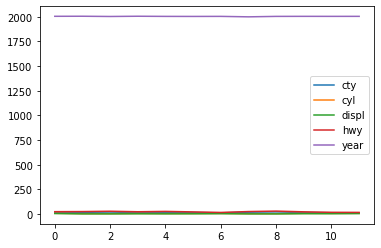

In [596]:
ds.plot()

In [597]:
ds.to_csv('multilevel column names 2.csv', index= False) # index= False จะไม่บันทึก index *****************************************************************************************
ds.to_excel('multilevel column names 2.xlsx', index= False)

# คลิป 96 การเข้าถึงแต่ละแถวใน DataFrame (iterate rows in dataframe)

In [598]:
dat=pd.read_json('https://github.com/prasertcbs/basic-dataset/raw/master/pokemon/pokemon_by_columns.json', 
                orient='columns')
dat.sort_index().head()

,name,type,abilities,weakness,height,weight,detailPageURL,ThumbnailImage
1,Bulbasaur,"[grass, poison]",[Overgrow],"[Fire, Flying, Ice, Psychic]",28,15.2,/us/pokedex/bulbasaur,https://assets.pokemon.com/assets/cms2/img/pok...
2,Ivysaur,"[grass, poison]",[Overgrow],"[Fire, Flying, Ice, Psychic]",39,28.7,/us/pokedex/ivysaur,https://assets.pokemon.com/assets/cms2/img/pok...
3,Venusaur,"[grass, poison]",[Thick Fat],"[Fire, Psychic, Flying, Ice]",94,342.8,/us/pokedex/venusaur,https://assets.pokemon.com/assets/cms2/img/pok...
4,Charmander,[fire],[Blaze],"[Ground, Rock, Water]",24,18.7,/us/pokedex/charmander,https://assets.pokemon.com/assets/cms2/img/pok...
5,Charmeleon,[fire],[Blaze],"[Ground, Rock, Water]",43,41.9,/us/pokedex/charmeleon,https://assets.pokemon.com/assets/cms2/img/pok...


In [605]:
df = dat.sample(5, random_state=111) # random_state=111 เหมือนถ้าเป็นเลขชุดนี้ก็จะได้เเบบนี้ตลอด *************************************************************************
df

,name,type,abilities,weakness,height,weight,detailPageURL,ThumbnailImage
184,Azumarill,"[water, fairy]","[Huge Power, Thick Fat]","[Electric, Grass, Poison]",31,62.8,/us/pokedex/azumarill,https://assets.pokemon.com/assets/cms2/img/pok...
493,Arceus,[fairy],[Multitype],"[Steel, Poison]",126,705.5,/us/pokedex/arceus,https://assets.pokemon.com/assets/cms2/img/pok...
749,Mudbray,[ground],"[Own Tempo, Stamina]","[Water, Grass, Ice]",39,242.5,/us/pokedex/mudbray,https://assets.pokemon.com/assets/cms2/img/pok...
745,Lycanroc,[rock],"[Keen Eye, Vital Spirit]","[Water, Steel, Grass, Fighting, Ground]",43,55.1,/us/pokedex/lycanroc,https://assets.pokemon.com/assets/cms2/img/pok...
626,Bouffalant,[normal],"[Reckless, Sap Sipper]",[Fighting],63,208.6,/us/pokedex/bouffalant,https://assets.pokemon.com/assets/cms2/img/pok...


In [604]:

import requests
from PIL import Image
import io


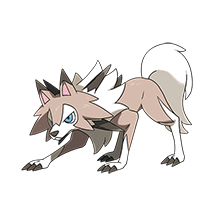

In [607]:
read_ = requests.get(df.ThumbnailImage[745]) # ThumbnailImage column ที่เก็บ url ของรูปภาพ   inddex 77    requests.get เอาค่าข้างใน  ***************************************************************************************************************
img = Image.open(io.BytesIO(read_.content)) # คำสั่งเปิดรูป
img

In [609]:
for i, row in df.iterrows(): # i เก็บค่า index // row เก็บทุก columns ที่อยู่ใน index นั้น เเละเก็บ serise *****************************************************************************************
    print(f'index = {i}, row = {row}')

index = 184, row = name                                                      Azumarill
type                                                 [water, fairy]
abilities                                   [Huge Power, Thick Fat]
weakness                                  [Electric, Grass, Poison]
height                                                           31
weight                                                         62.8
detailPageURL                                 /us/pokedex/azumarill
ThumbnailImage    https://assets.pokemon.com/assets/cms2/img/pok...
Name: 184, dtype: object
index = 493, row = name                                                         Arceus
type                                                        [fairy]
abilities                                               [Multitype]
weakness                                            [Steel, Poison]
height                                                          126
weight                                               

In [614]:
for i, row in df.iterrows():
    print(f"index = {i}, name= {row['name']}, {row['ThumbnailImage']}")

index = 184, name= Azumarill, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/184.png
index = 493, name= Arceus, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/493.png
index = 749, name= Mudbray, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/749.png
index = 745, name= Lycanroc, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/745.png
index = 626, name= Bouffalant, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/626.png


In [619]:
for i, row in df.iterrows():
    print(f"index = {i}, name= {row['name']}, {row['ThumbnailImage']}")
    r = requests.get(row['ThumbnailImage'])
    img = Image.open(io.BytesIO(r.content))
    # img.show()
    img.save(f"{row['name']}.png") # save รูป

index = 184, name= Azumarill, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/184.png
index = 493, name= Arceus, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/493.png
index = 749, name= Mudbray, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/749.png
index = 745, name= Lycanroc, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/745.png
index = 626, name= Bouffalant, https://assets.pokemon.com/assets/cms2/img/pokedex/detail/626.png


# คลิป 97 การใช้ GET requests ในการดึงข้อมูล text file (CSV, JSON) และรูปภาพจาก web URL

In [620]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/Impossible%20Dream.txt'
r=requests.get(url)
r.text

'ความฝันอันสูงสุด (Impossible Dream)\nขอฝันใฝ่ในฝันอันเหลือเชื่อ\nขอสู่ศึกทุกเมื่อไม่หวั่นไหว\nขอทนทุกข์รุกโรมโหมกายใจ\nขอฝ่าฟันผองภัยด้วยใจทะนง\nจะแน่วแน่แก้ไขในสิ่งผิด\nจะรักชาติจนชีวิตเป็นผุยผง\nจะยอมตายหมายให้เกียรติดำรง\nจะปิดทองหลังองค์พระปฏิมา\nไม่ท้อถอยคอยสร้างสิ่งที่ควร\nไม่เรรวนพะว้าพะวังคิดกังขา\nไม่เคืองแค้นน้อยใจในโชคชะตา\nไม่เสียหายชีวาถ้าสิ้นไป\nนี่คือปณิธานที่หาญมุ่ง\nหมายผดุงยุติธรรม์อันสดใส\nถึงทนทุกข์ทรมานนานเท่าใด\nยังมั่นใจรักชาติองอาจครัน\nโลกมนุษย์ย่อมจะดีกว่านี้แน่\nเพราะมีผู้ไม่ยอมแพ้แม้ถูกหยัน\nคงยืนหยัดสู้ไปใฝ่ประจัญ\nยอมอาสัญก็เพราะปองเทิดผองไทย\n'

In [621]:
print(r.text)

ความฝันอันสูงสุด (Impossible Dream)
ขอฝันใฝ่ในฝันอันเหลือเชื่อ
ขอสู่ศึกทุกเมื่อไม่หวั่นไหว
ขอทนทุกข์รุกโรมโหมกายใจ
ขอฝ่าฟันผองภัยด้วยใจทะนง
จะแน่วแน่แก้ไขในสิ่งผิด
จะรักชาติจนชีวิตเป็นผุยผง
จะยอมตายหมายให้เกียรติดำรง
จะปิดทองหลังองค์พระปฏิมา
ไม่ท้อถอยคอยสร้างสิ่งที่ควร
ไม่เรรวนพะว้าพะวังคิดกังขา
ไม่เคืองแค้นน้อยใจในโชคชะตา
ไม่เสียหายชีวาถ้าสิ้นไป
นี่คือปณิธานที่หาญมุ่ง
หมายผดุงยุติธรรม์อันสดใส
ถึงทนทุกข์ทรมานนานเท่าใด
ยังมั่นใจรักชาติองอาจครัน
โลกมนุษย์ย่อมจะดีกว่านี้แน่
เพราะมีผู้ไม่ยอมแพ้แม้ถูกหยัน
คงยืนหยัดสู้ไปใฝ่ประจัญ
ยอมอาสัญก็เพราะปองเทิดผองไทย



In [623]:
print(r.url)
print(r.status_code)
print(r.ok) # ถ้า output ออกมา True เเสดงว่าหาเจอ ถ้า False เเสดงว่า url ใช้ไม่ได้
print(r.encoding)

https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Impossible%20Dream.txt
200
True
utf-8


In [624]:
url='https://spotifycharts.com/regional/global/daily/latest/download'
r=requests.get(url)
r.text[:200]

'<!DOCTYPE html><html lang="en" class="no-touchevents"><head><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/spotifycharts.svg"/><link rel='

In [625]:
print(r.text)

<!DOCTYPE html><html lang="en" class="no-touchevents"><head><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/spotifycharts.svg"/><link rel="preload" as="font" crossorigin="crossorigin" type="font/woff2" href="https://encore.scdn.co/1.2.3/CircularSpotify-UI-Latin-OS2v3-Book.woff2"/><link rel="preload" as="font" crossorigin="crossorigin" type="font/woff2" href="https://encore.scdn.co/1.2.3/CircularSpotify-UI-Latin-OS2v3-Bold.woff2"/><link rel="preload" as="font" crossorigin="crossorigin" type="font/woff2" href="https://encore.scdn.co/1.2.3/CircularSpotify-UI-Latin-OS2v3-Black.woff2"/><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"/><title>Spotify Charts - Spotify Charts are made by fans</title><meta name="description" content="The new home for Spotify Charts. Dive into artist, genre, city and local pulse charts to see what music is moving fans around the world."/><met

In [628]:
# url='https://spotifycharts.com/regional/global/daily/latest/download'
# df=pd.read_csv(url, skiprows=1)
# df

In [629]:
# dat=pd.read_csv(io.StringIO(r.text), skiprows=1)
# dat.head()

## read json

In [631]:
# url='https://rss.itunes.apple.com/api/v1/th/apple-music/top-songs/all/10/non-explicit.json'
# r=requests.get(url)
# j=r.json()
# j

In [633]:
# j['feed']['results']

In [634]:
# df=pd.DataFrame(j['feed']['results'])
# df

## get byte

In [635]:
url='https://assets.pokemon.com/assets/cms2/img/pokedex/full/025.png'
r=requests.get(url)

In [636]:
r.headers

{'Content-Type': 'image/png', 'Content-Length': '118057', 'Connection': 'keep-alive', 'x-amz-id-2': 'bIyo6Veg6AChqNQIgG8n4vyT1DQqlgwkymdpluraSBViiurwQtkQ7d5PY9IocLnj2l+knY+ONNU=', 'x-amz-request-id': 'BZT3RT5ZK36B3E52', 'Last-Modified': 'Mon, 13 Nov 2017 21:39:43 GMT', 'Accept-Ranges': 'bytes', 'Server': 'AmazonS3', 'Date': 'Mon, 22 May 2023 07:47:54 GMT', 'ETag': '"53dbfd304766b5858ee6e139646713c7"', 'Cache-Control': 'public, max-age=3600', 'X-Cache': 'Hit from cloudfront', 'Via': '1.1 634258cfaea4d98c2f4dece660f356cc.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'BKK50-C1', 'X-Amz-Cf-Id': 'MYML4EZqzx1x9nt8kY1ZRsfVGI9rEWUL9UoRqSa259d8xozu9oX8Cw==', 'Age': '3199'}

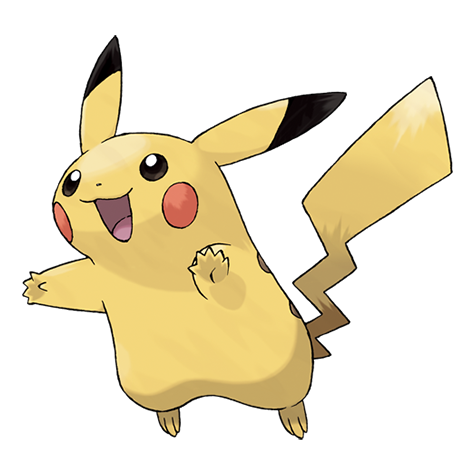

In [637]:
img = Image.open(io.BytesIO(r.content))
img

In [639]:
import random

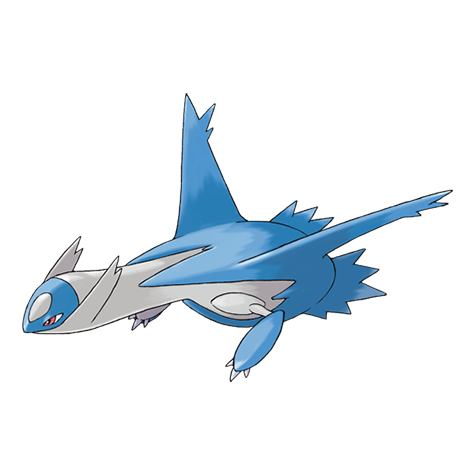

In [640]:
n=random.randint(1, 800)
url=f'https://assets.pokemon.com/assets/cms2/img/pokedex/full/{n:03}.png'
r=requests.get(url)
img = Image.open(io.BytesIO(r.content))
img.save(f'{n}.png')
img